## IMPORTED THE NECESSARY LIBRARIES AND LOADING THE DATASET:-

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv('Loan Application Status Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


loaded the dataset and named it as 'df' .

there are 614 rows and 13 columns.

## EXPLORATORY DATA ANALYSIS:--


EXPLORATORY DATA ANALYSIS INVOLVES THE FOLLOWING PROCESS:-

1.READ THE DATA

2.VARIABLE IDENTIFICATION

3.UNIVARIATE ANALYSIS

4.BIVARIATE ANLAYSIS

5.DETECTING OUTLIERS/ANOMALY DETECTION

6.HANDLING /REMOVING NULL VALUES

7.HANDLING CATEGORICAL VARIABLES

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


there are 4 float datatype columns,1 integer datatype column and 8 object datatype columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education

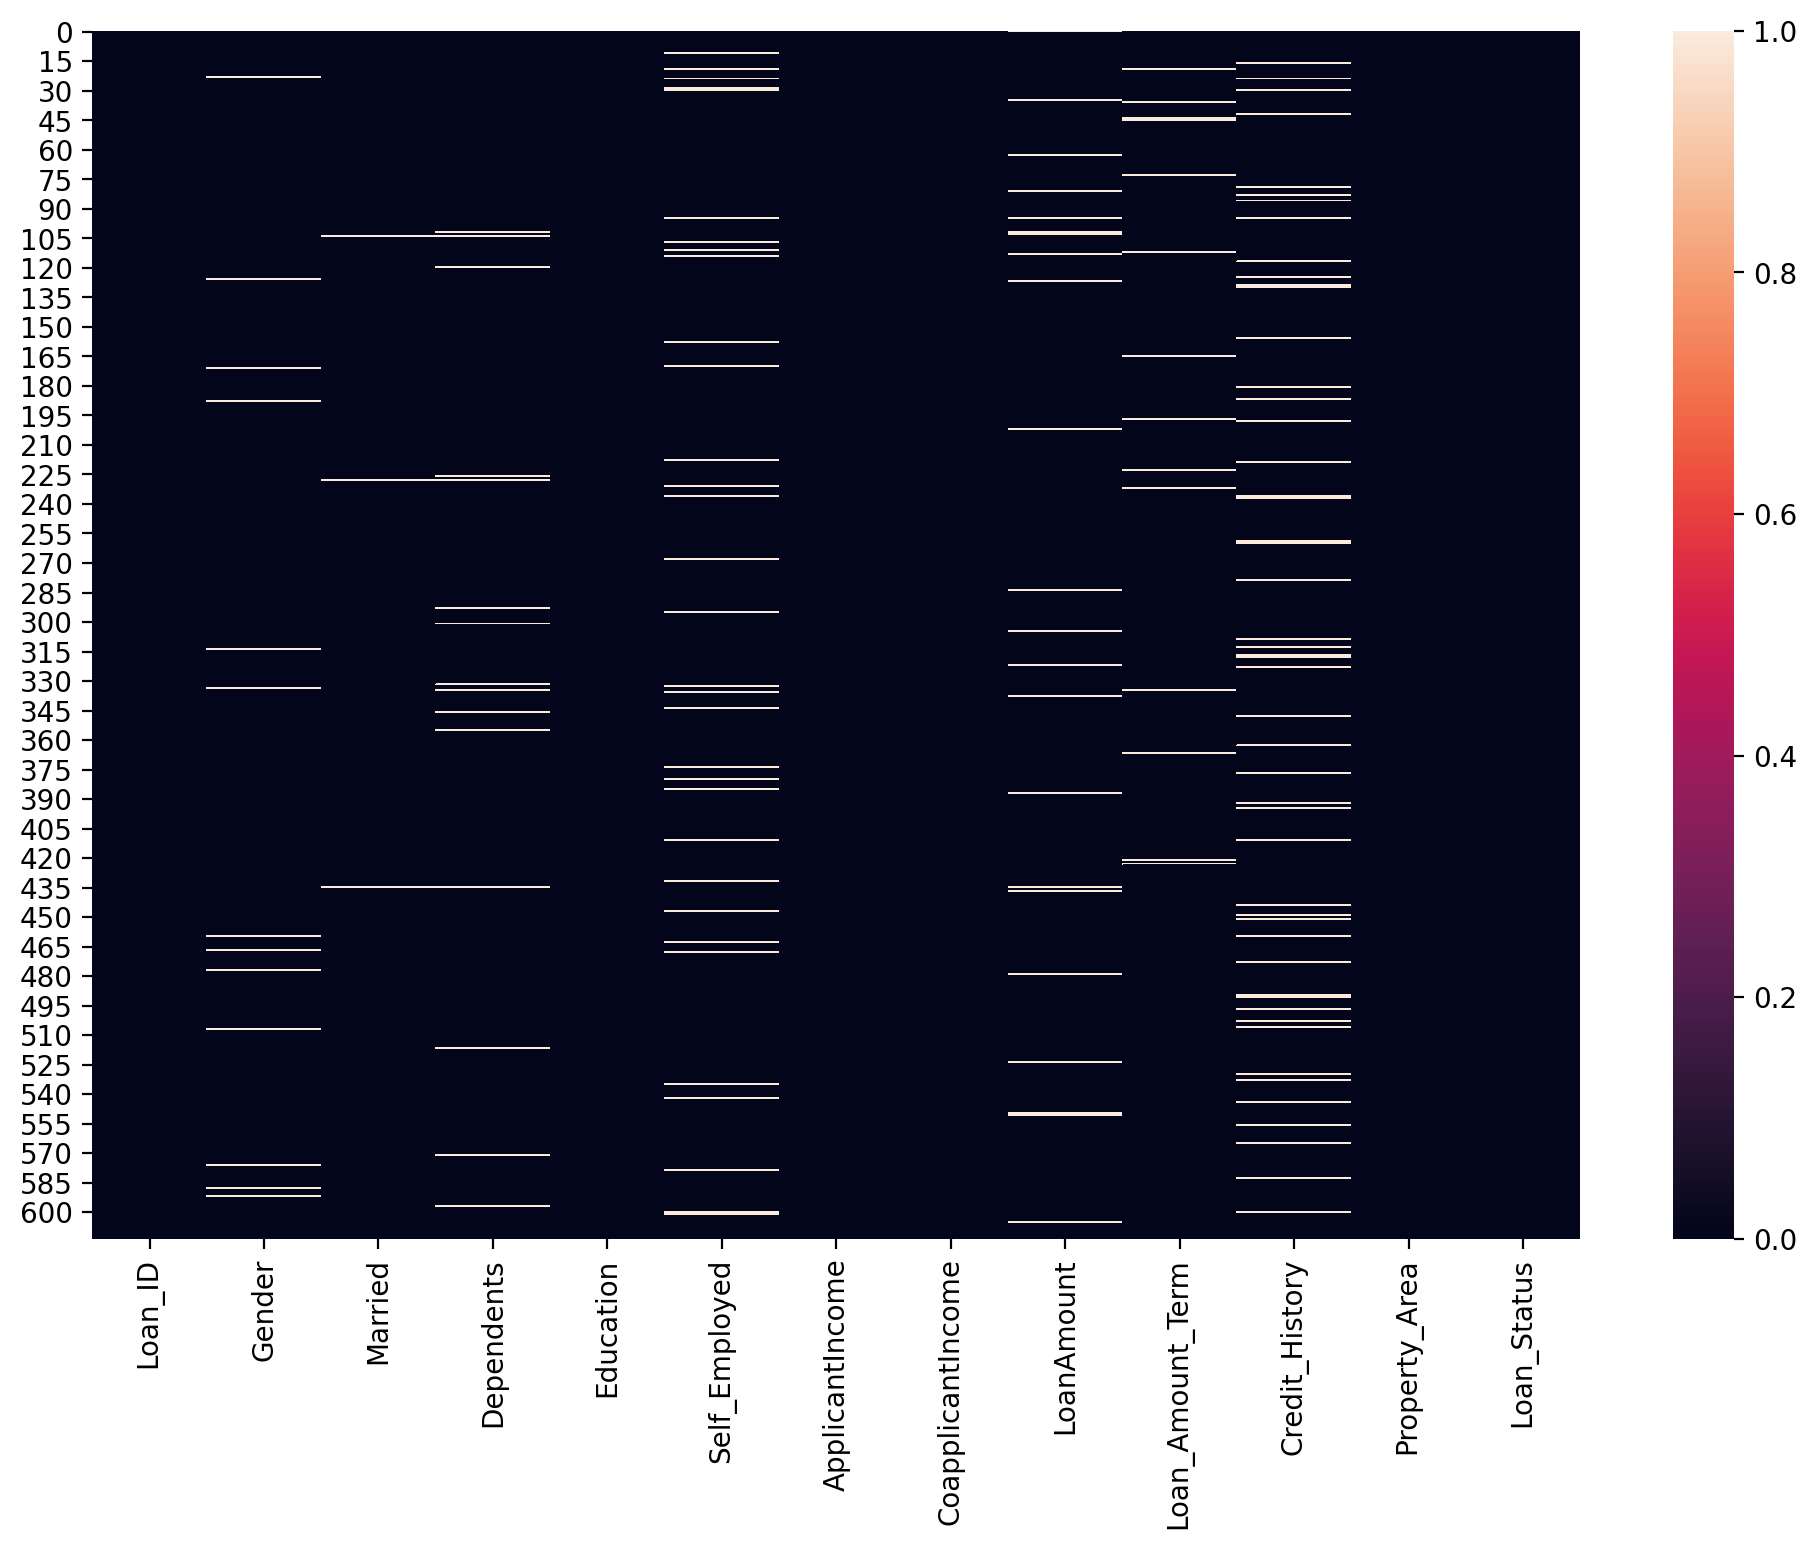

In [37]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.isnull())

print(df.info())

print('\n')
print(df.isnull().sum())
print('\n')


THERE ARE MISSING VALUES IN THE DATASET.

In [38]:
#statistics for the numerical columns:--
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


There are numerous statistics for each column in the whole dataset;They tells us about the important information regarding the dataset

1.min--minimum value.

2.max--maximum value.

3.std--standard deviation from the mean.

4.25%--the 25th percentile.

5.mean--average for each column.

6.50%--median or the 50th percentile for each column.

7.75%--75th percentile.

8.count-- it shows the total number of counts for each column.


THE MAXIMUM VALUE FOR APPLICANT INCOME IS 81000 AND FOR CO-APPLICANT INCOME IS 41667.

In [39]:
#statistics for the object columns--
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001846,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


there are most number of frequency for 'MALE', 'YES'(MARRIED_STATUS), 'GRADUATE(EDUCATION)','NOT=SELF-EMPLOYED' AND 'SEMIURBAN'.

THERE ARE 2 CATEGORIES FOR EDUCATION, SELF EMPLOYED AND 3 CATEGORIES FOR PROPERTY AREA .

In [40]:
df['Loan_Amount_Term'].value_counts().count()

10

there are only 10 values in loan amount term column.

In [41]:
df['Credit_History'].value_counts().count()

2

there are only 2 values in Credit history column.

## MISSING VALUES TREATMENT:--

In [42]:
from sklearn.impute import SimpleImputer

I imported the method of replacing of missing values called->Simple Imputer from sklearn library.

In [43]:
object_imputer=SimpleImputer(strategy='most_frequent')
df['Gender']=object_imputer.fit_transform(df['Gender'].values.reshape(-1,1))[:,0]
df['Married'] = object_imputer.fit_transform(df['Married'].values.reshape(-1,1))[:,0]
df['Dependents']=object_imputer.fit_transform(df['Dependents'].values.reshape(-1,1))[:,0]
df['Self_Employed']=object_imputer.fit_transform(df['Self_Employed'].values.reshape(-1,1))[:,0]
df['LoanAmount']=object_imputer.fit_transform(df['LoanAmount'].values.reshape(-1,1))[:,0]
df['Loan_Amount_Term']=object_imputer.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))[:,0]
df['Credit_History']=object_imputer.fit_transform(df['Credit_History'].values.reshape(-1,1))[:,0]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


REMOVED THE NULL VALUES BY IMPUTING THE COLUMNS WITH MOST FREQUENT VALUES IN THEIR RESPECTIVE SERIES.

In [44]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

showing the distribution of loan status column

In [45]:
df.pivot_table(columns=['Loan_Status','Gender'],values='Loan_ID',aggfunc=['count']).T

Loan_ID
      Loan_Status Gender         
count N           Female       37
                  Male        155
      Y           Female       75
                  Male        347

there are more number of counts for male applicants for both 'yes' and ' no' applicants.

In [46]:
df.pivot_table(columns=['Loan_Status','Married'],values='Loan_ID',aggfunc=['count']).T

Loan_ID
      Loan_Status Married         
count N           No            79
                  Yes          113
      Y           No           134
                  Yes          288

there are more number of counts for married applicants for both 'yes' and ' no' applicants.

In [47]:
df.pivot_table(columns=['Loan_Status','Dependents'],values='Loan_ID',aggfunc=['count']).T

Loan_ID
      Loan_Status Dependents         
count N           0               113
                  1                36
                  2                25
                  3+               18
      Y           0               247
                  1                66
                  2                76
                  3+               33

the applicants having dependents are more approved of getting then loan.

In [48]:
df.pivot_table(columns=['Self_Employed','Loan_Status'],values='Loan_ID',aggfunc=['count']).T

Loan_ID
      Self_Employed Loan_Status         
count No            N                166
                    Y                366
      Yes           N                 26
                    Y                 56

counts of applicants displayed based on self-employed status whether they were approved of loan or not.

In [49]:
df.pivot_table(columns=['Property_Area','Loan_Status'],values='Loan_ID',aggfunc=['count']).T

Loan_ID
      Property_Area Loan_Status         
count Rural         N                 69
                    Y                110
      Semiurban     N                 54
                    Y                179
      Urban         N                 69
                    Y                133

counts of applicants displayed based on property area whether they were approved of loan or not.

In [50]:
df.pivot_table(columns=['Education','Loan_Status'],values='Loan_ID',aggfunc=['count']).T

Loan_ID
      Education    Loan_Status         
count Graduate     N                140
                   Y                340
      Not Graduate N                 52
                   Y                 82

counts of applicants displayed based on education status whether they were approved of loan or not.

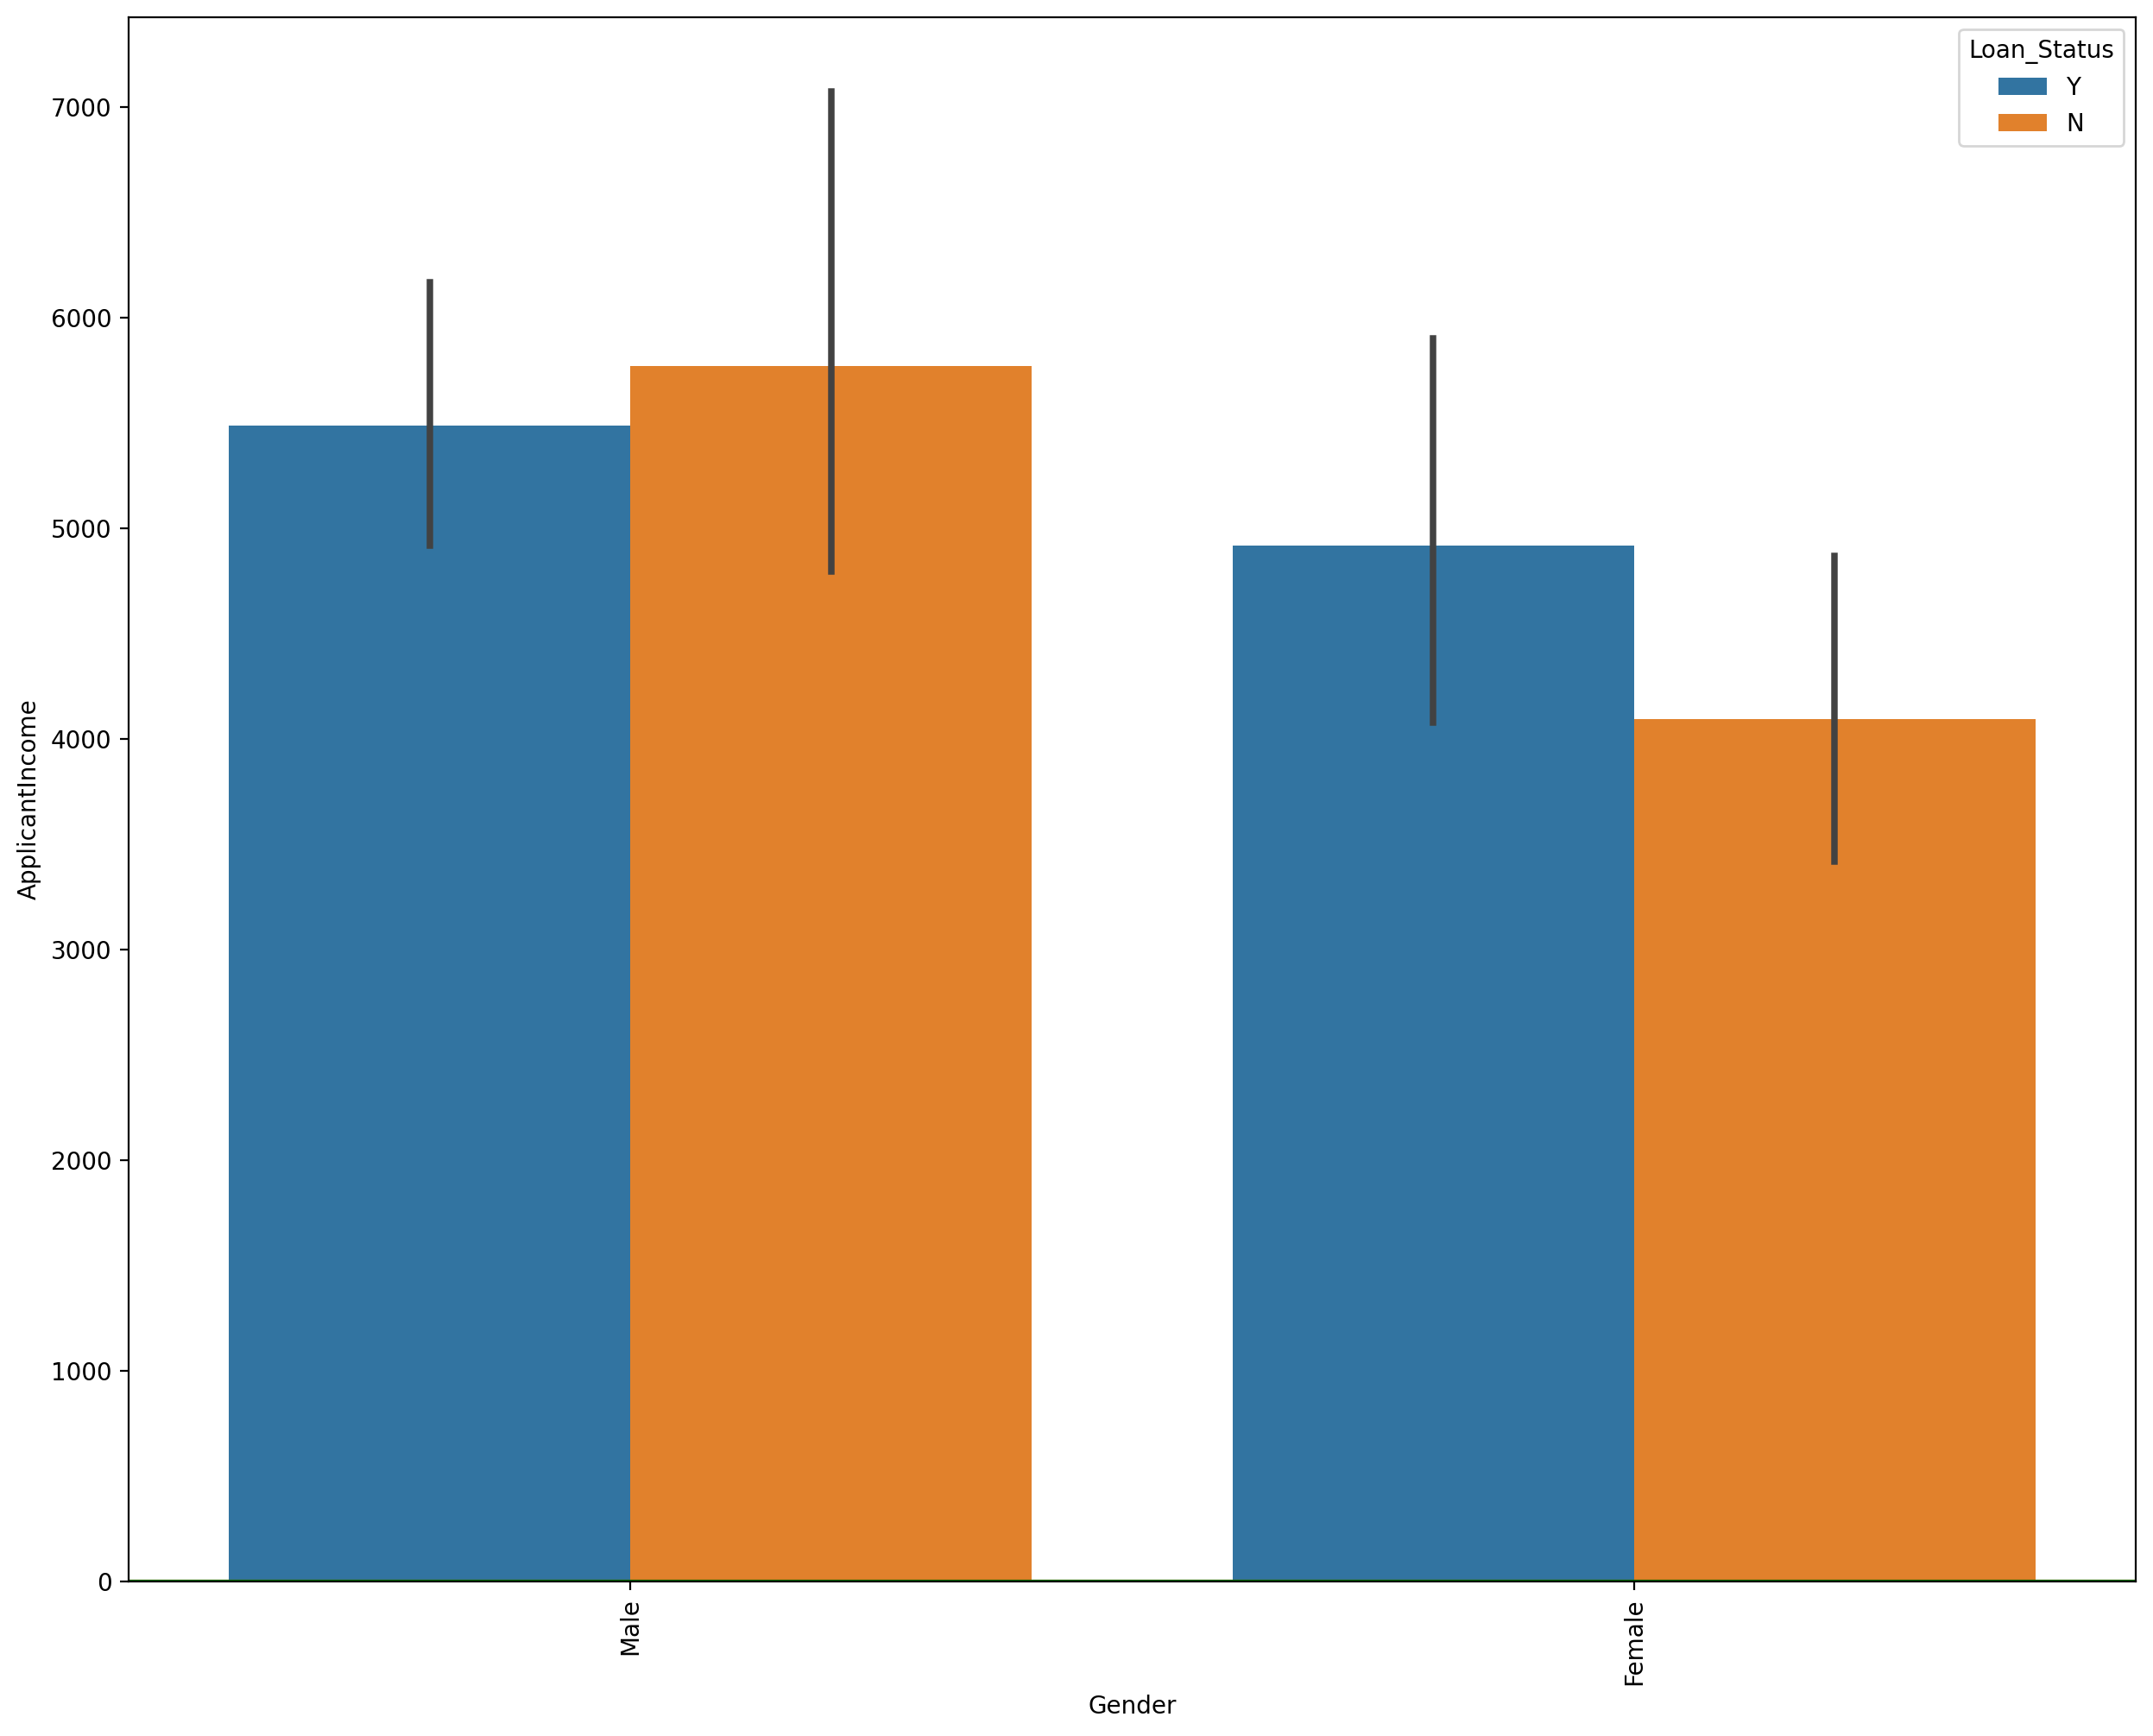

In [51]:
plt.figure(figsize=(15,12),dpi=200)
sns.barplot(data=df,y="ApplicantIncome",x="Gender",hue="Loan_Status")
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = 0.5, color = 'g', linestyle = '-')
plt.xticks(rotation=90);

1. Males with higher income has a lessor chance of getting loan approved.

2. Female with higher income has a greater chance of getting loan approved.

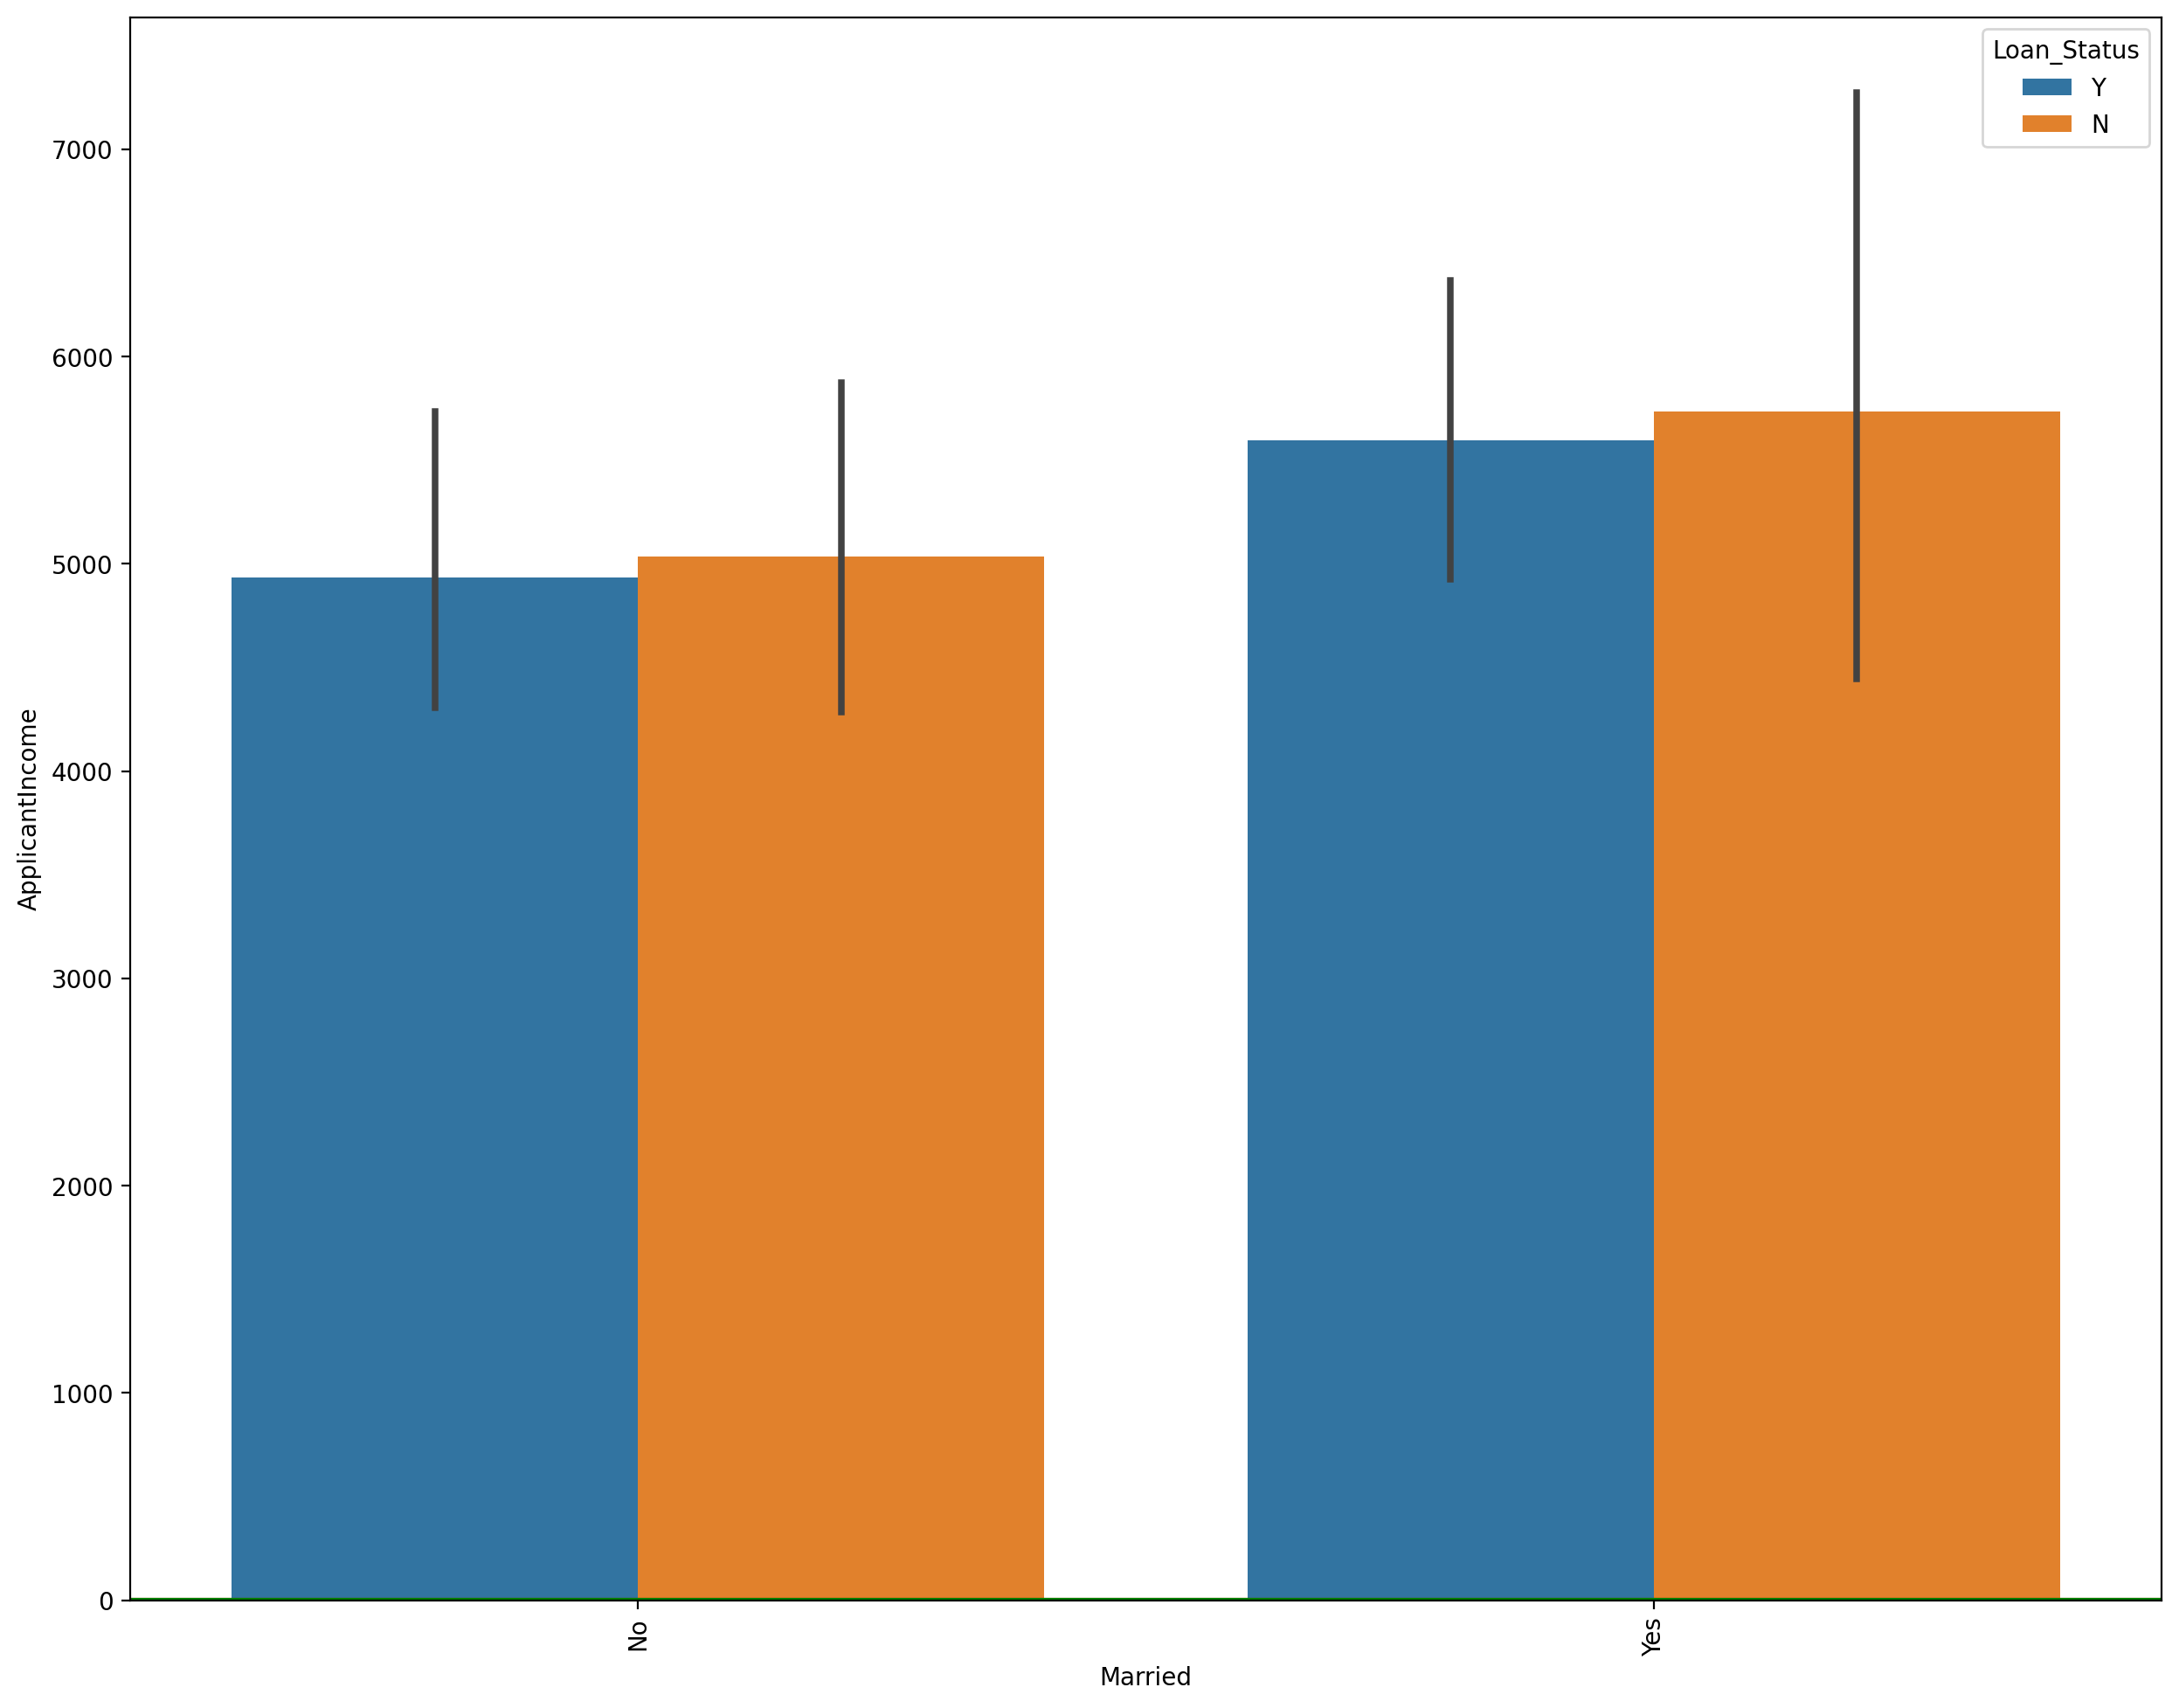

In [52]:
plt.figure(figsize=(15,12),dpi=200)
sns.barplot(data=df,y="ApplicantIncome",x="Married",hue="Loan_Status")
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = 0.5, color = 'g', linestyle = '-')
plt.xticks(rotation=90);

1.Married individuals with higher income has a lessor chance of getting their loan  approved.

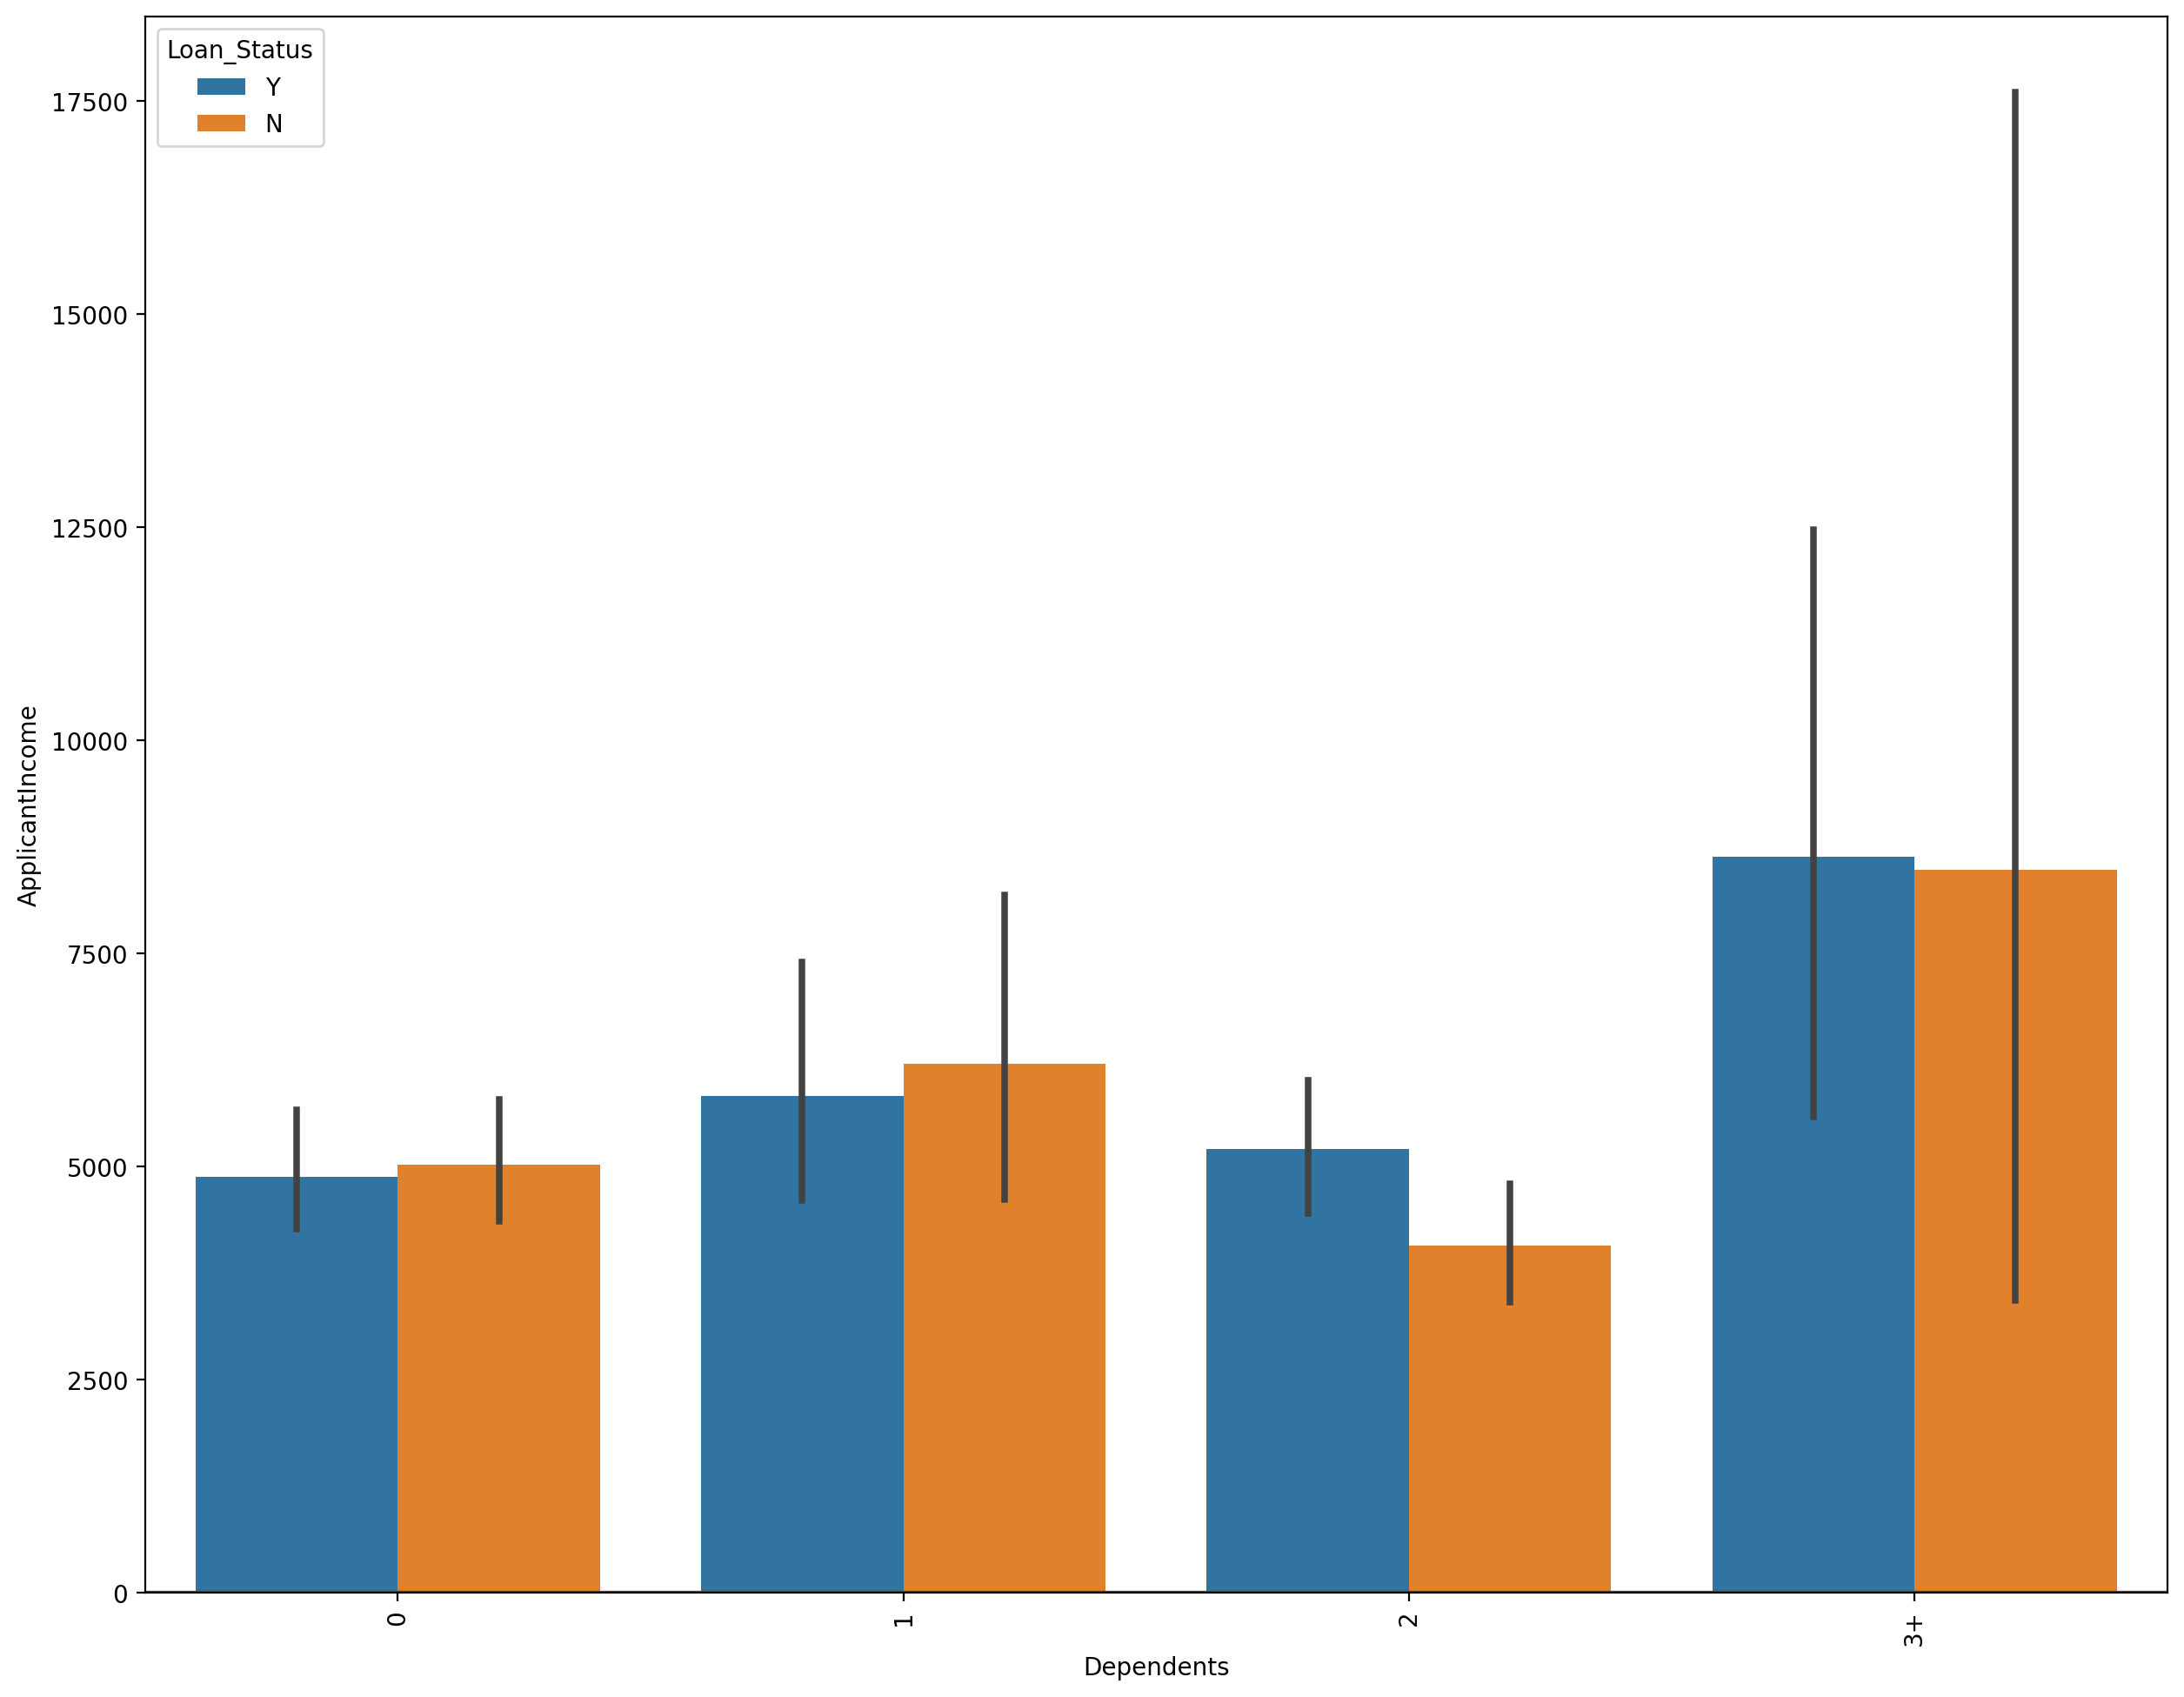

In [53]:
plt.figure(figsize=(15,12),dpi=200)
sns.barplot(data=df,y="ApplicantIncome",x="Dependents",hue="Loan_Status")
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = 0.5, color = 'g', linestyle = '-')
plt.xticks(rotation=90);

INDIVIDUALS WITH DEPENDENTS GREATER THAN 2 HAS A HIGHER CHANCE OF GETTING THEIR LOAN APPROVED.

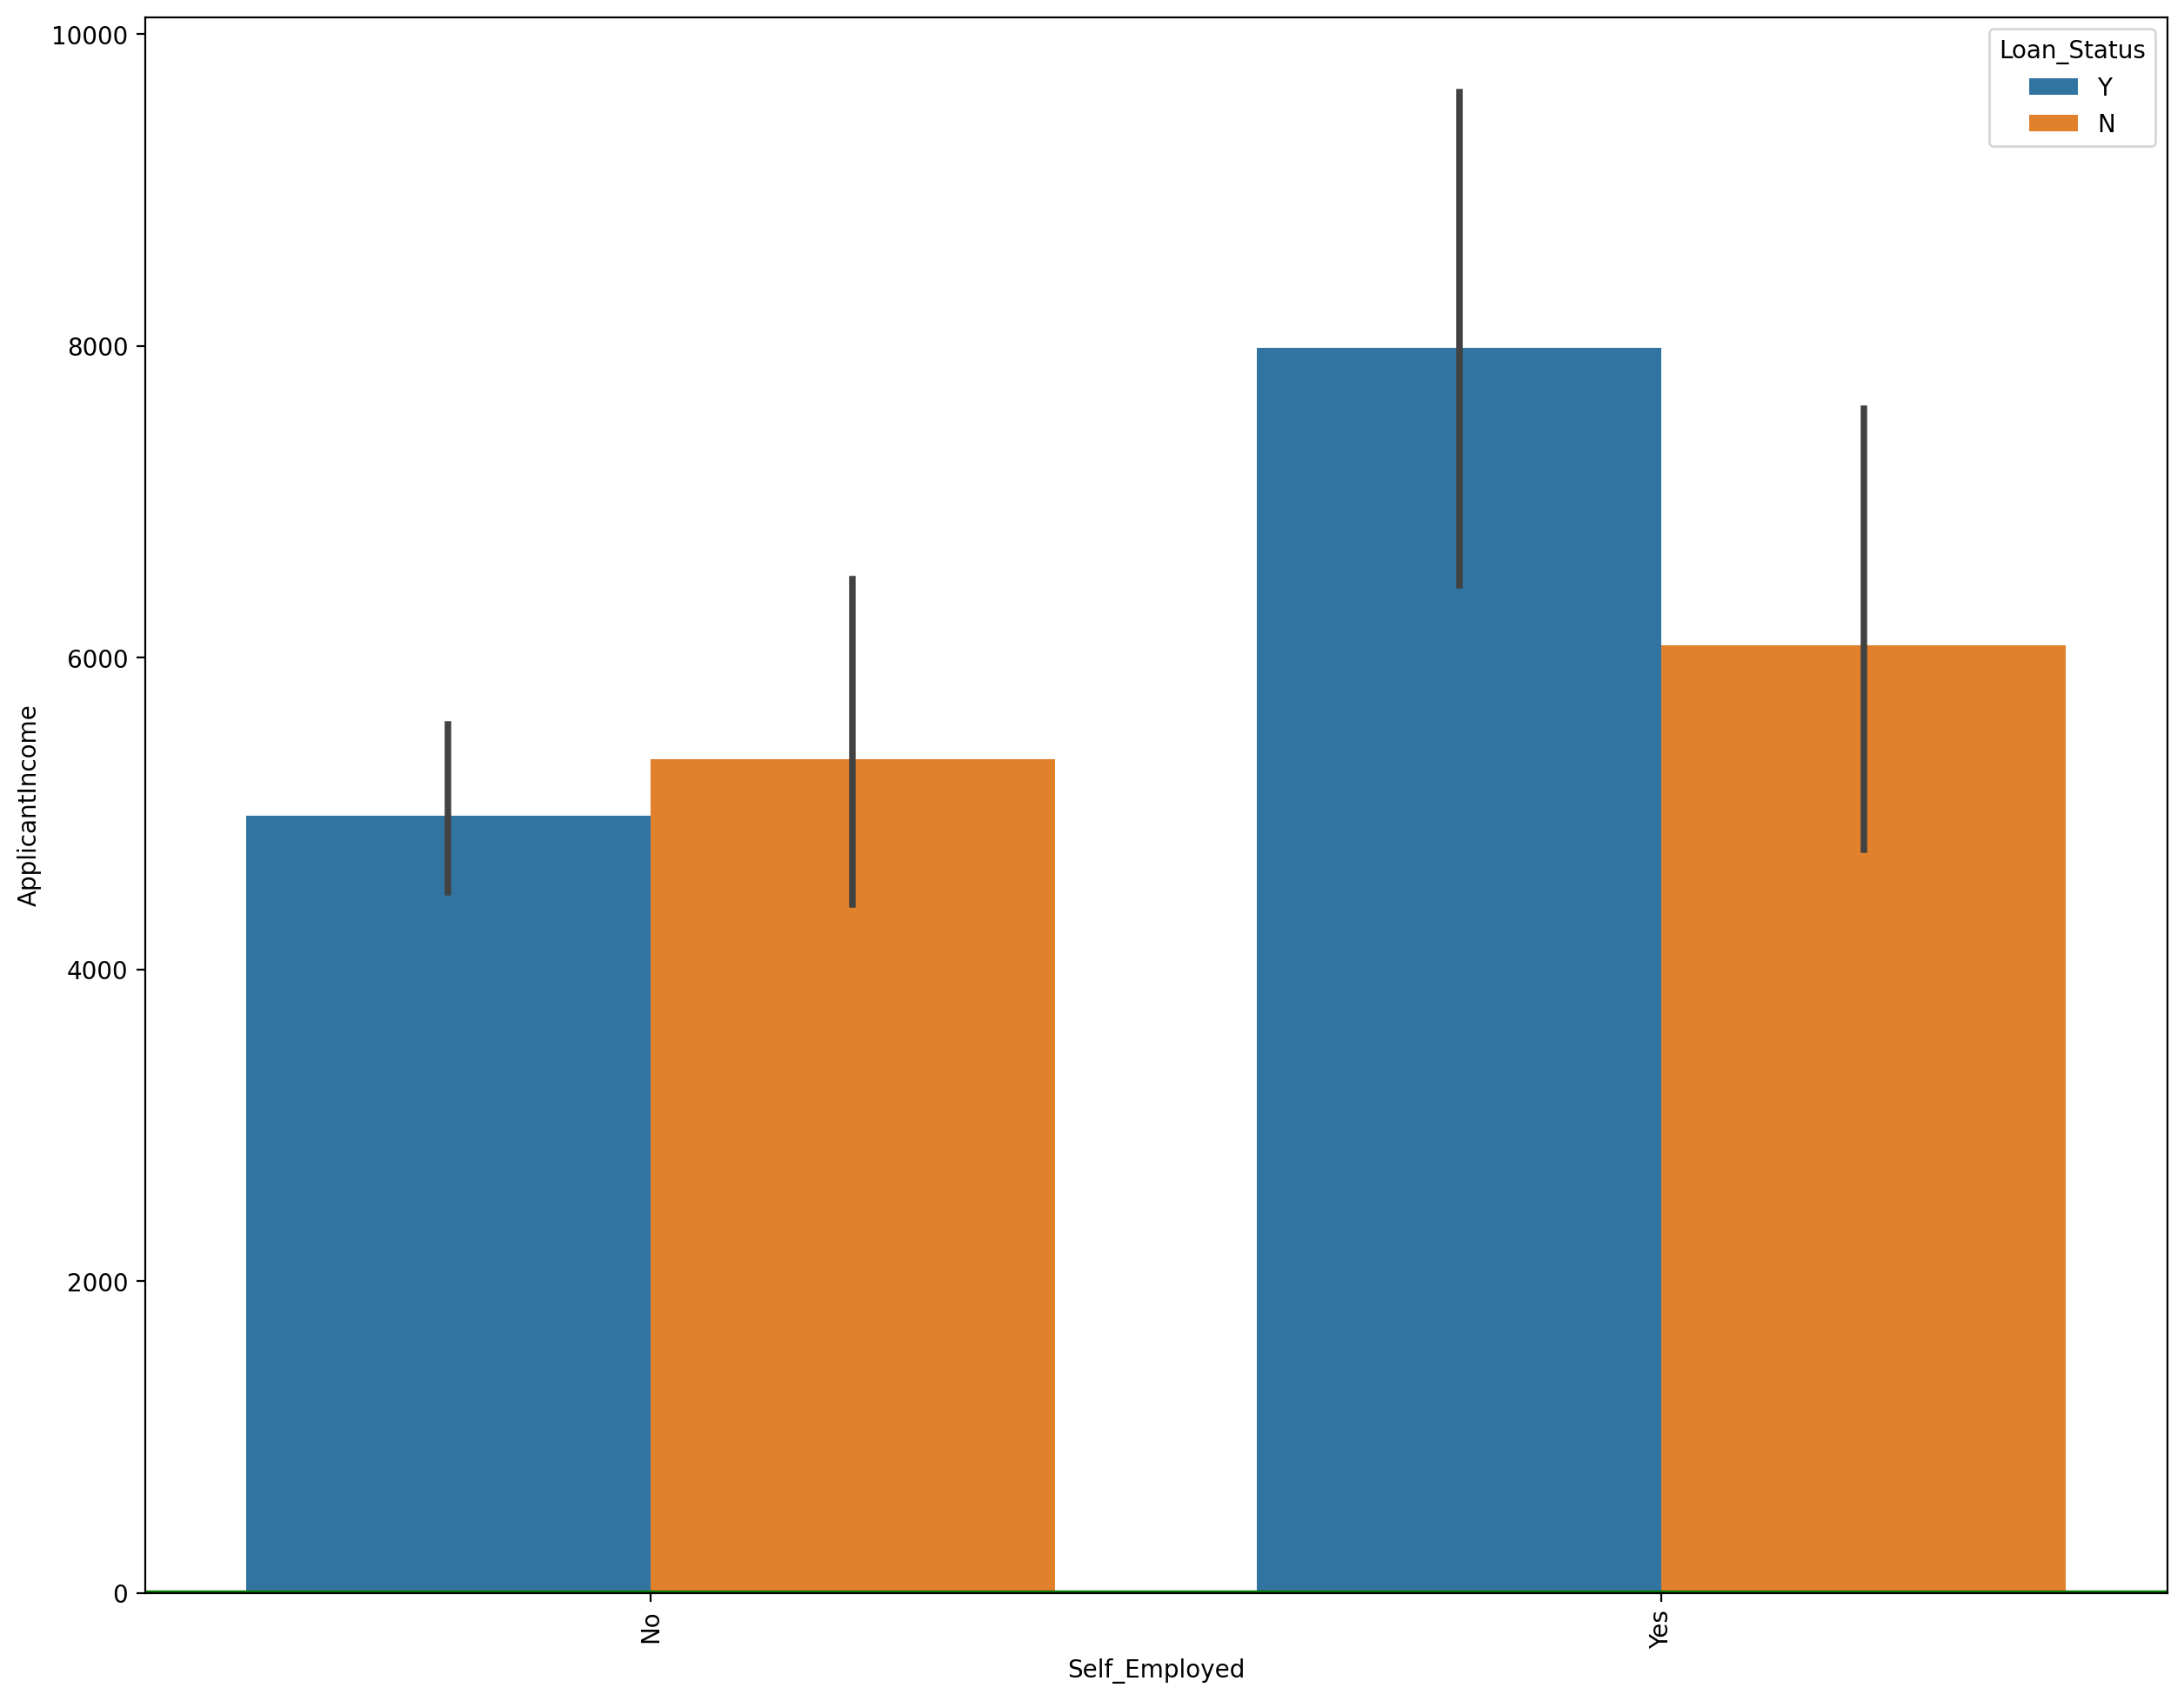

In [54]:
plt.figure(figsize=(15,12),dpi=200)
sns.barplot(data=df,y="ApplicantIncome",x="Self_Employed",hue="Loan_Status")
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = 0.5, color = 'g', linestyle = '-')
plt.xticks(rotation=90);

1. Non-self employed people with higher income has a lessor chance of getting their loan approved.
2. Self employed people with higher income has a higher chance of getting their loan approved.

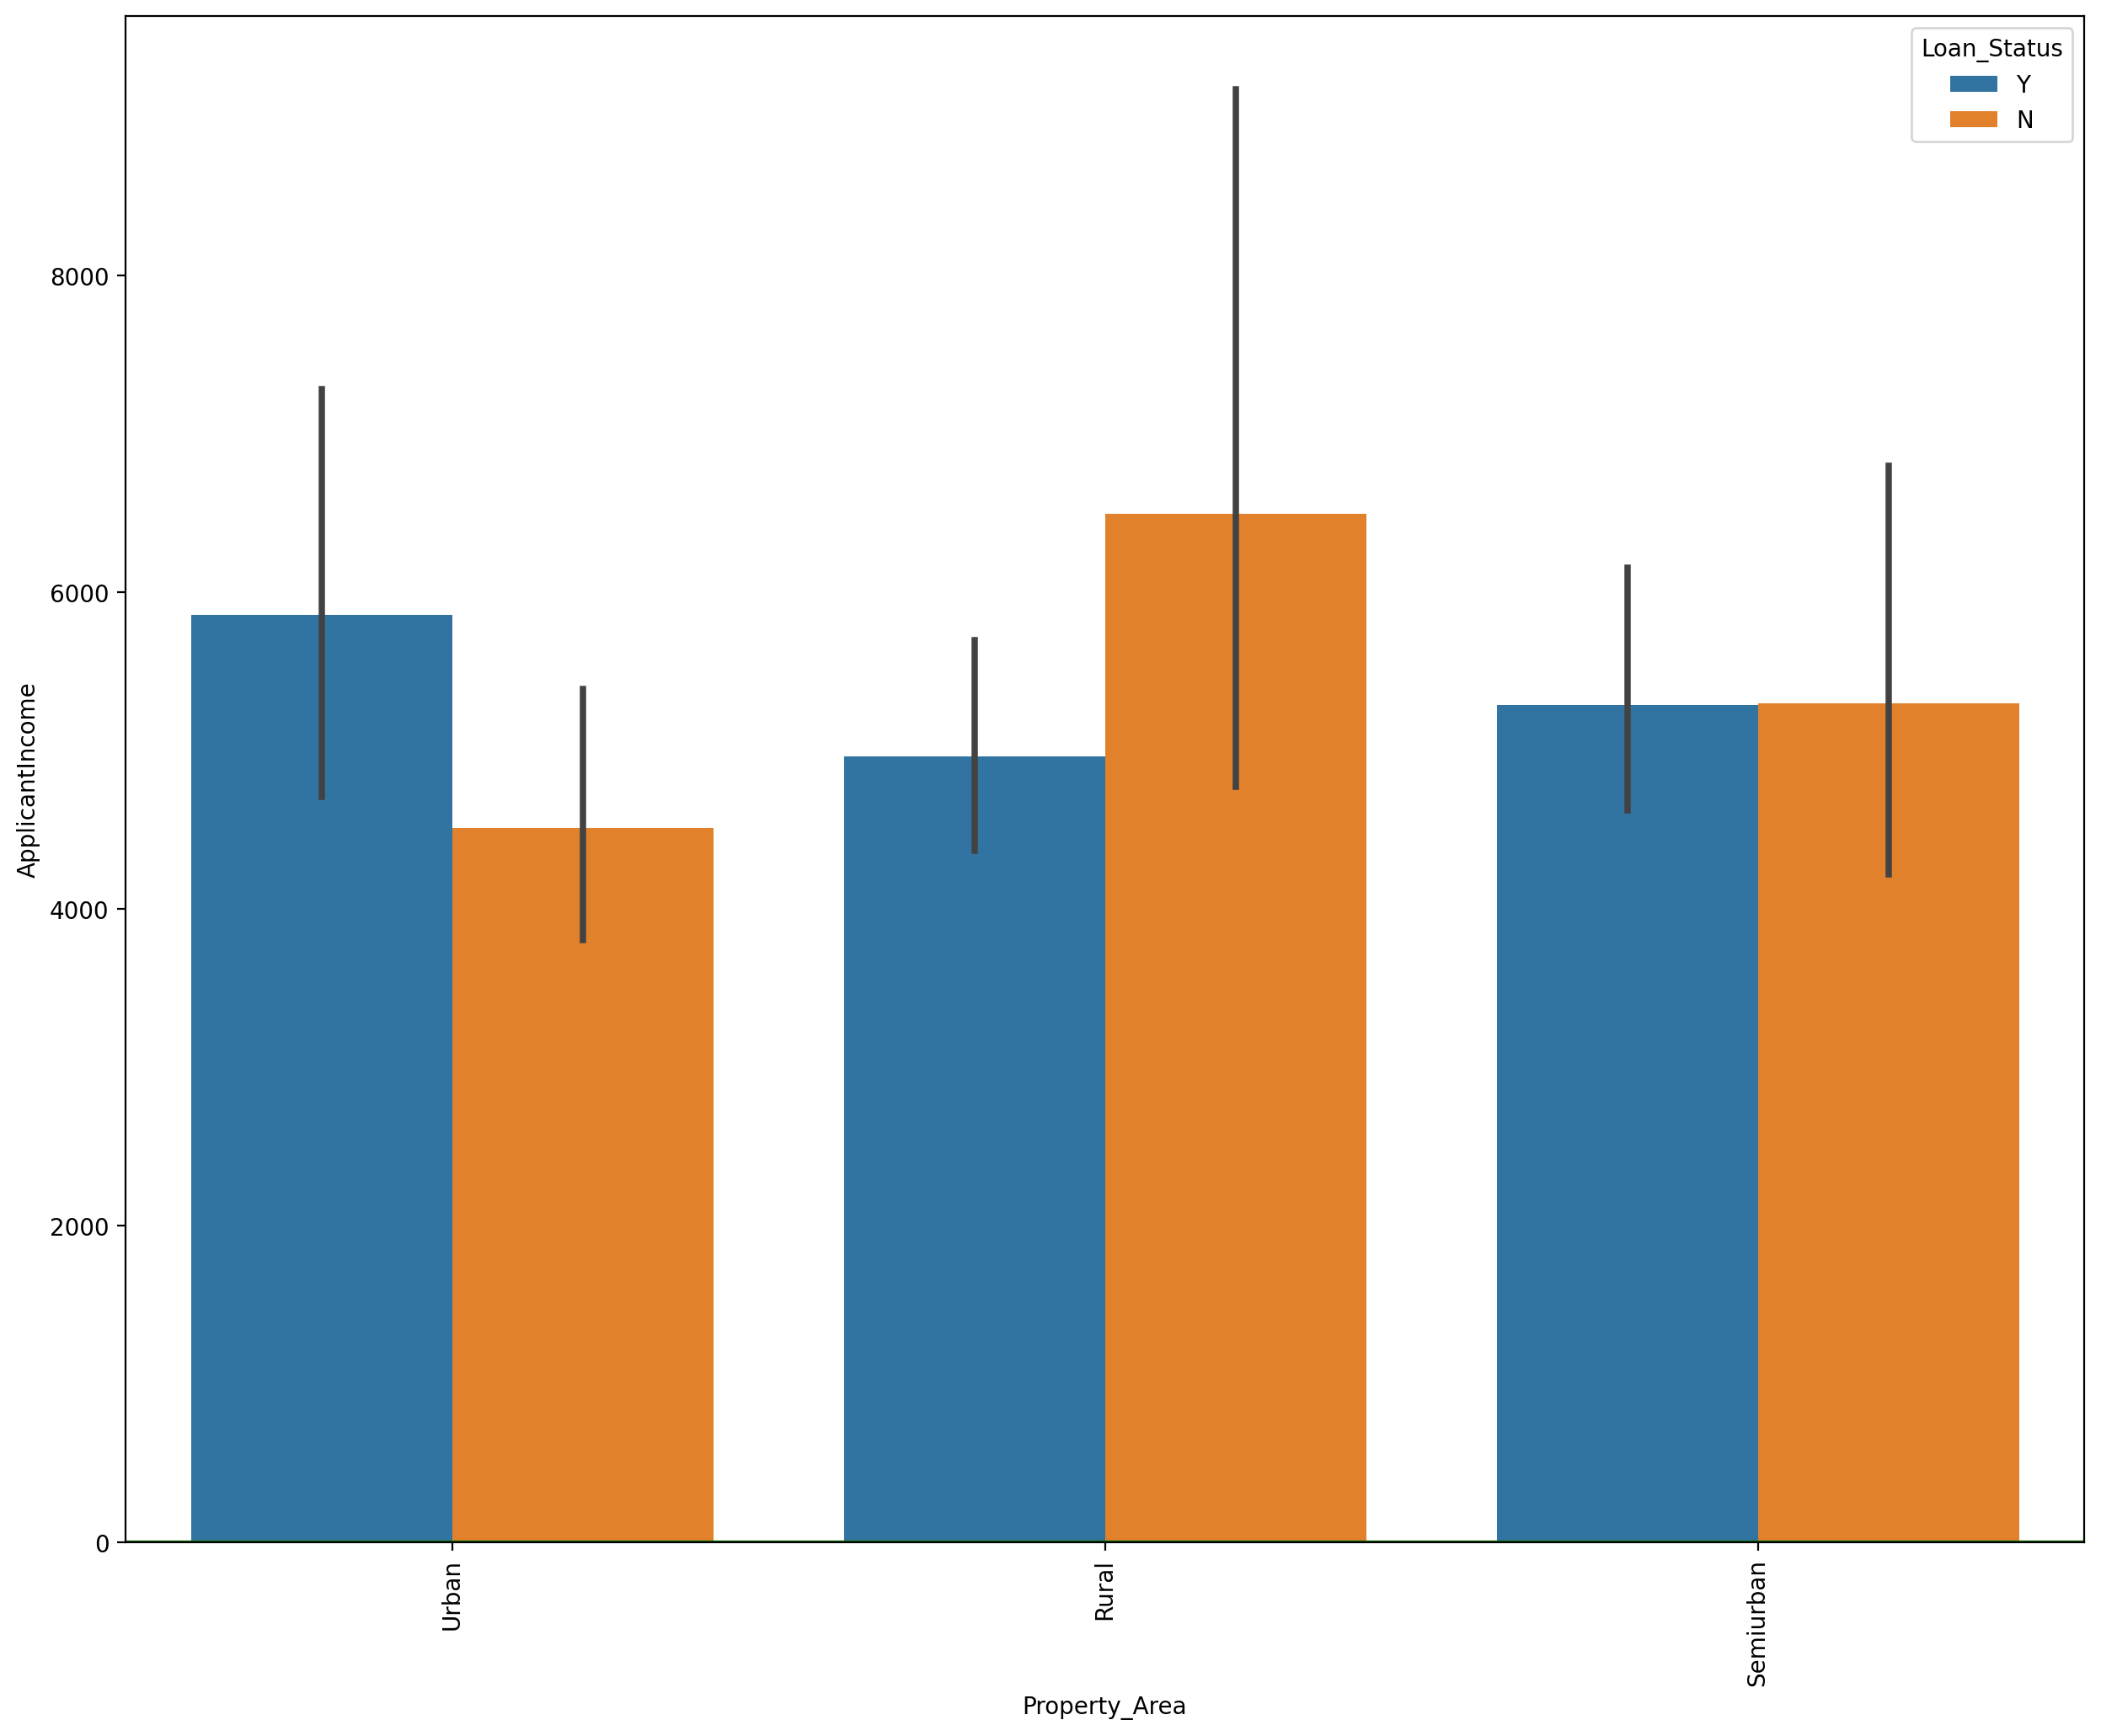

In [55]:
plt.figure(figsize=(15,12),dpi=200)
sns.barplot(data=df,y="ApplicantIncome",x="Property_Area",hue="Loan_Status")
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = 0.5, color = 'g', linestyle = '-')
plt.xticks(rotation=90);

1. People living in urban areas with higher income has a higher chance of getting their loan approved.
2. People living in rural areas with higher income has a lower chance of getting their loan approved.

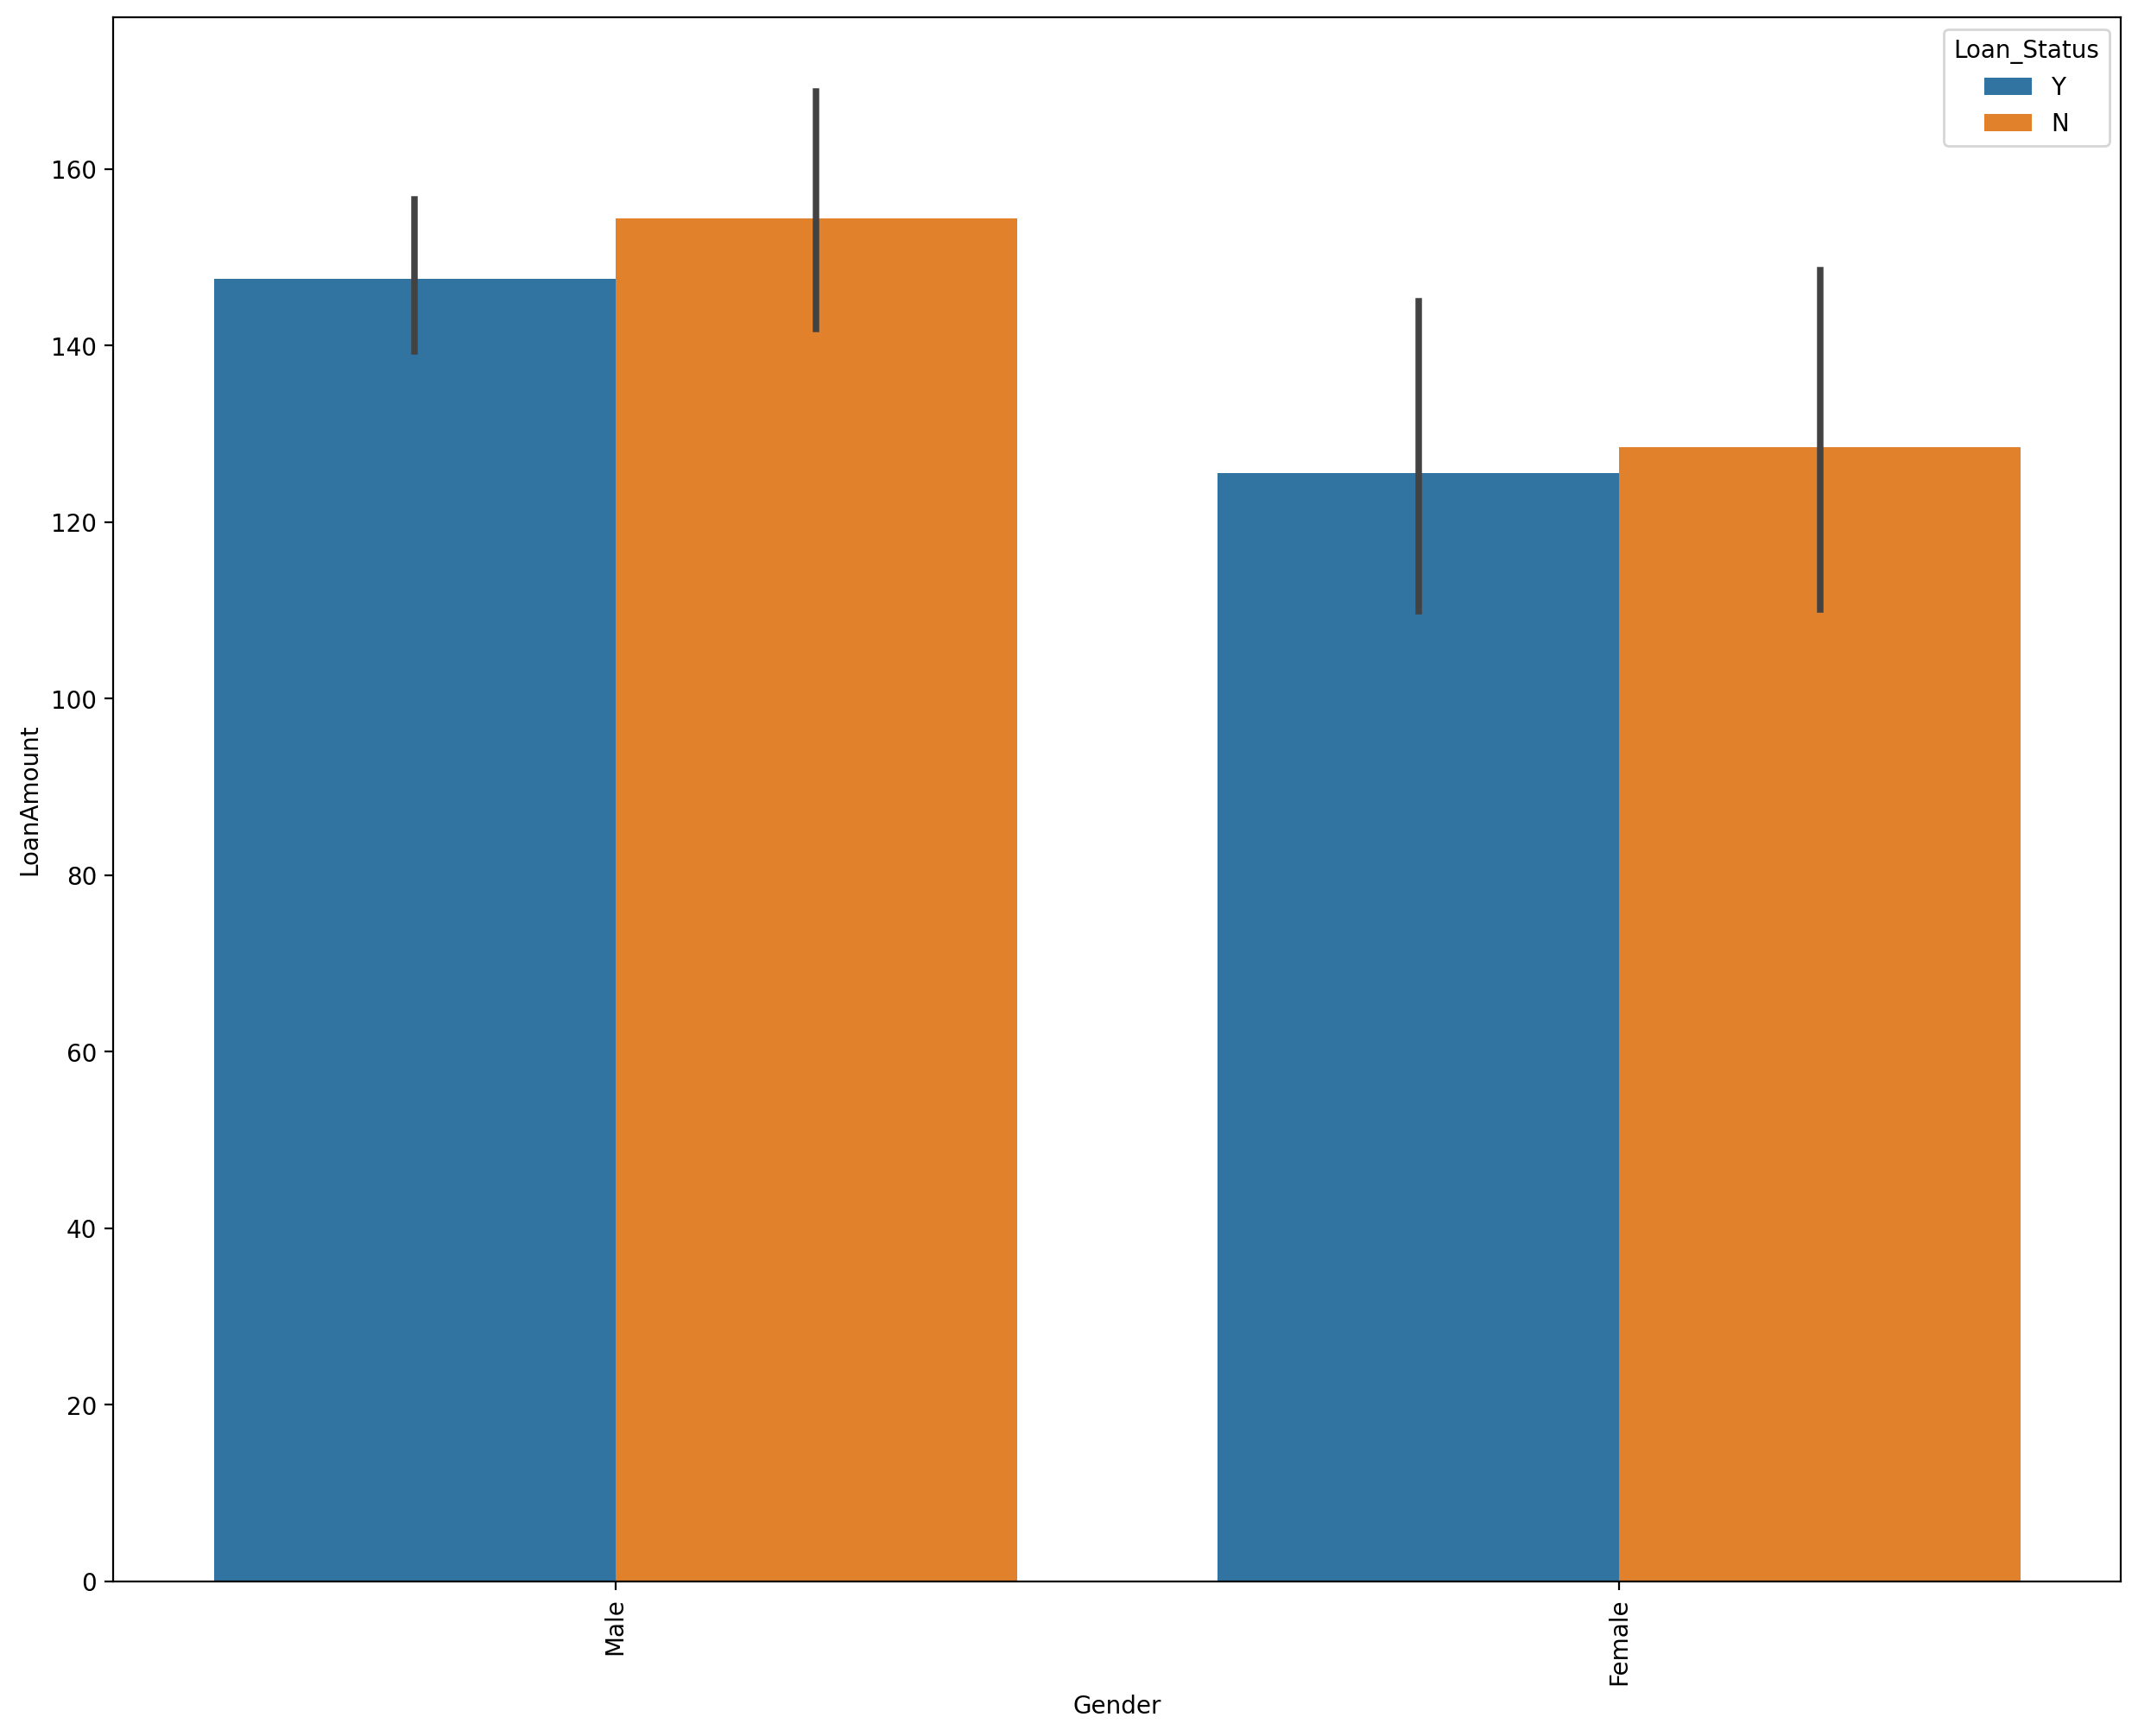

In [56]:
plt.figure(figsize=(15,12),dpi=200)
sns.barplot(data=df,y="LoanAmount",x="Gender",hue="Loan_Status")
plt.xticks(rotation=90);

MALES  AND FEMALES DEMANDING HIGHER LOANS AMOUNT  HAS A LESSER CHANCE OF GETTING THEIR LOANS APPROVED.

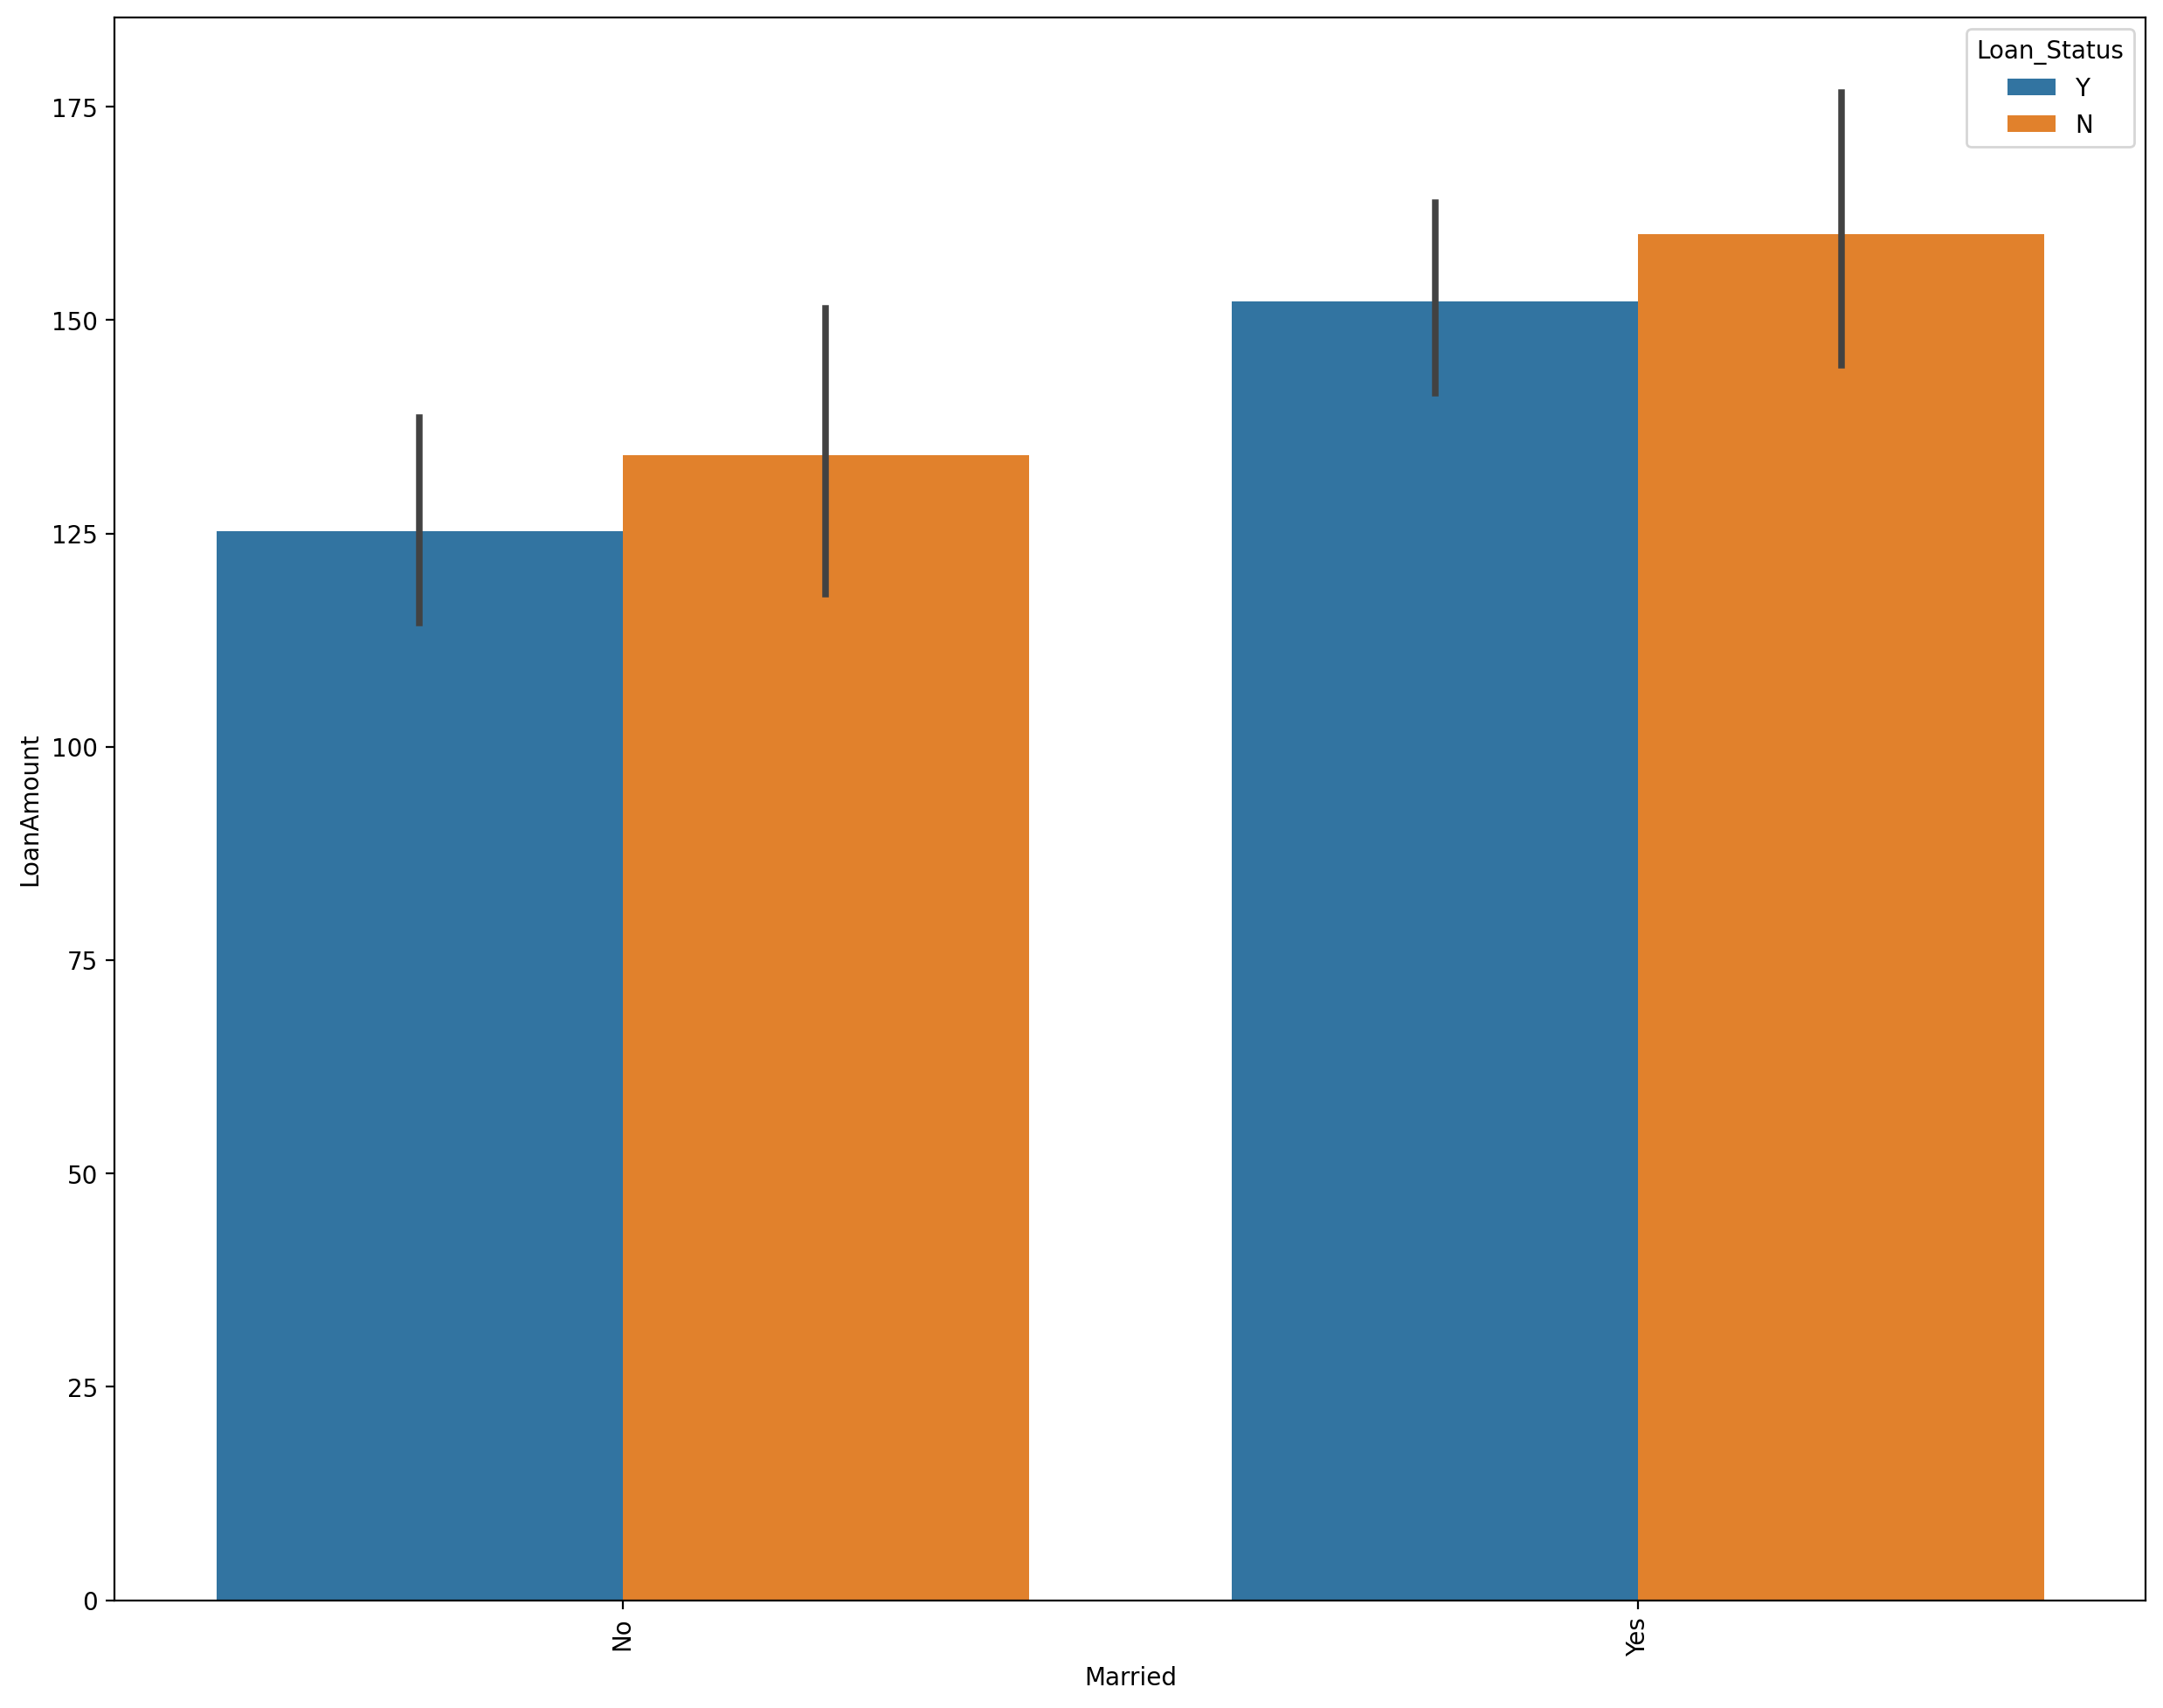

In [57]:
plt.figure(figsize=(15,12),dpi=200)
sns.barplot(data=df,y="LoanAmount",x="Married",hue="Loan_Status")
plt.xticks(rotation=90);

PEOPLE MARRIED OR NOT, IF THEY DEMAND HIGHER LOAN AMOUNTS HAS A LESSER CHANCE OF GETTING THEIR LOANS APPROVED.

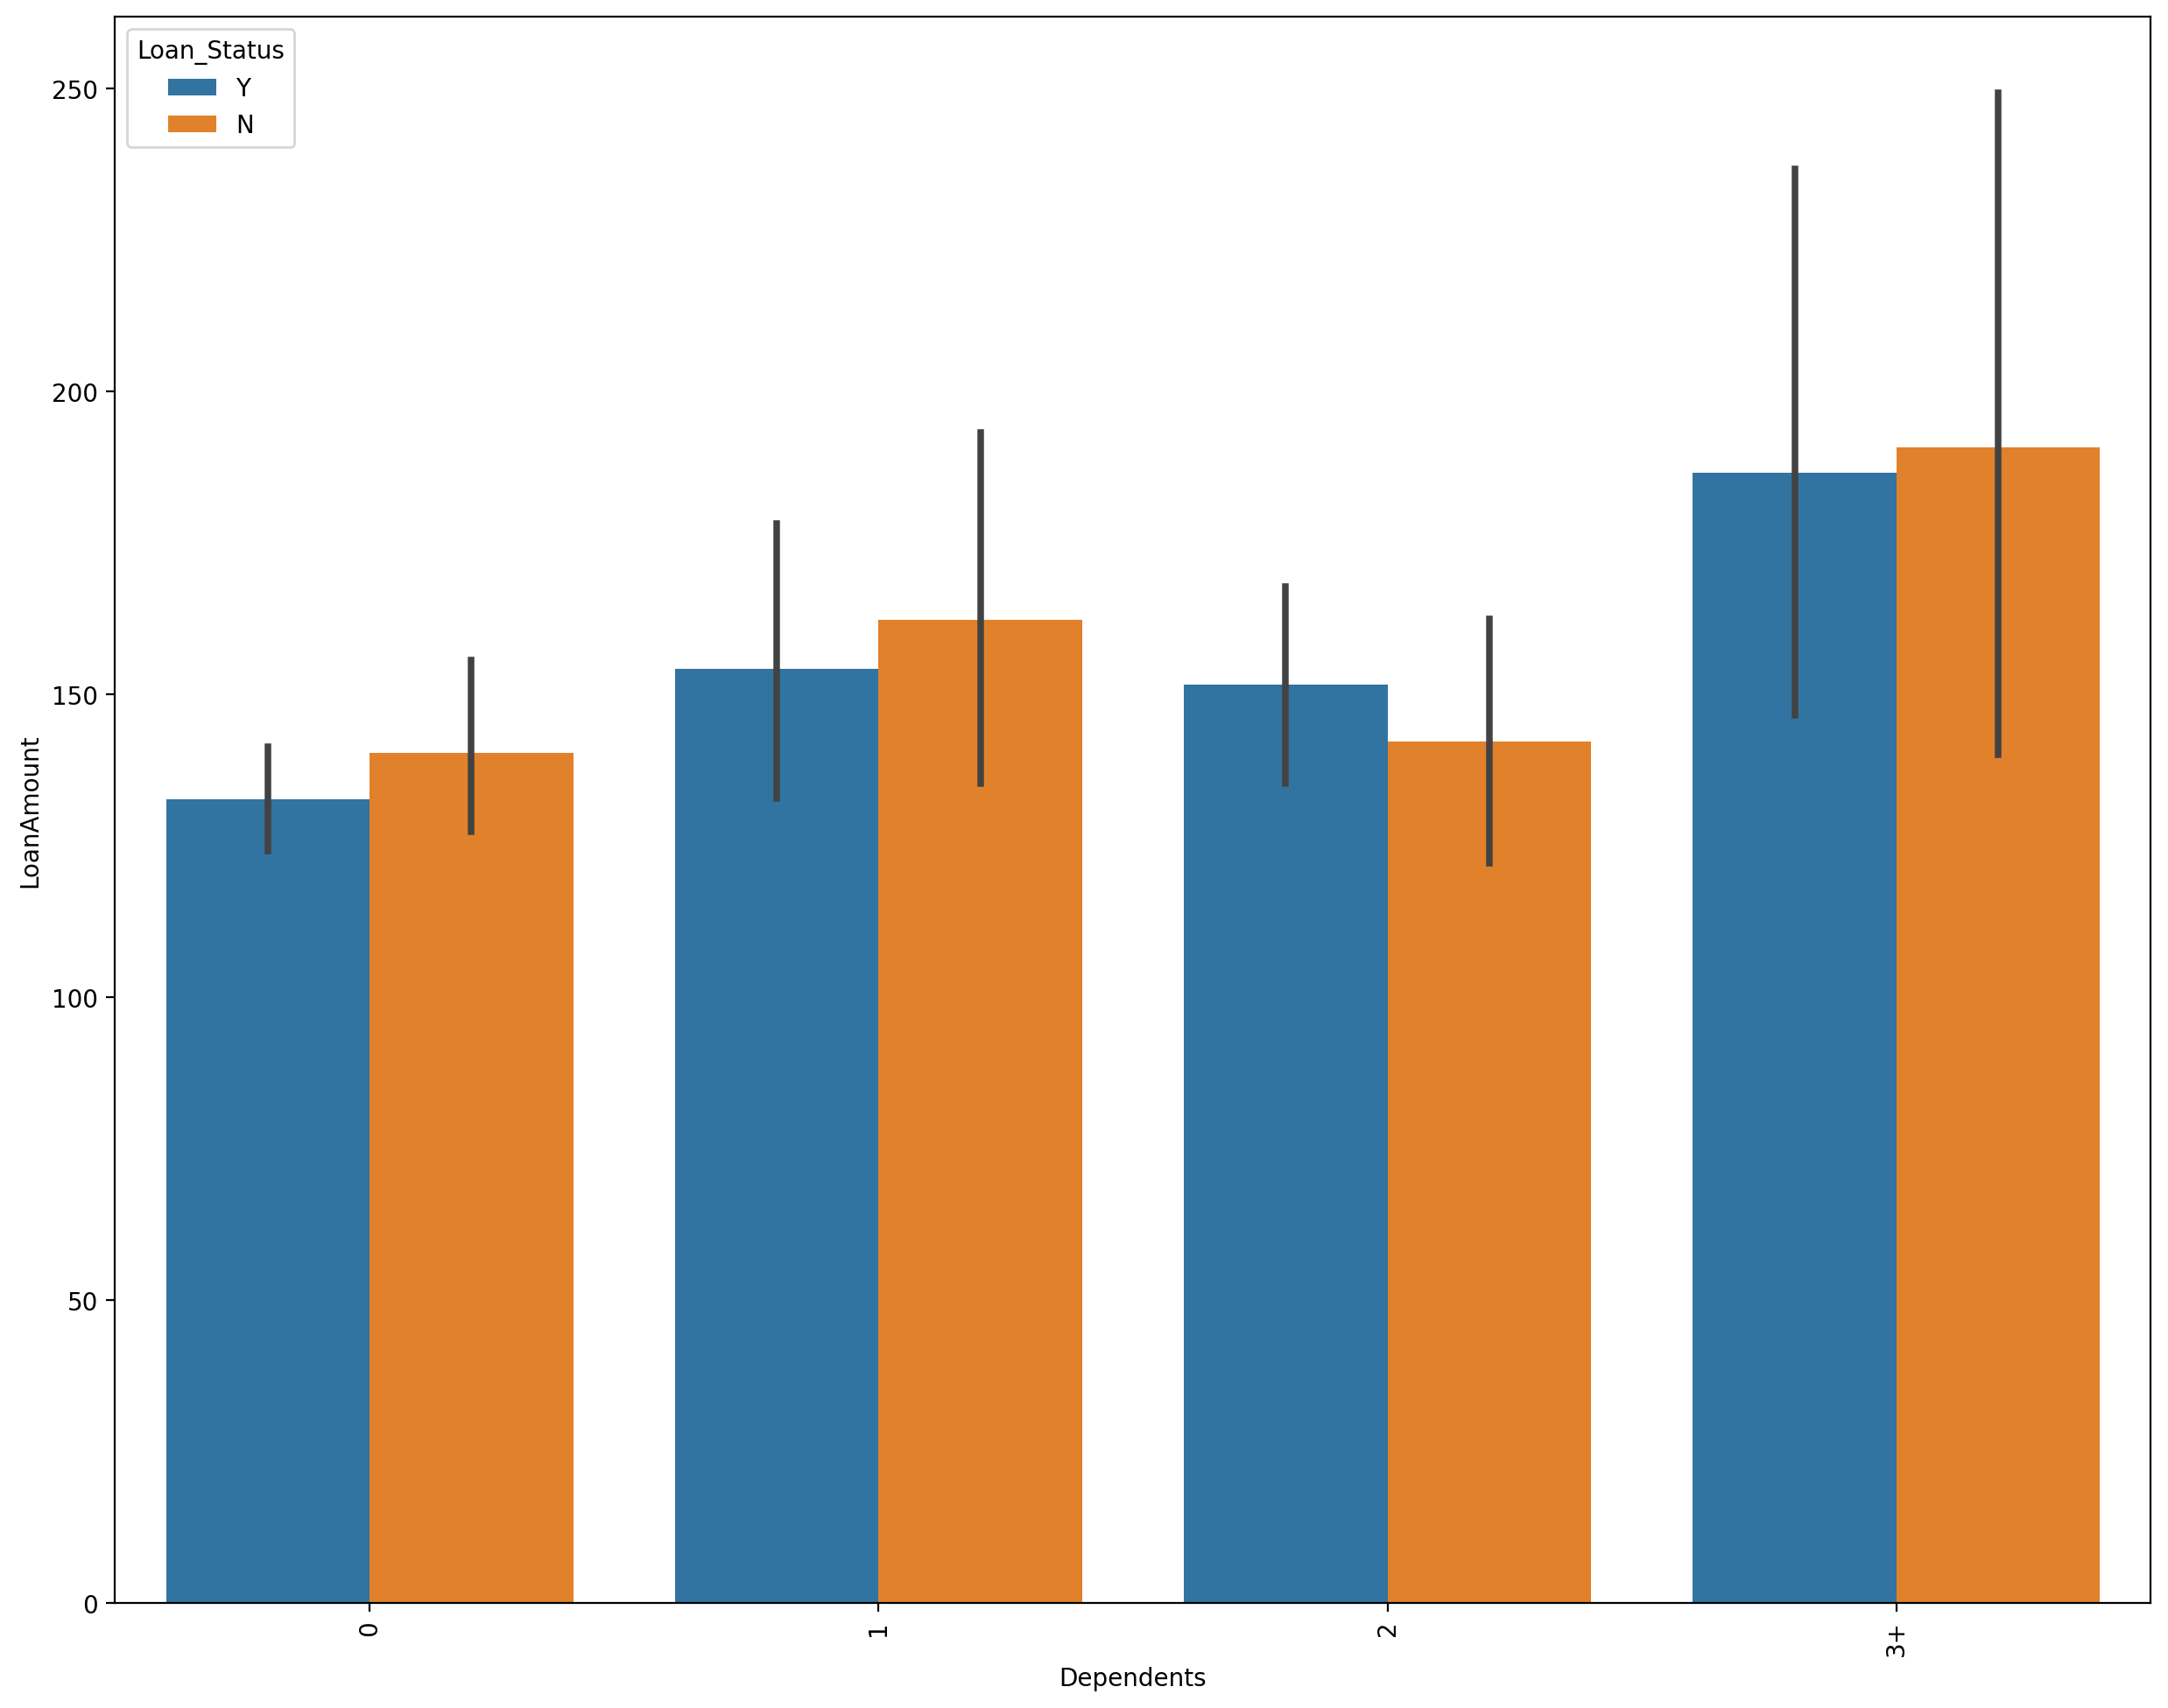

In [58]:
plt.figure(figsize=(15,12),dpi=200)
sns.barplot(data=df,y="LoanAmount",x="Dependents",hue="Loan_Status")
plt.xticks(rotation=90);

IF PEOPLE DEMAND HIGHER LOAN AMOUNTS,THEY HAVE A LESSER CHANCE OF GETTING THEIR LOANS APPROVED BUT IT IS NOT IN THE CASE OF PEOPLE HAVING 2 DEPENDENTS.



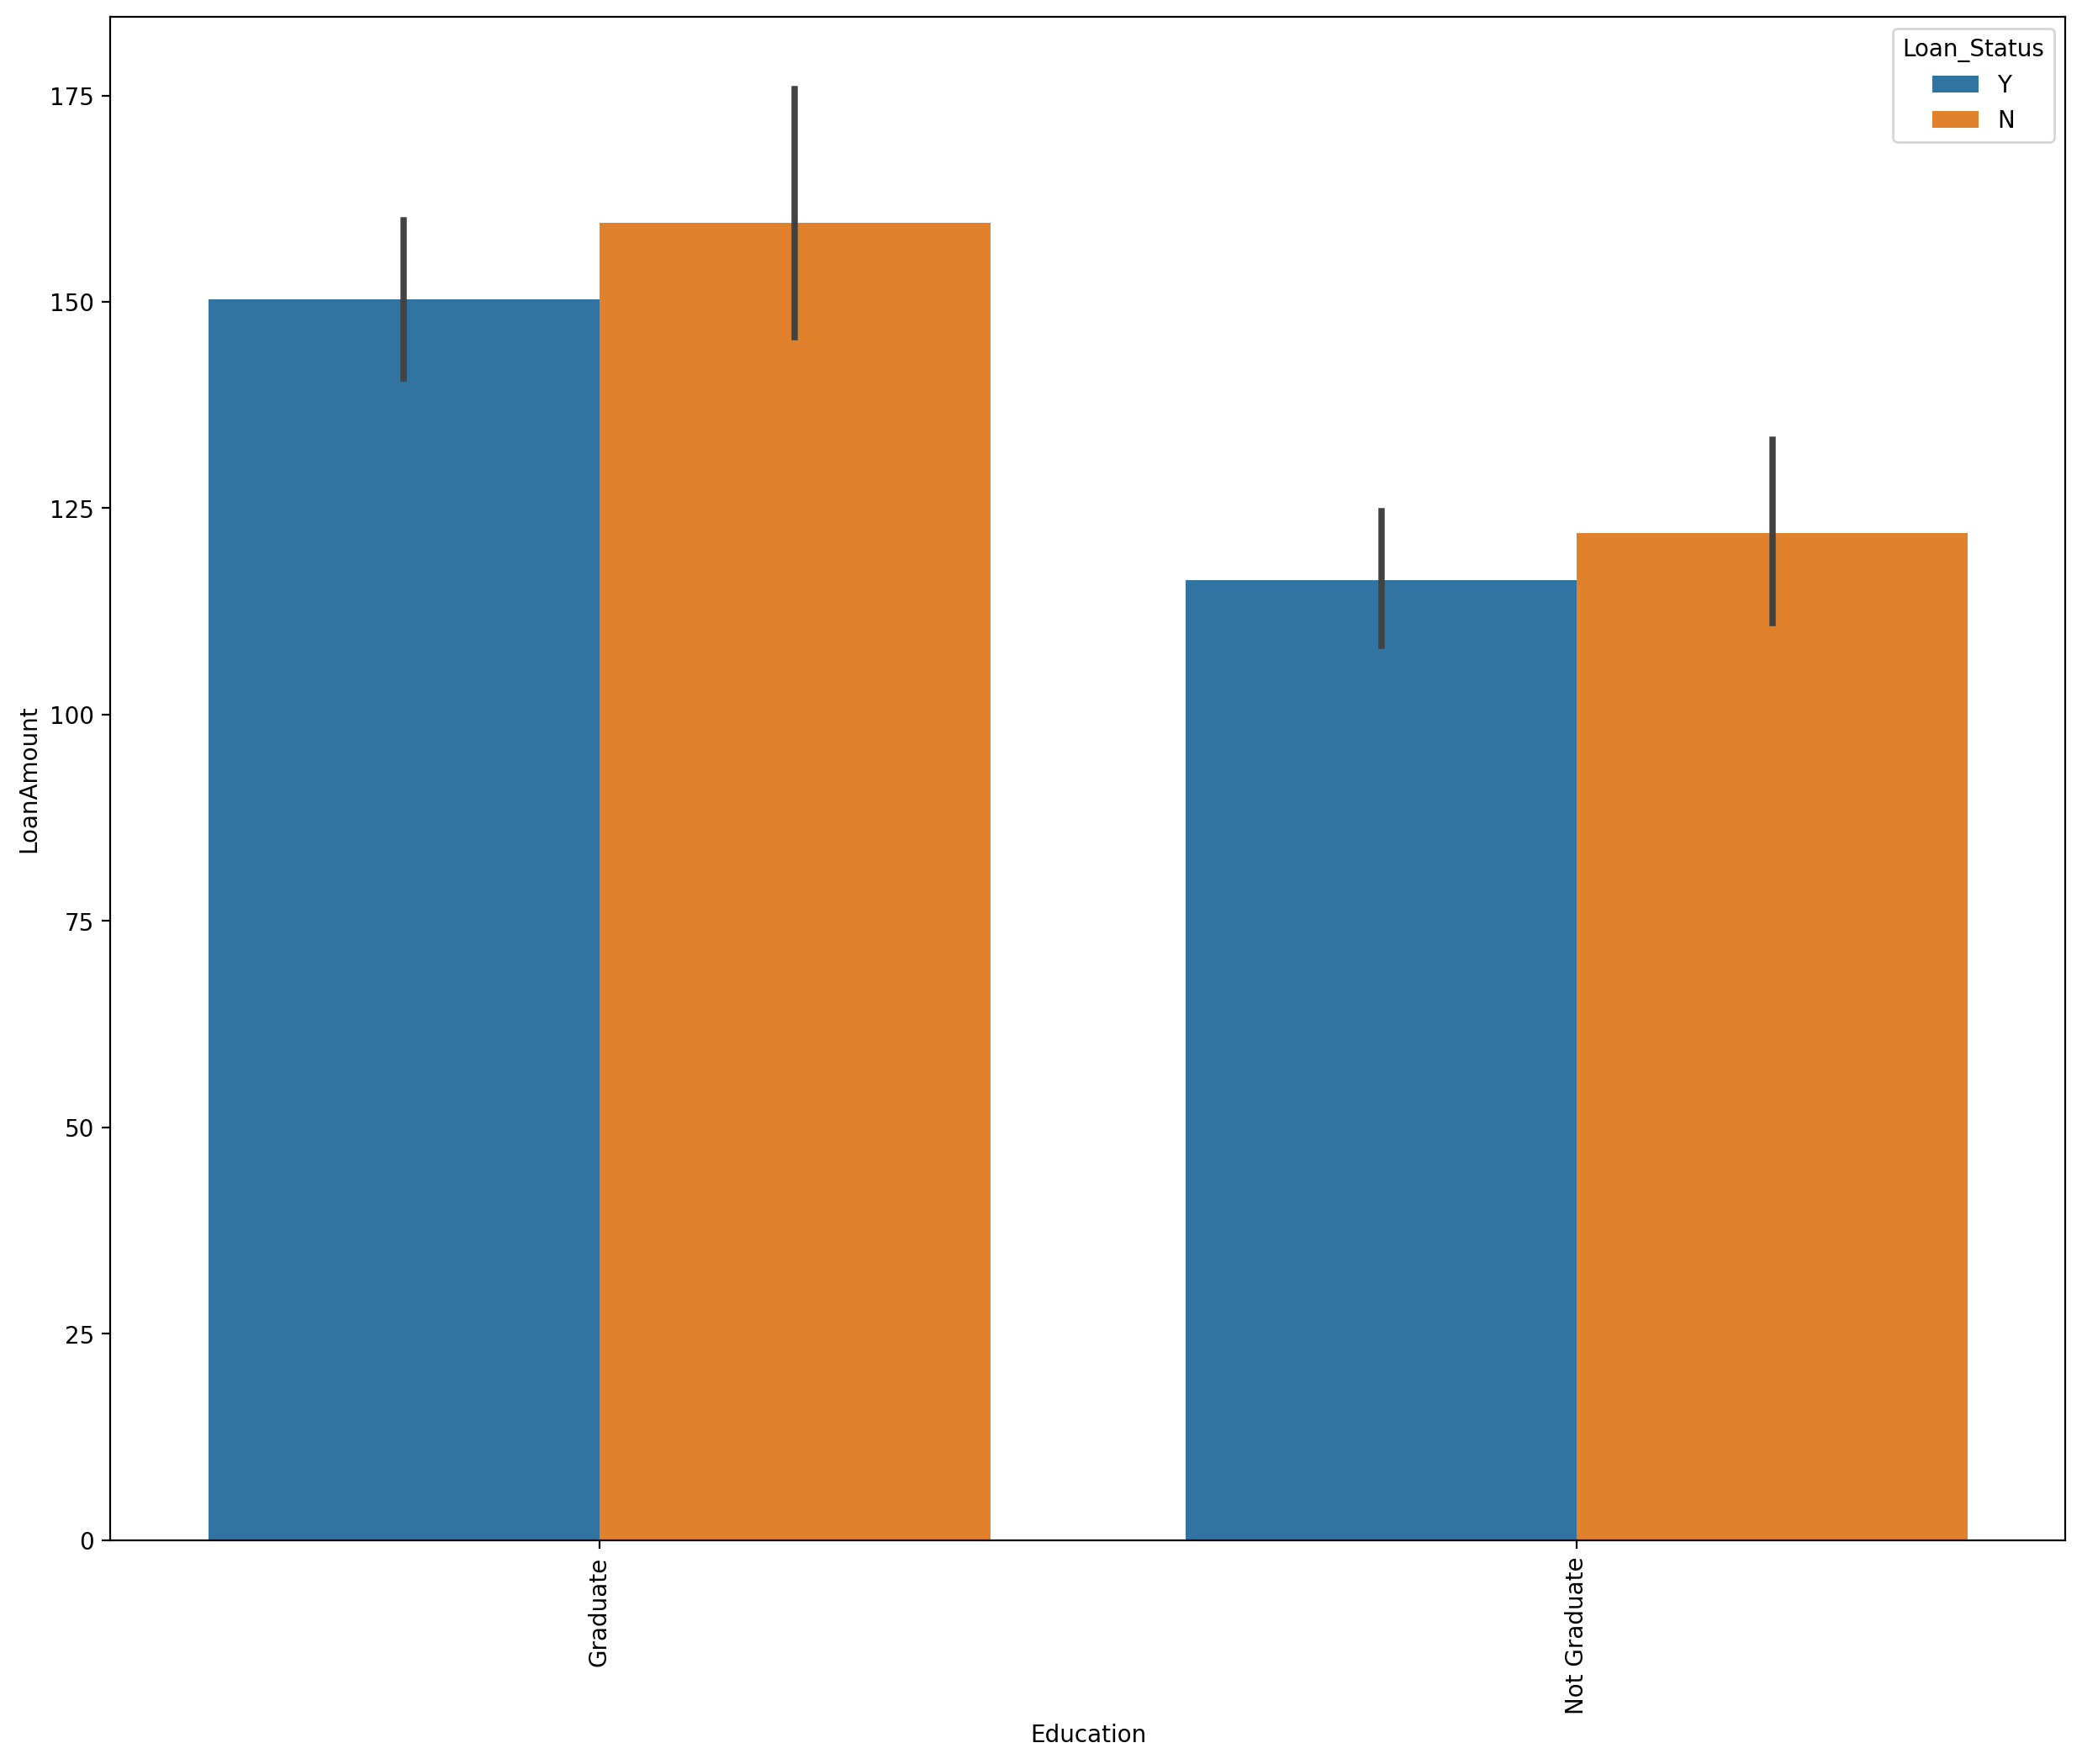

In [59]:
plt.figure(figsize=(15,12),dpi=200)
sns.barplot(data=df,y="LoanAmount",x="Education",hue="Loan_Status")
plt.xticks(rotation=90);

IF PEOPLE,EDUCATED OR NOT, DEMAND HIGHER LOAN AMOUNTS,THEY HAVE A LESSER CHANCE OF GETTING THEIR LOANS APPROVED

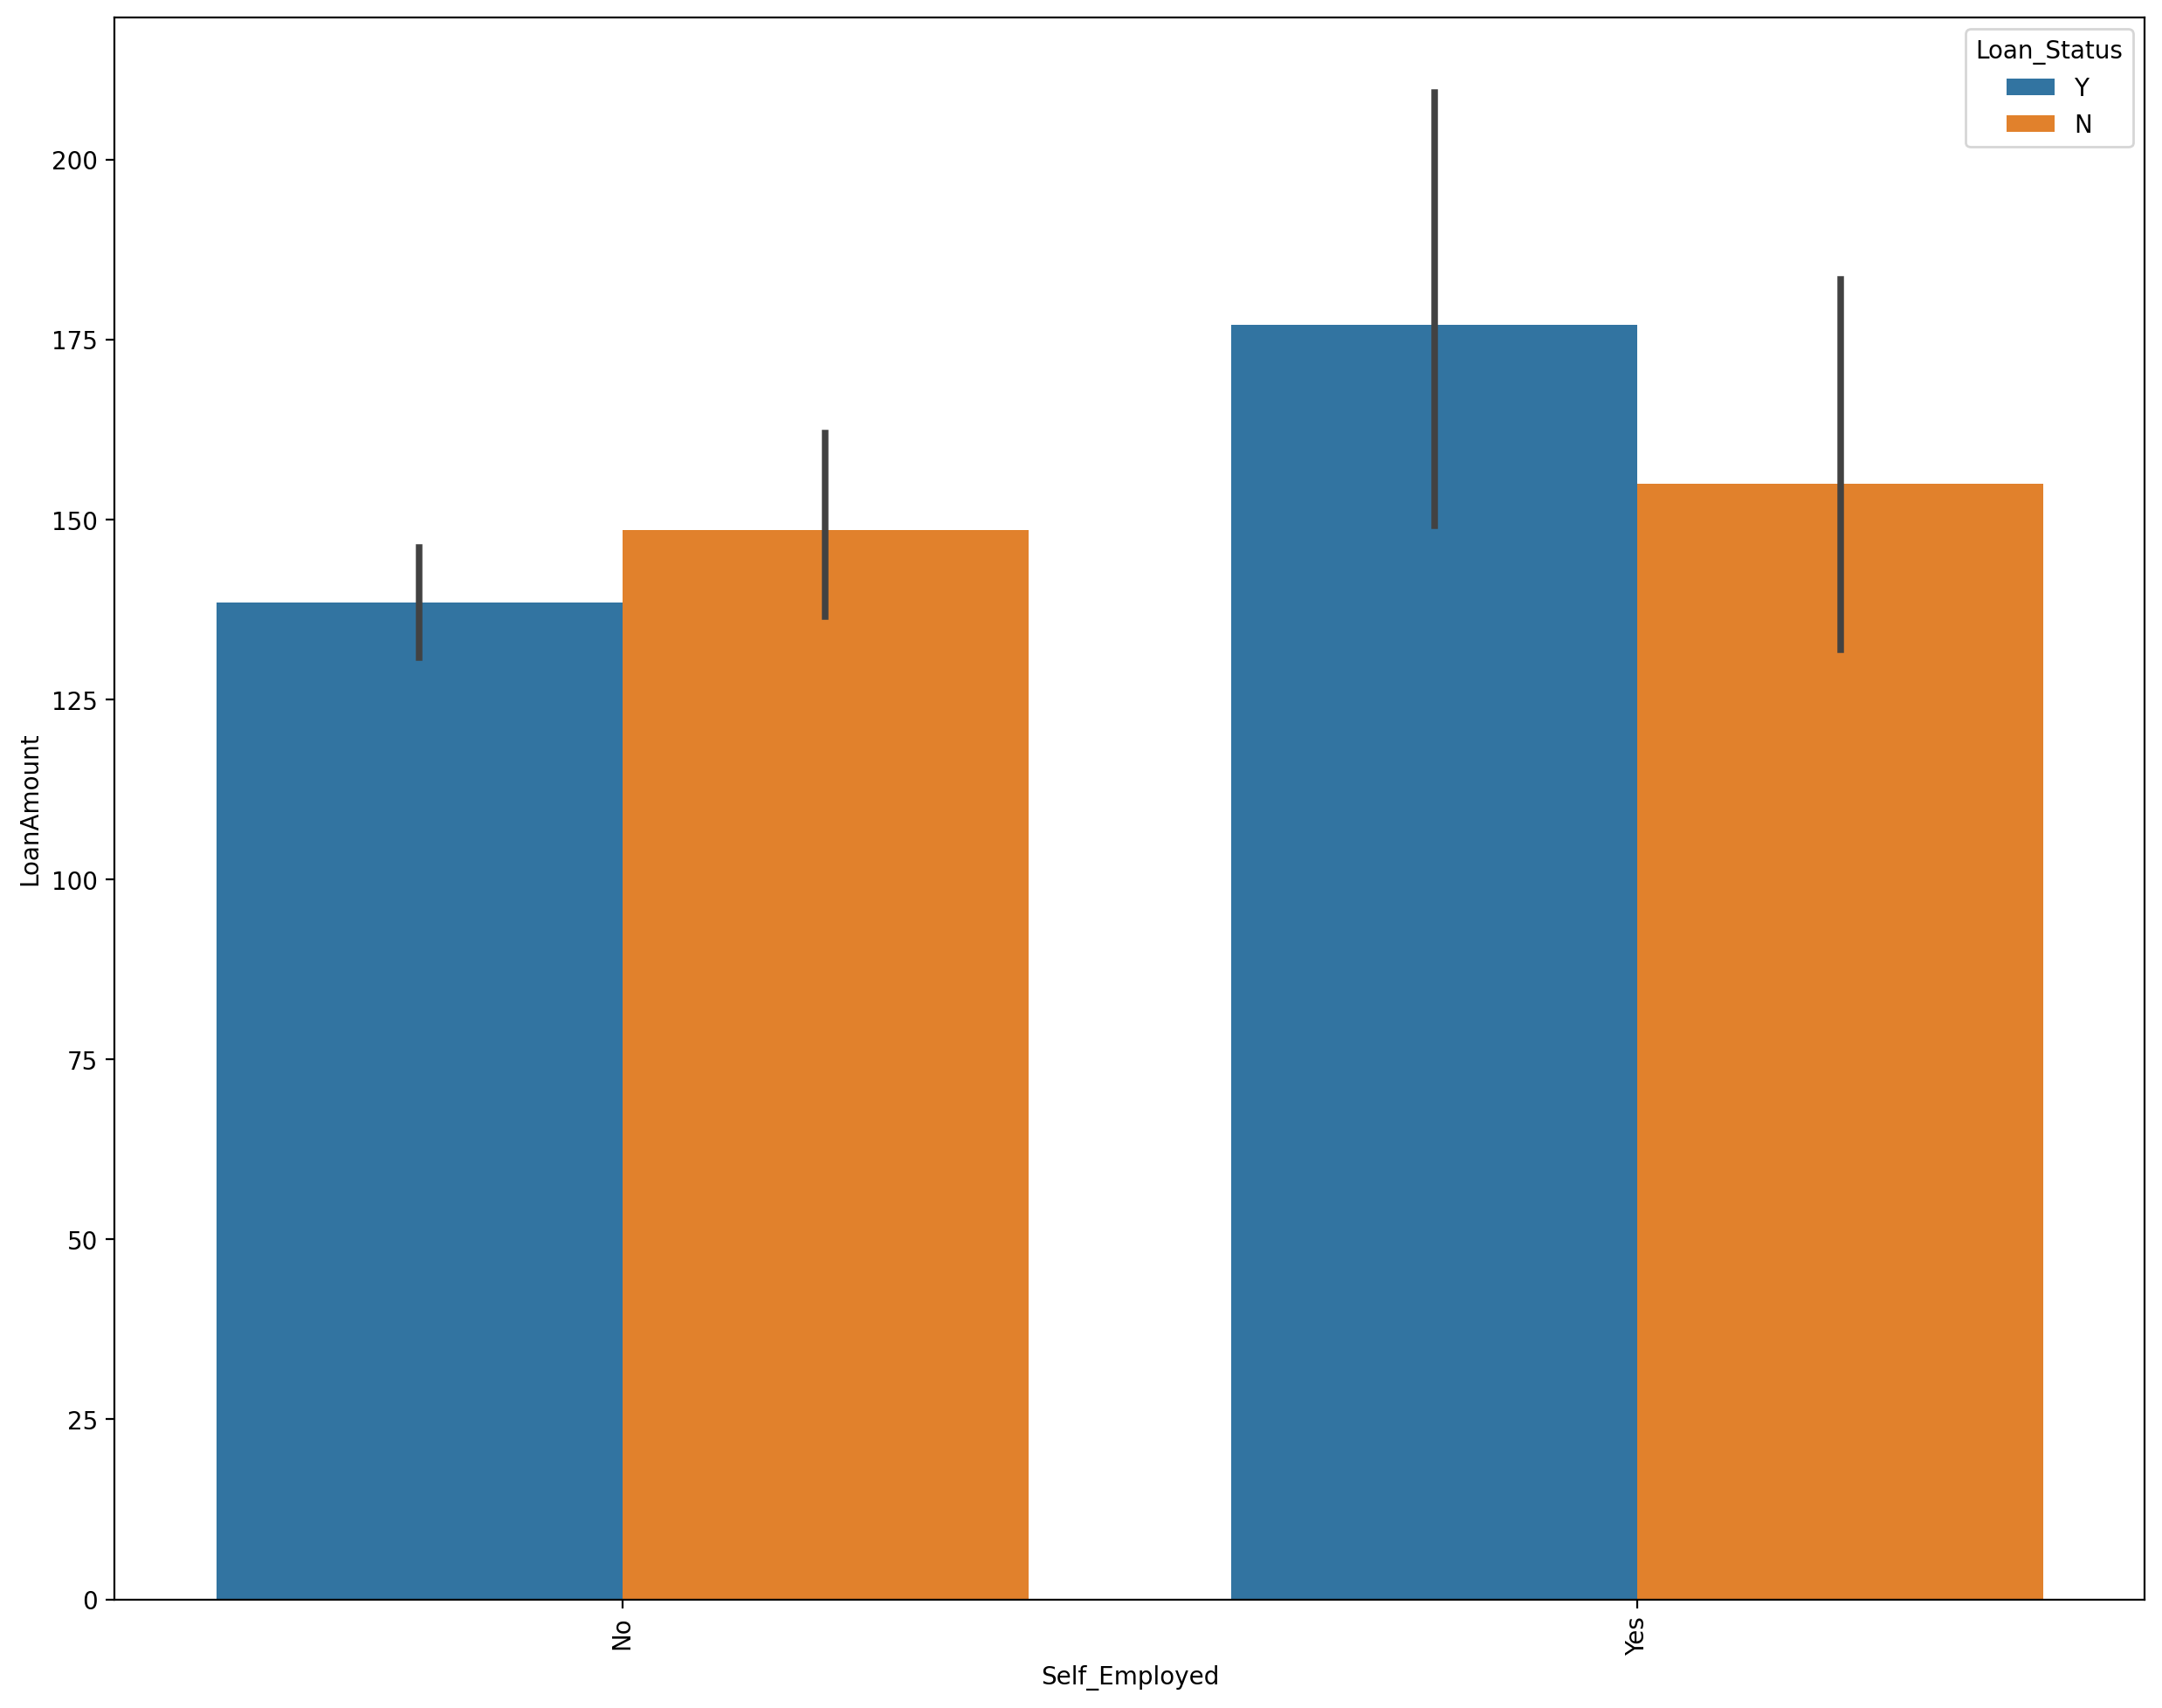

In [60]:
plt.figure(figsize=(15,12),dpi=200)
sns.barplot(data=df,y="LoanAmount",x="Self_Employed",hue="Loan_Status")
plt.xticks(rotation=90);

IF SELF EMPLOYED PEOPLE APPLY FOR HIGHER LOAN AMOUNTS,THEN THEY HAVE A HIGHER CHANCE OF GETTING THEIR LOANS APPROVED.

In [61]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [62]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

there are only 2 values in Crdit_history--> 0 and 1

it appears to be a category.

In [63]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

there are 10 values for Loan_amount term;It seems to be a category.

In [64]:
numerical_columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

creating a list of columns having numerical values.

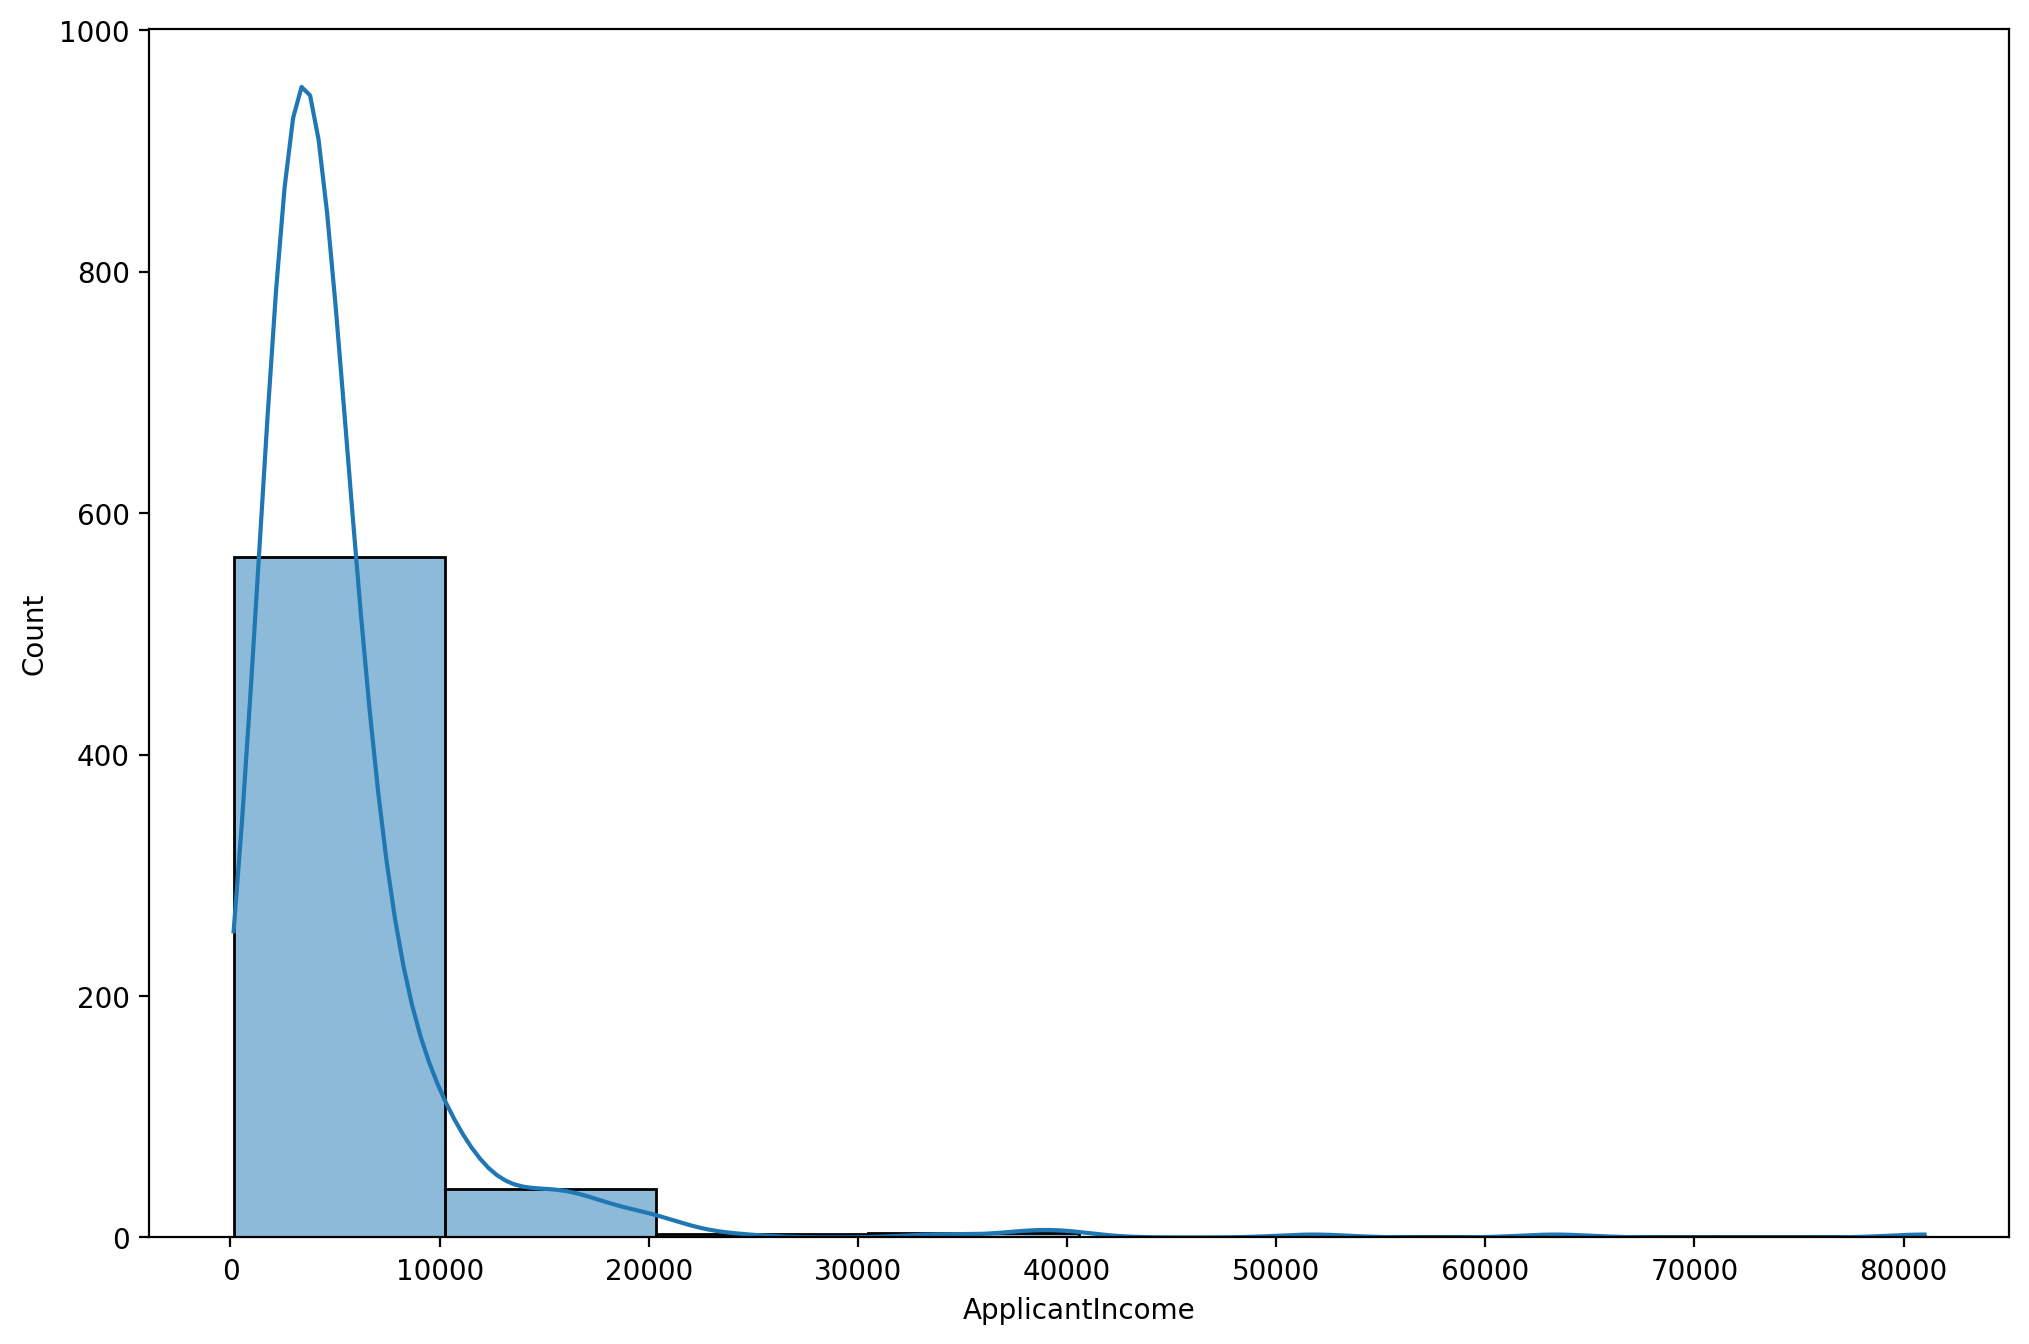

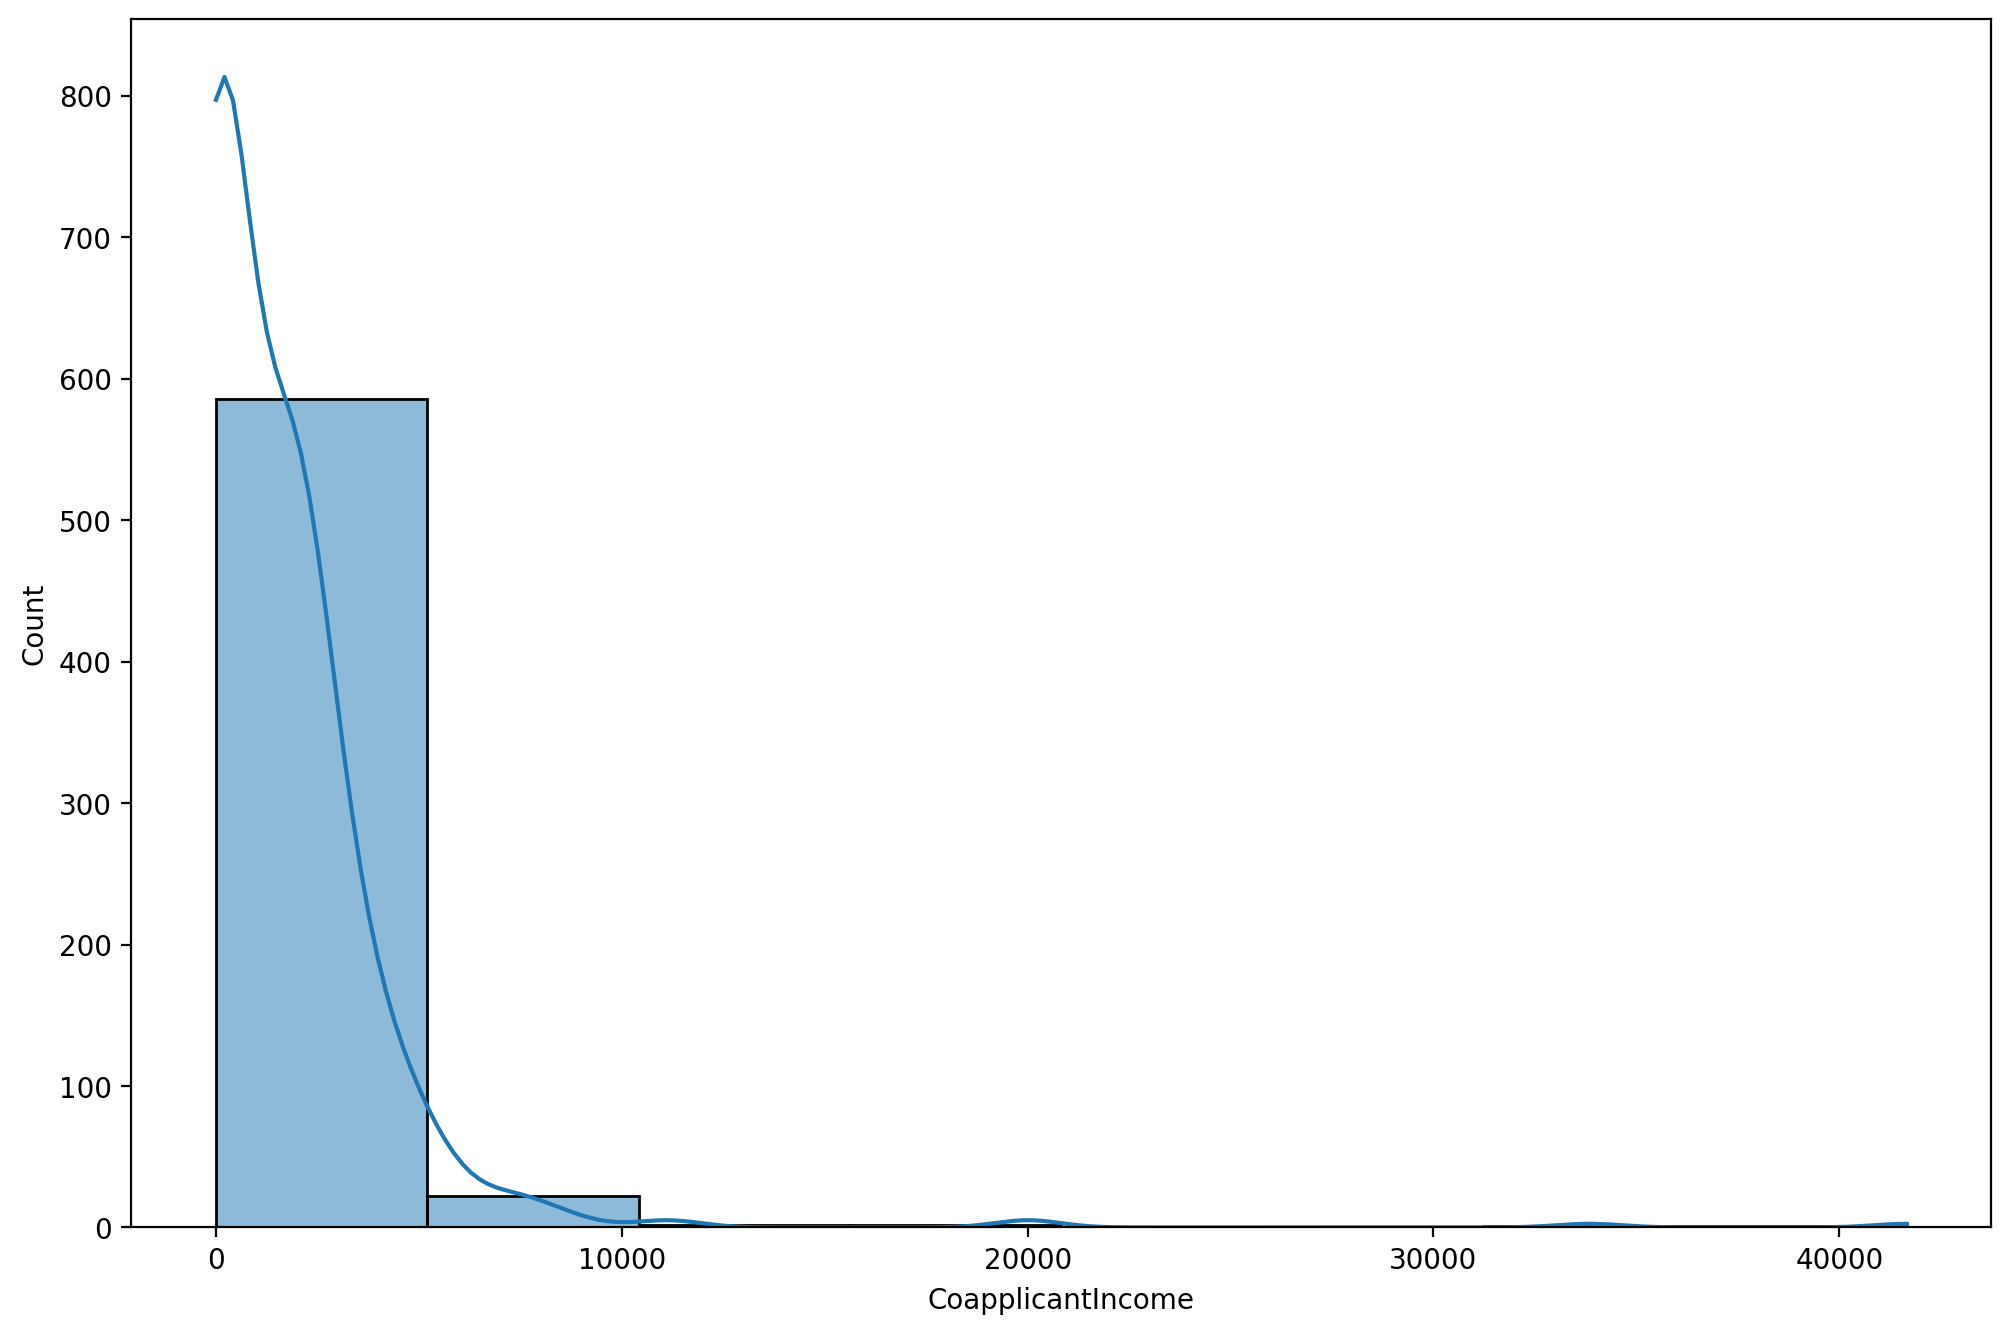

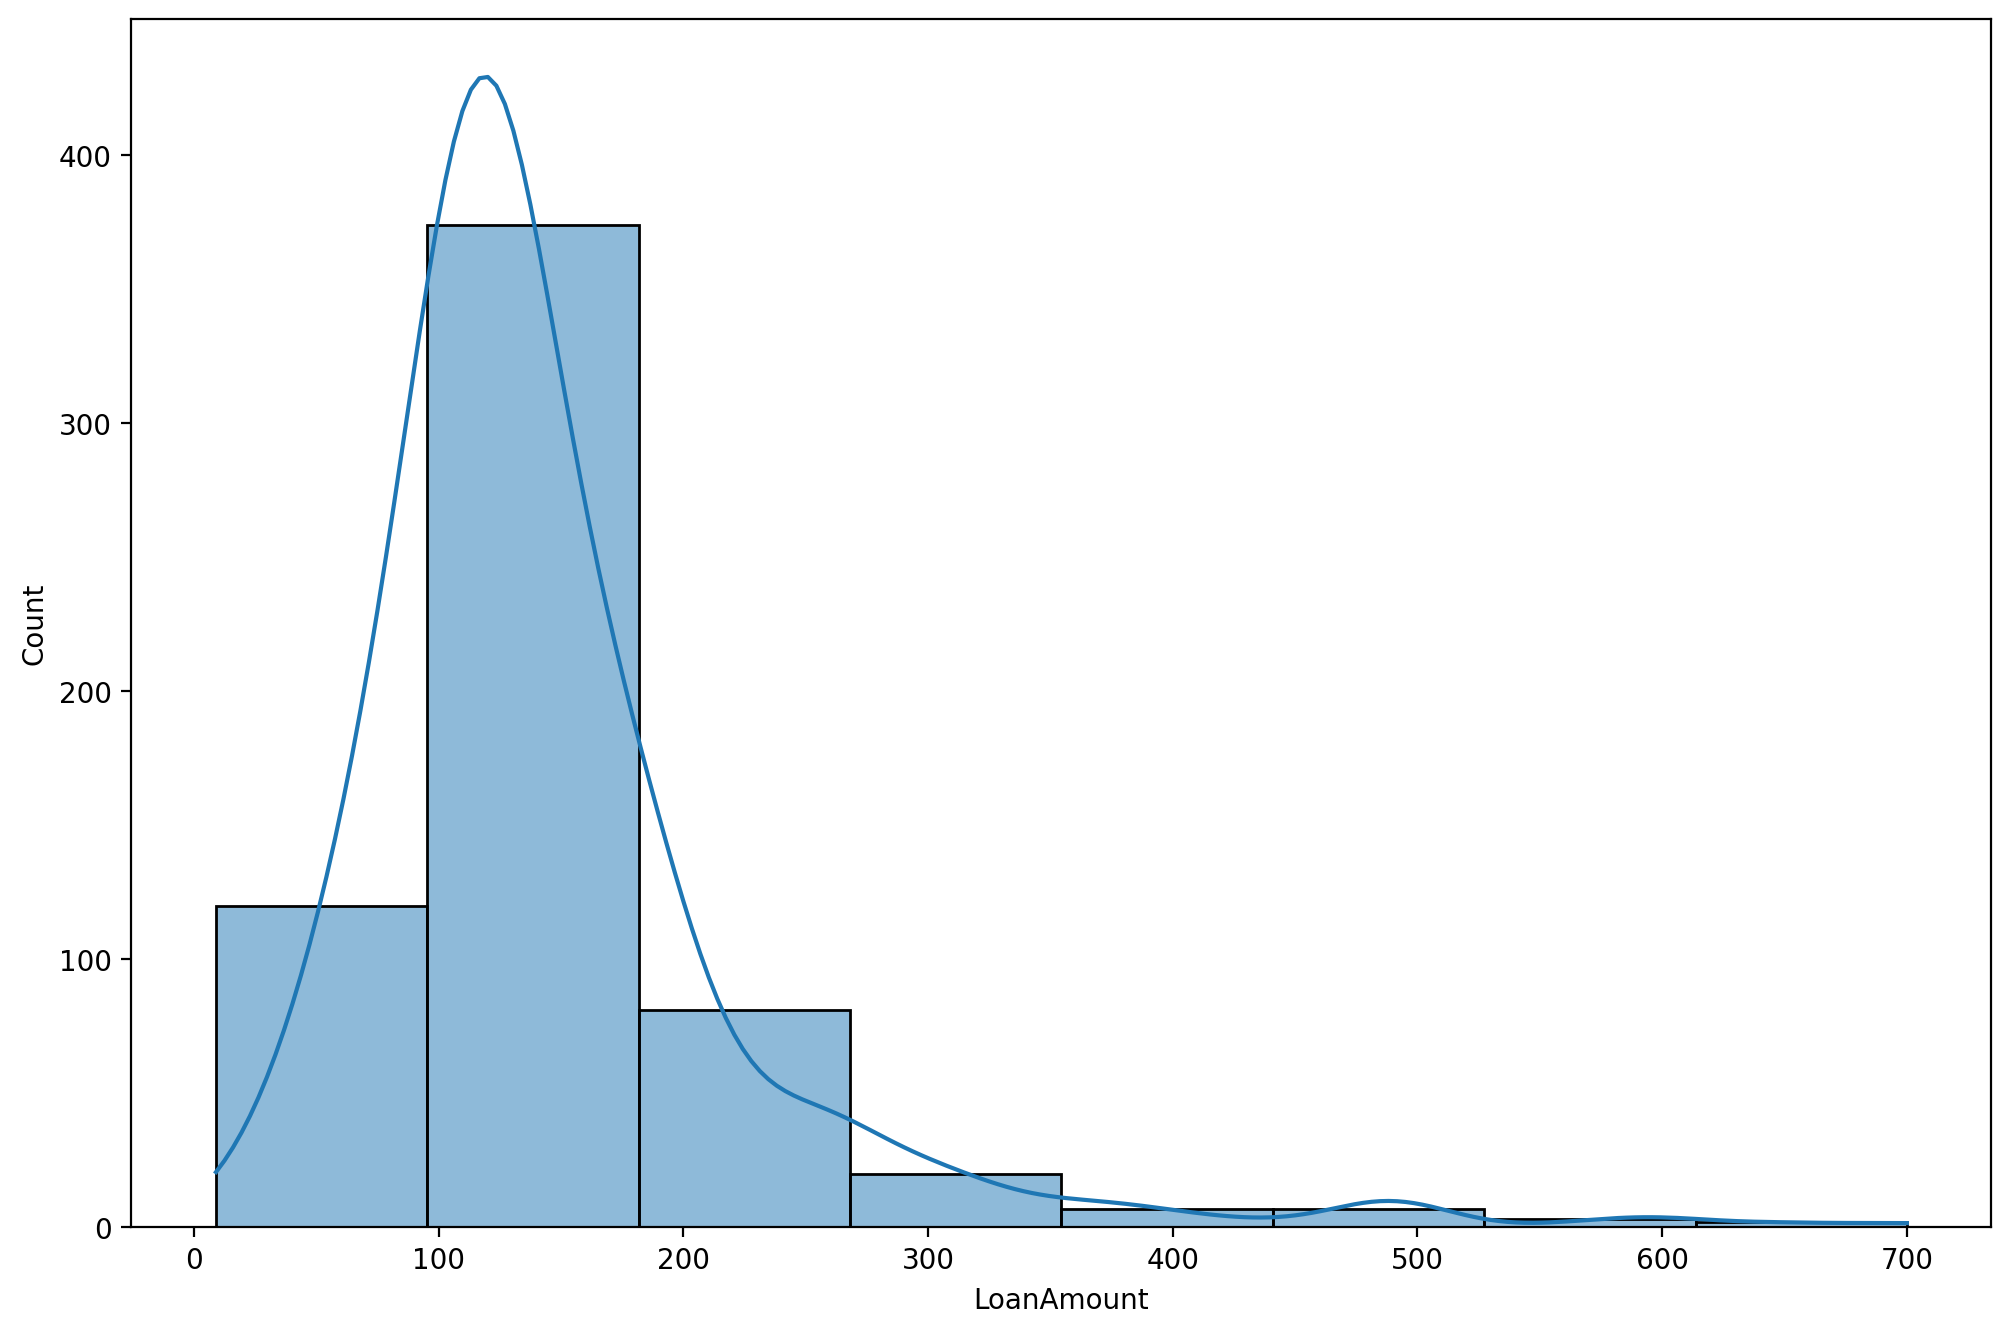

In [65]:
for i in numerical_columns:
    plt.figure(figsize=(12,8),dpi=200)
    sns.histplot(x=df[i],data=df,kde=True,bins=8)

the most number of counts for every column named in above list is around:
    
Applicant income--0 and 10000 and it is a rightly skewed data distribution.  

Co-applicant income--0 and 5000 and it is a rightly skewed data distribution.

Loan amount--100 and before 200 and it is a rightly skewed data distribution.


In [66]:
cat_columns= ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

I am creating a list for all categorical colums also including loan term amount and credit history.

Loan amount term is the term of loan in months.



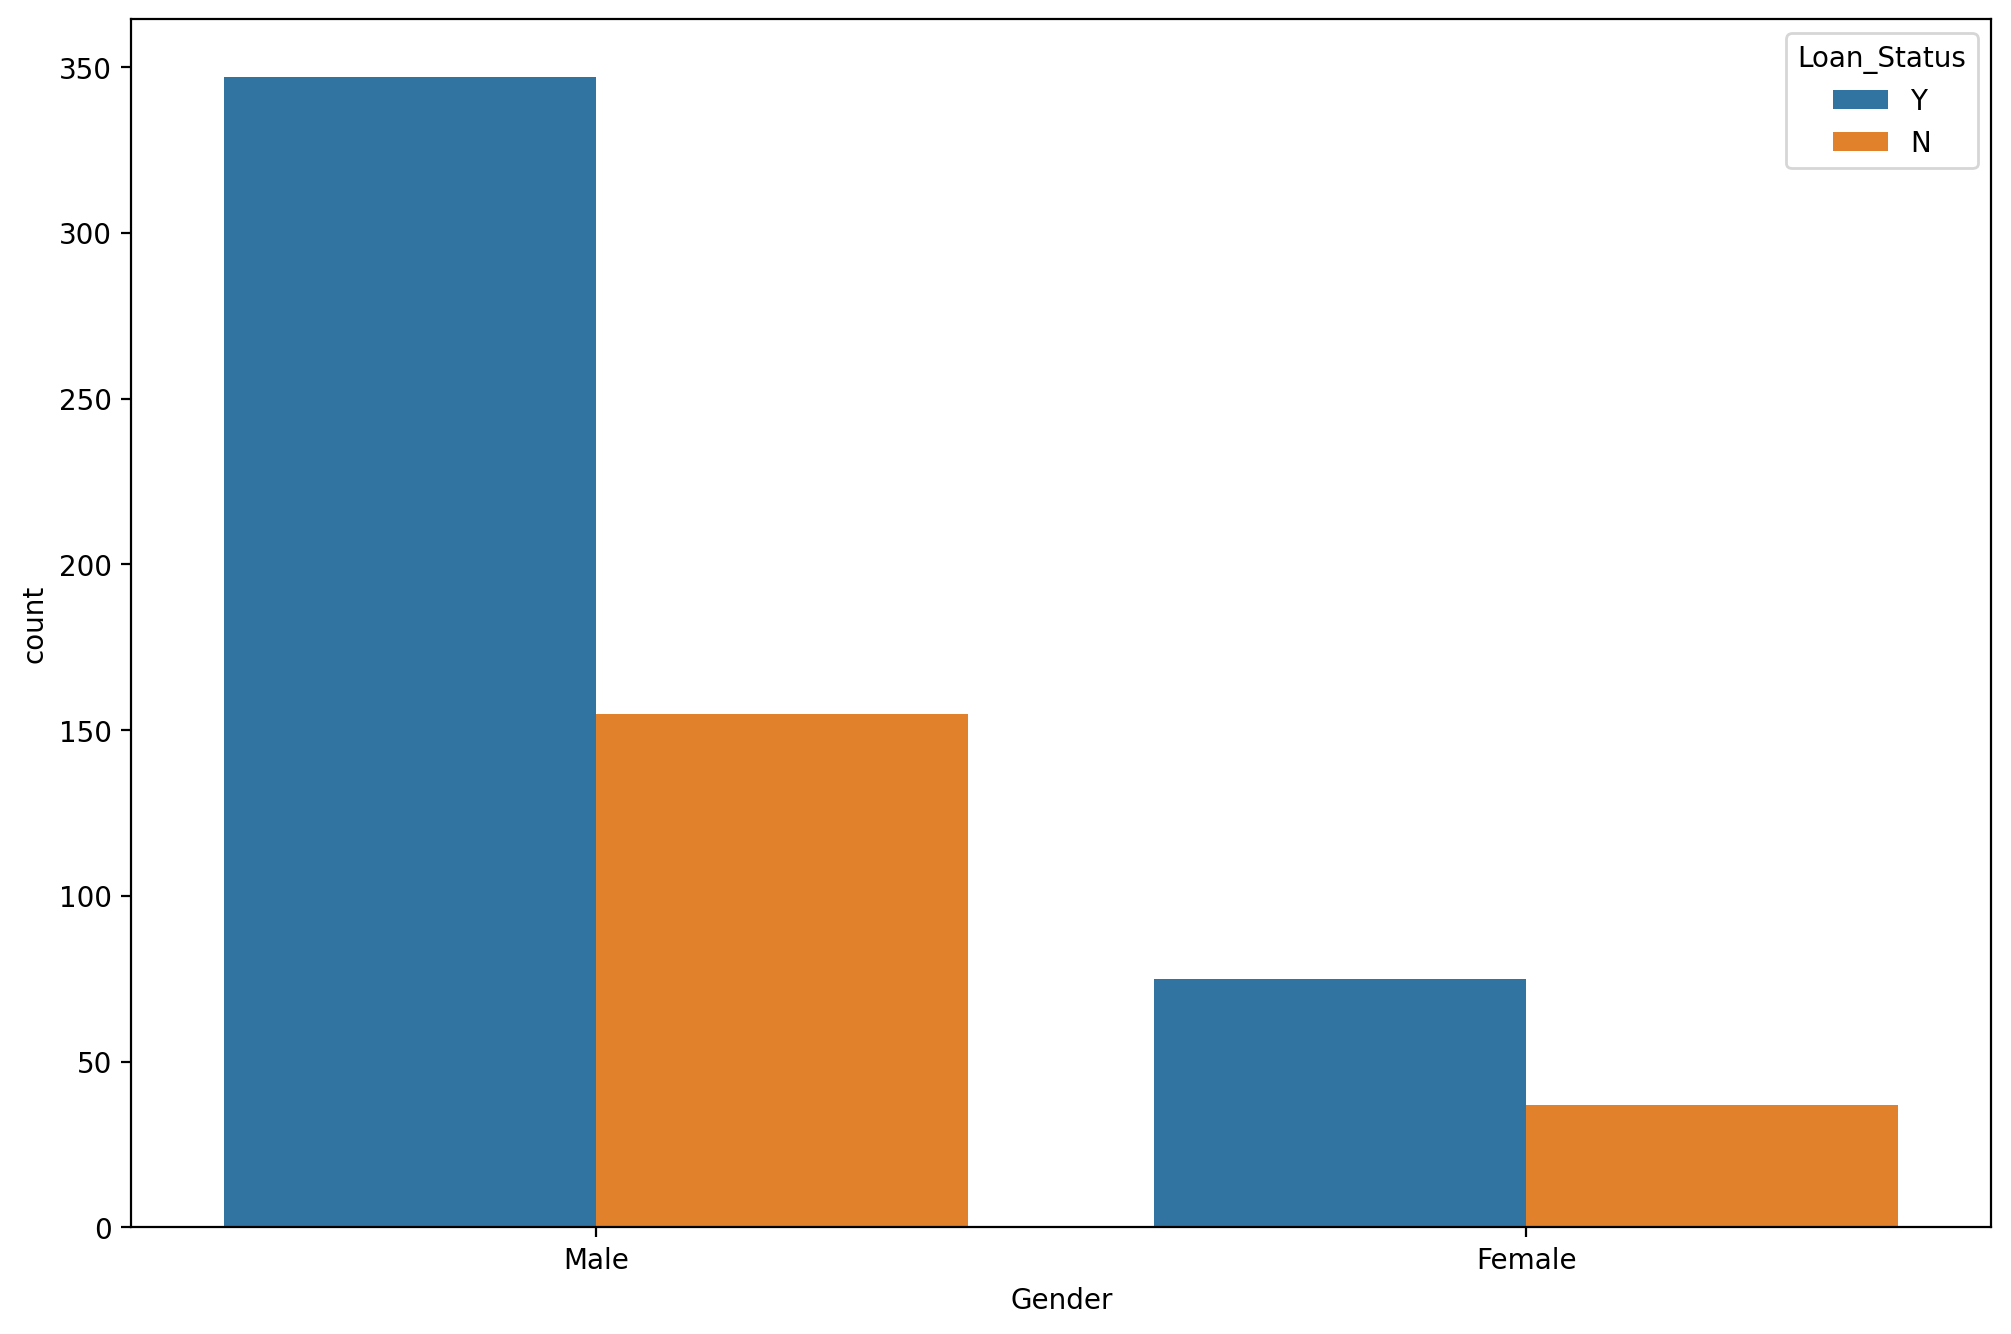

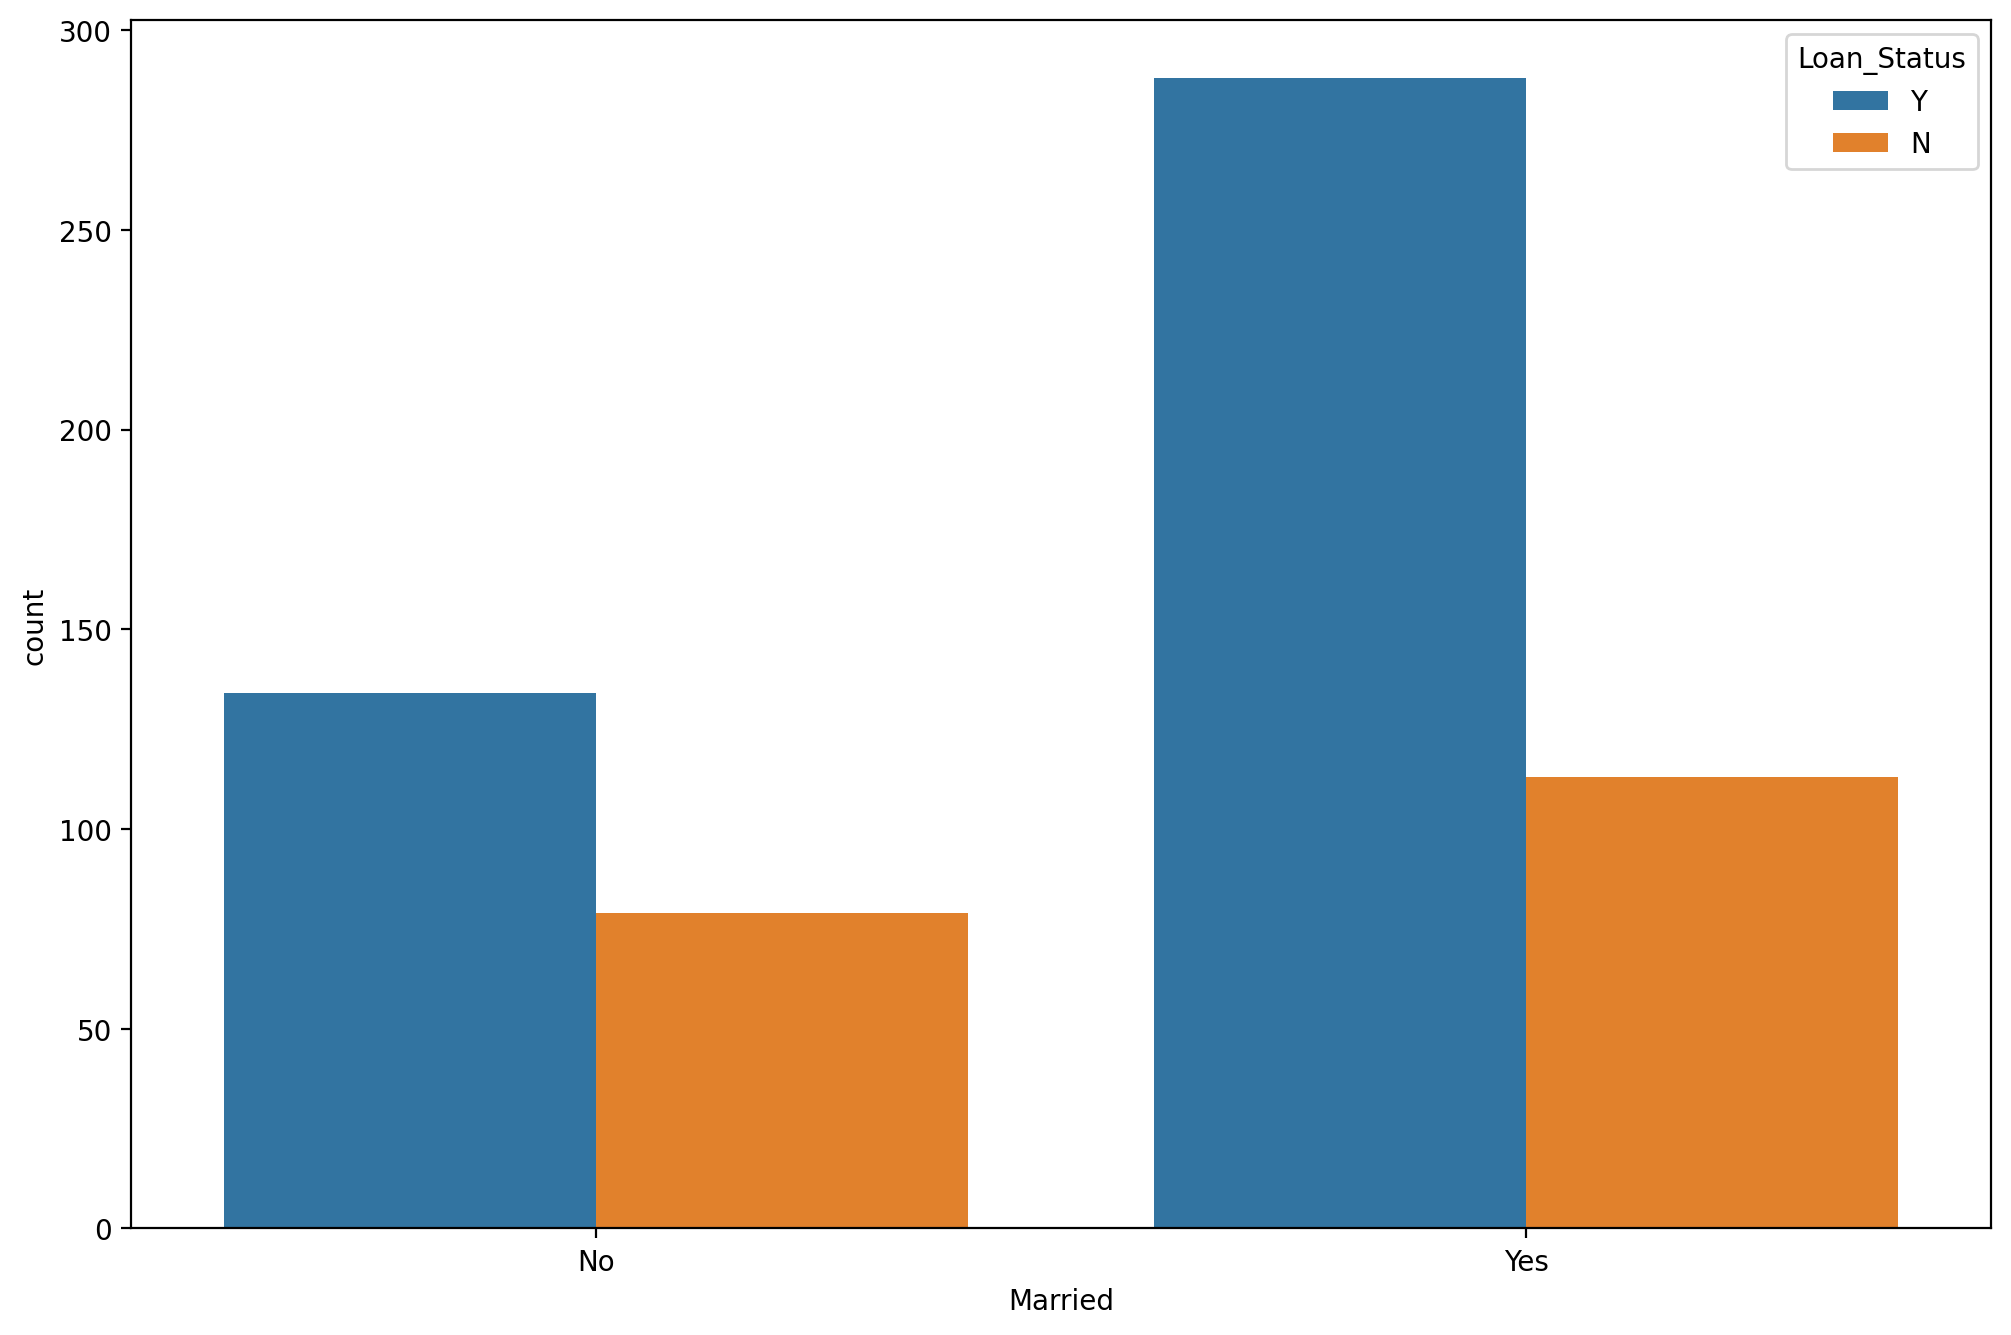

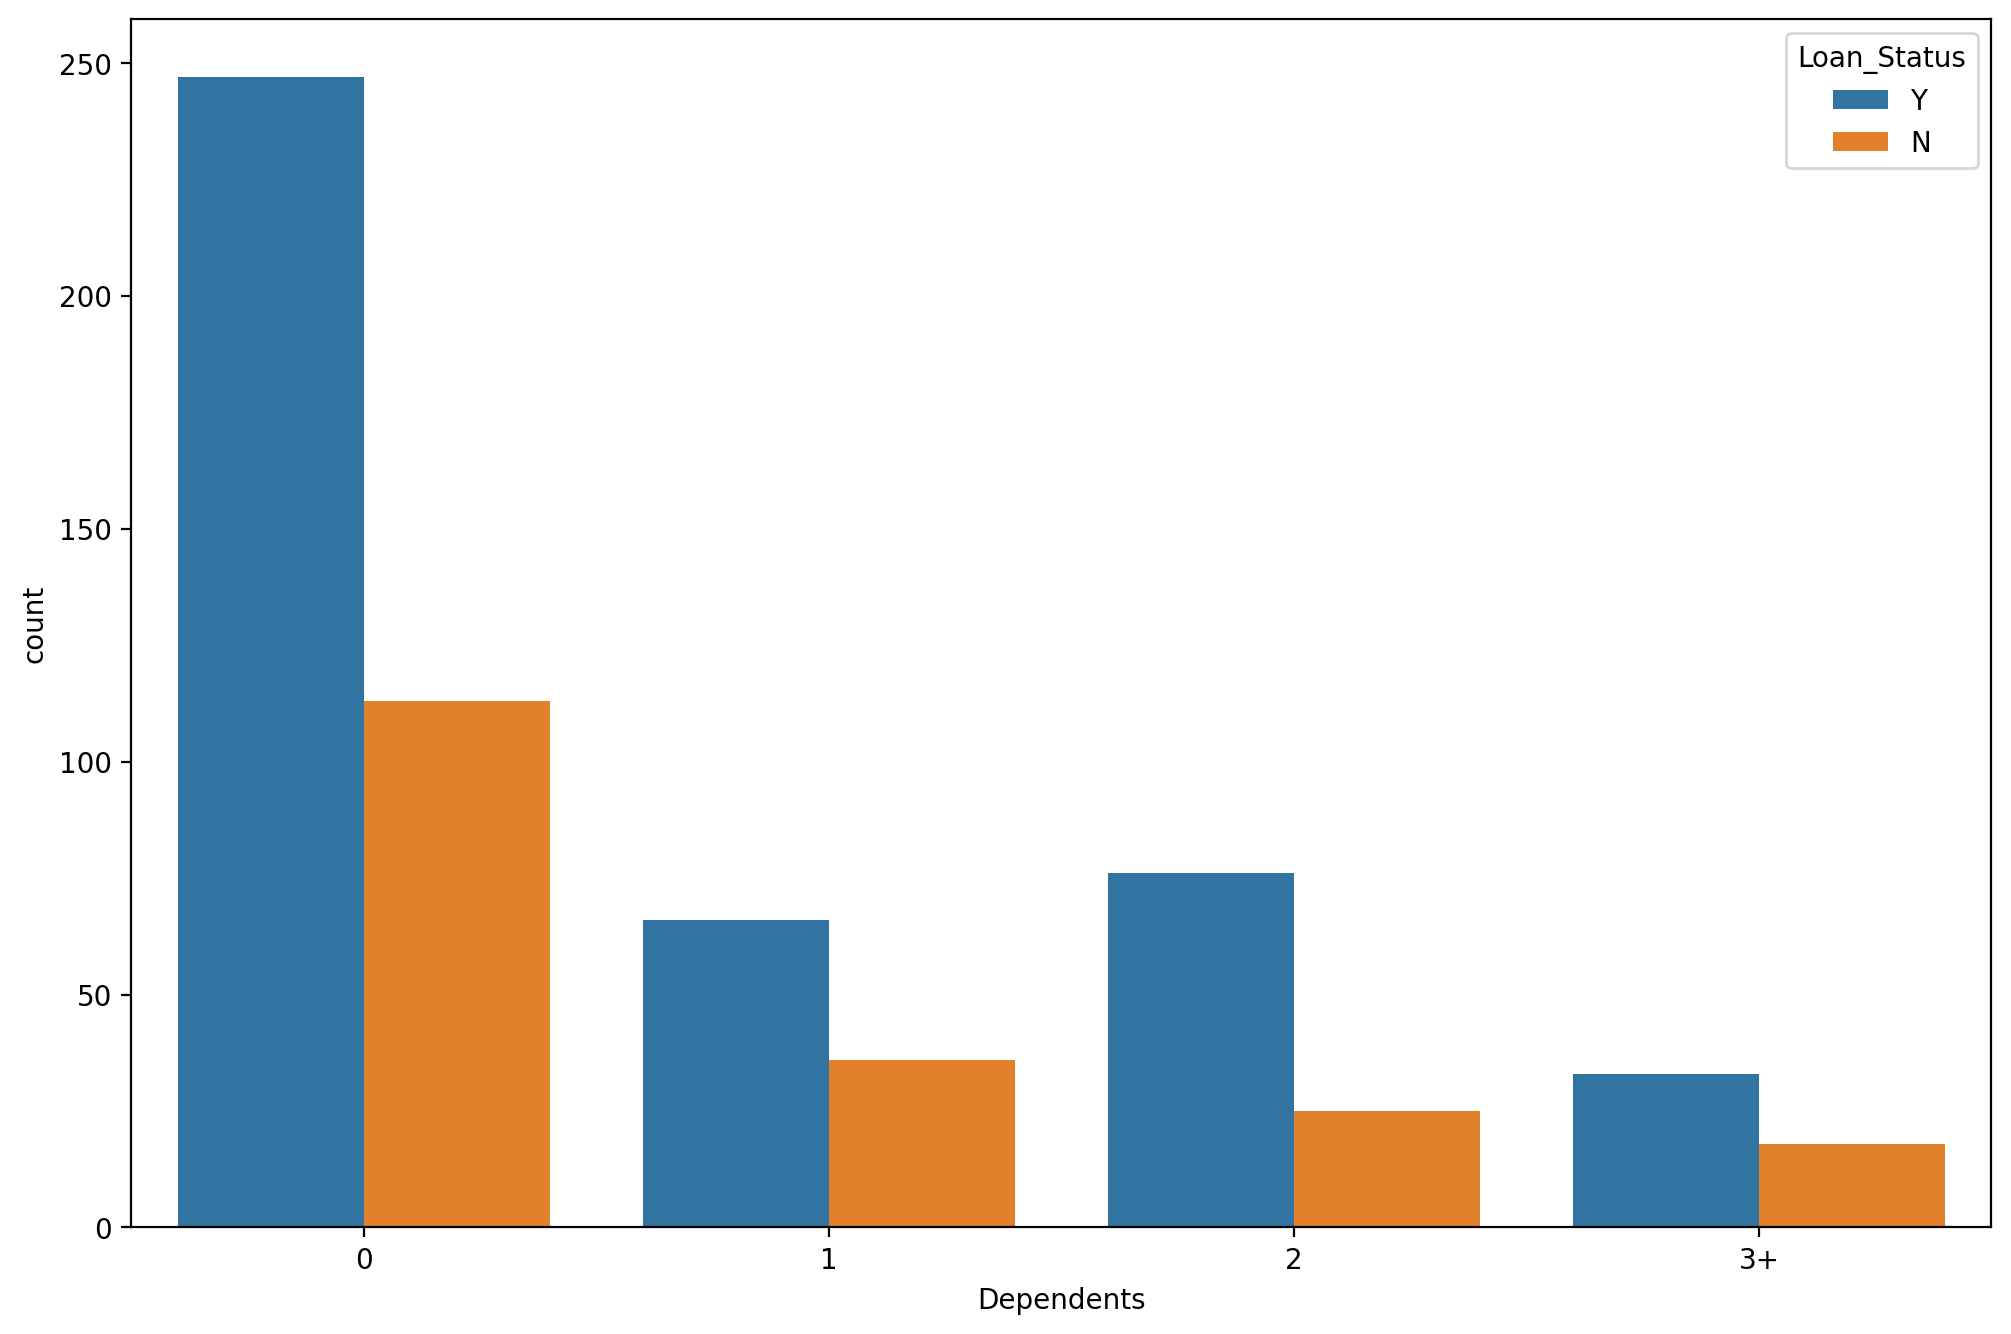

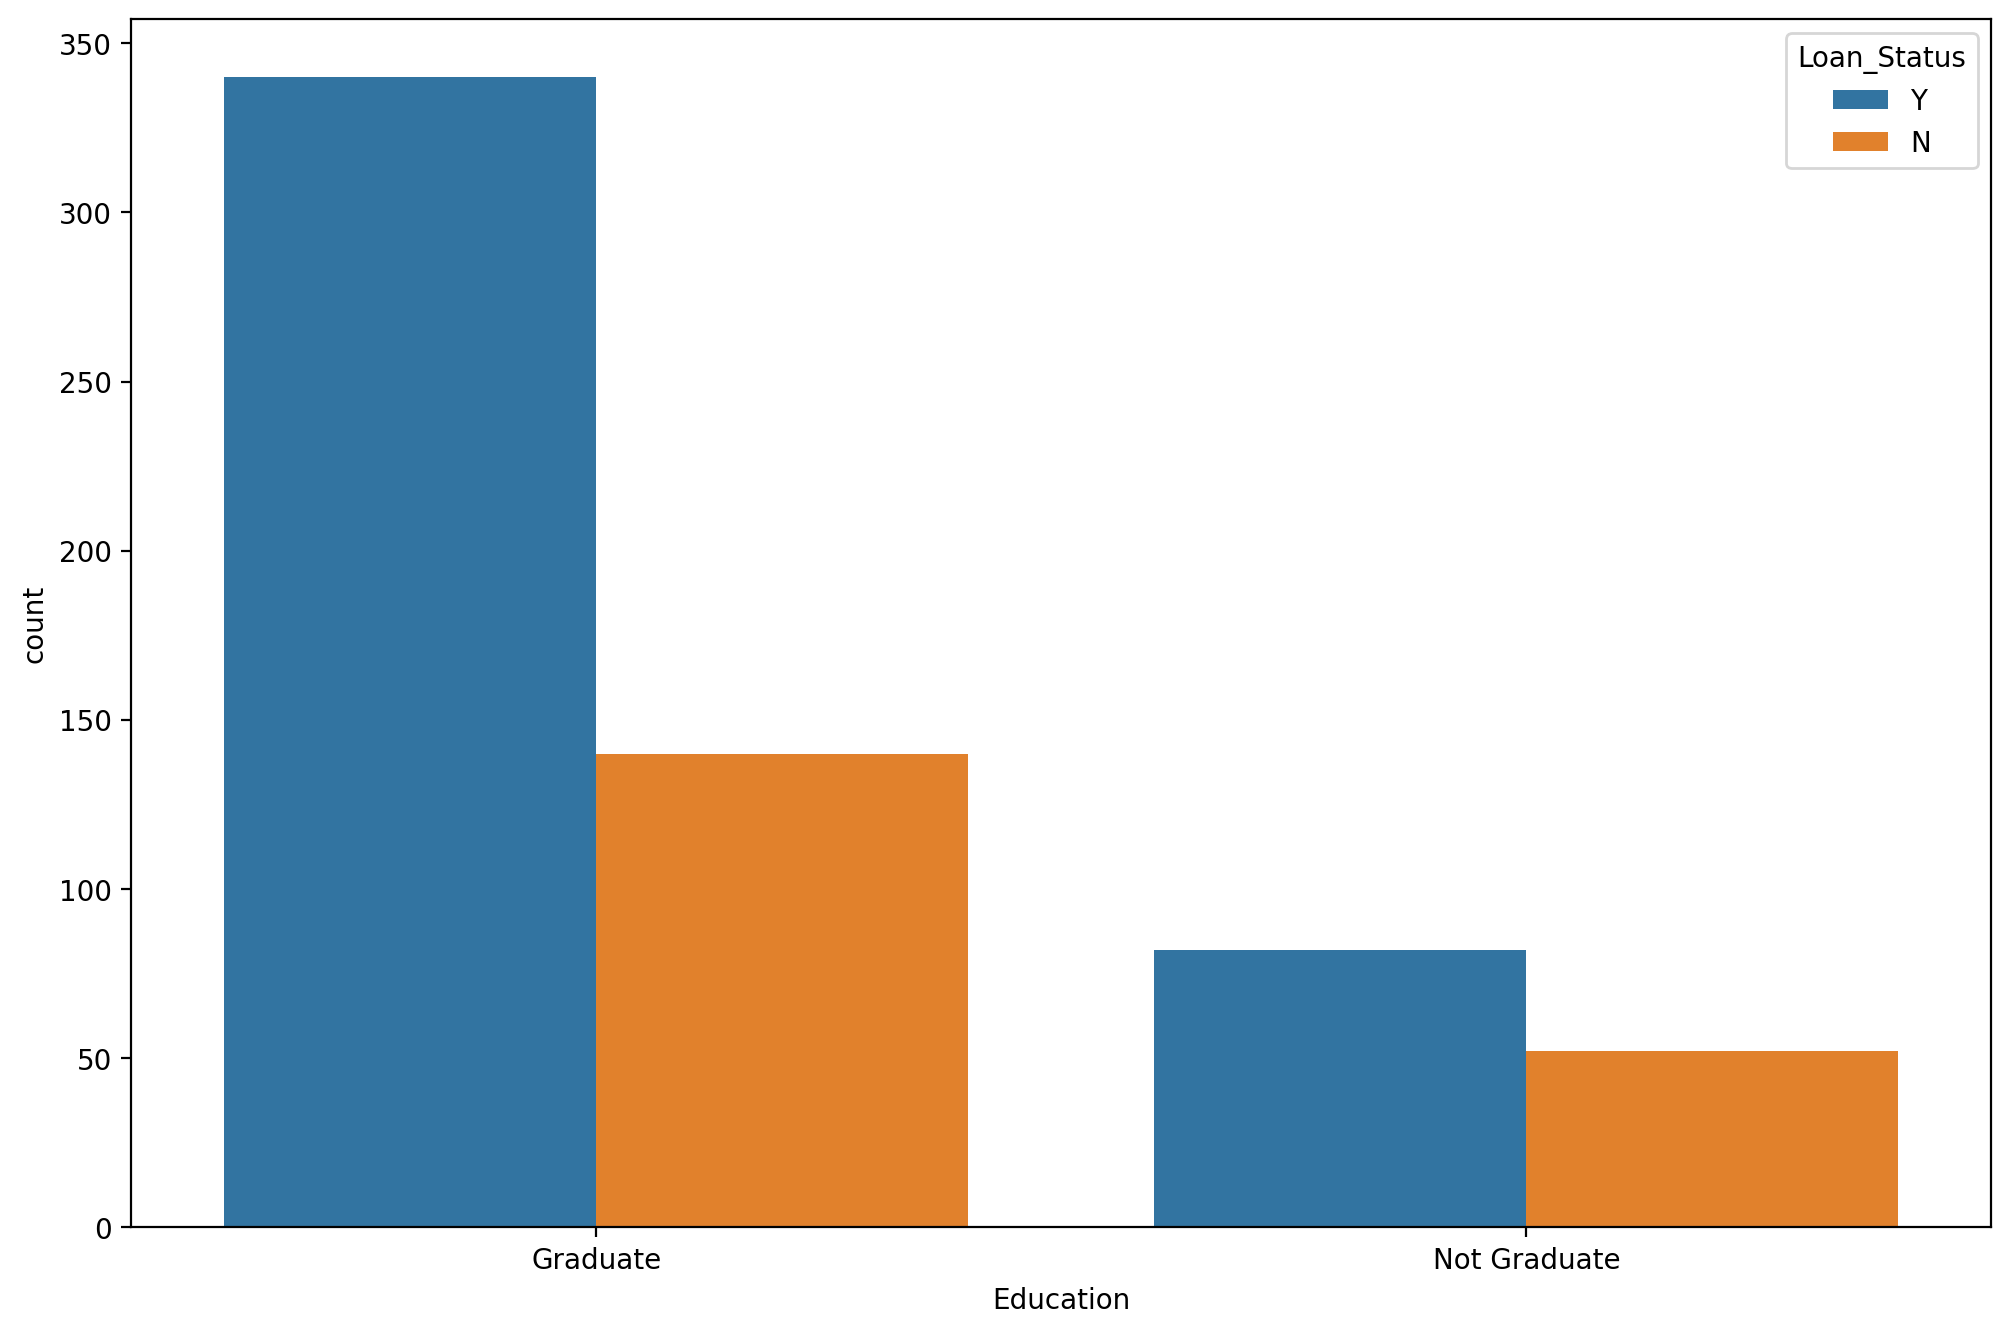

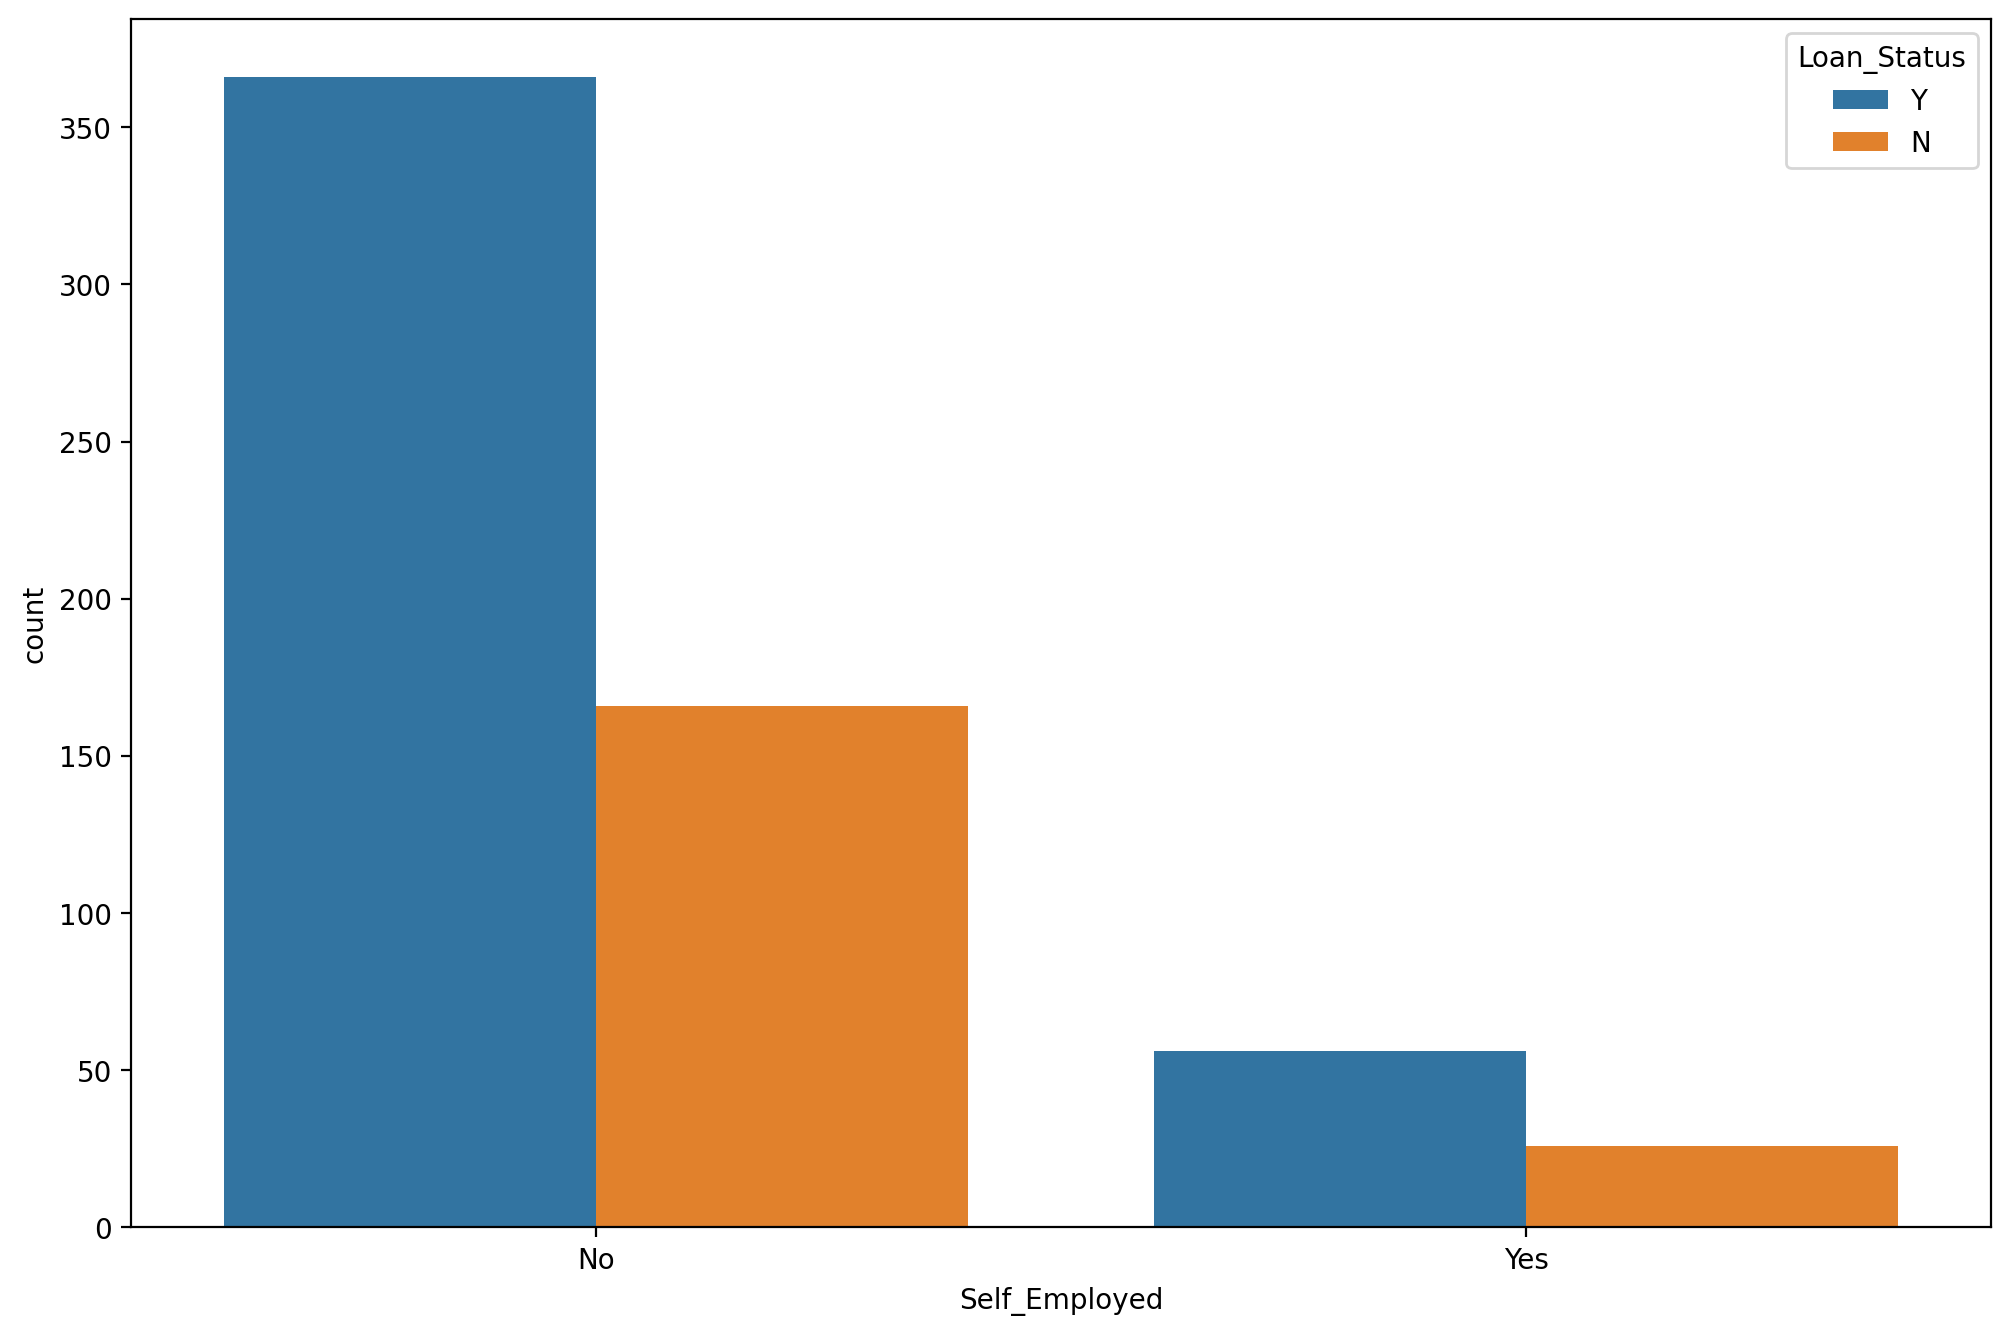

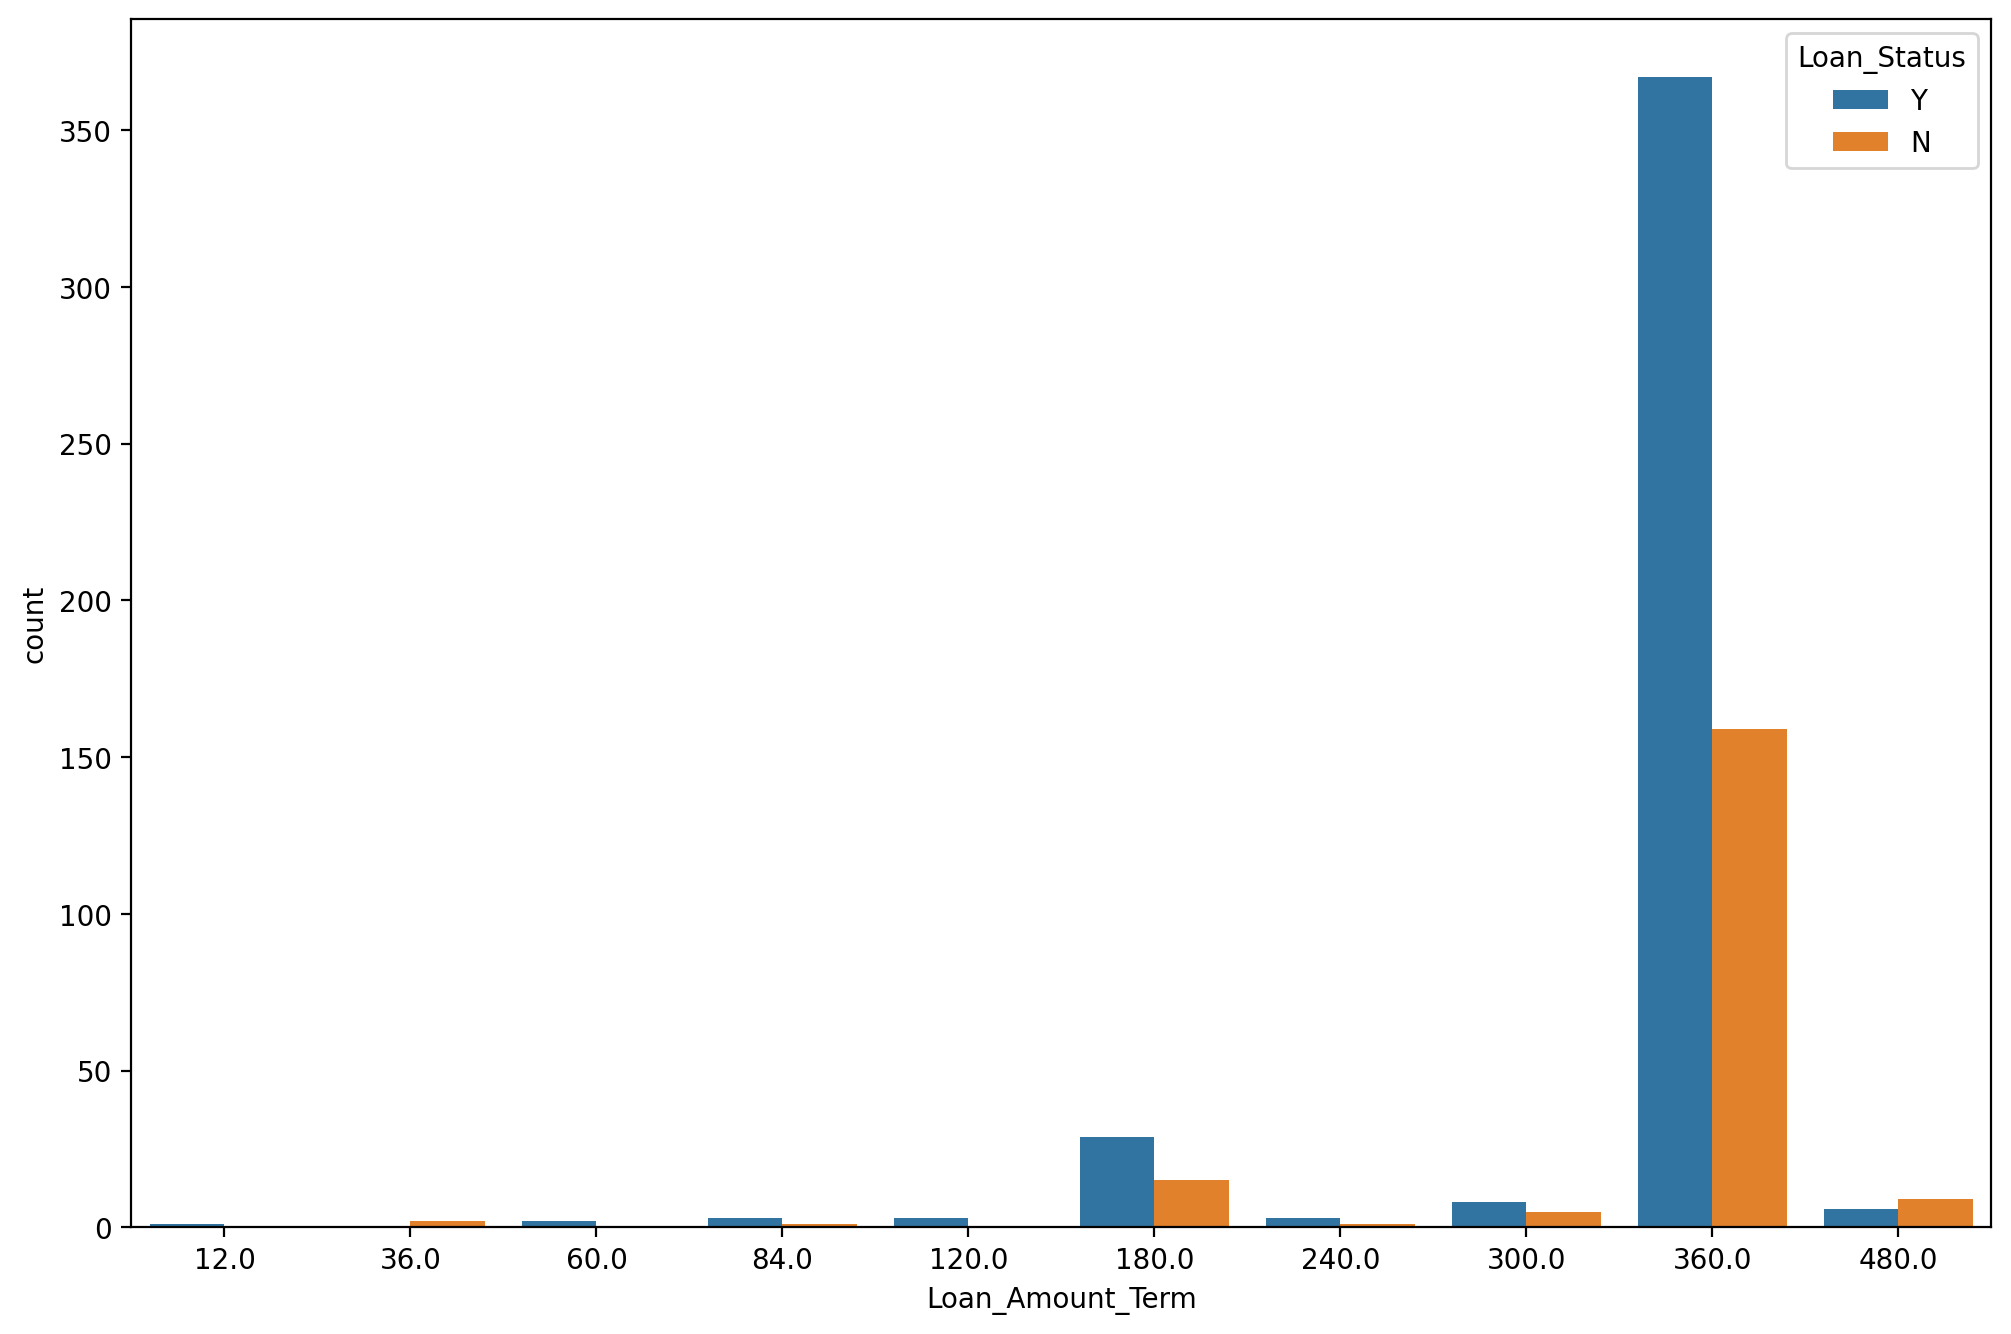

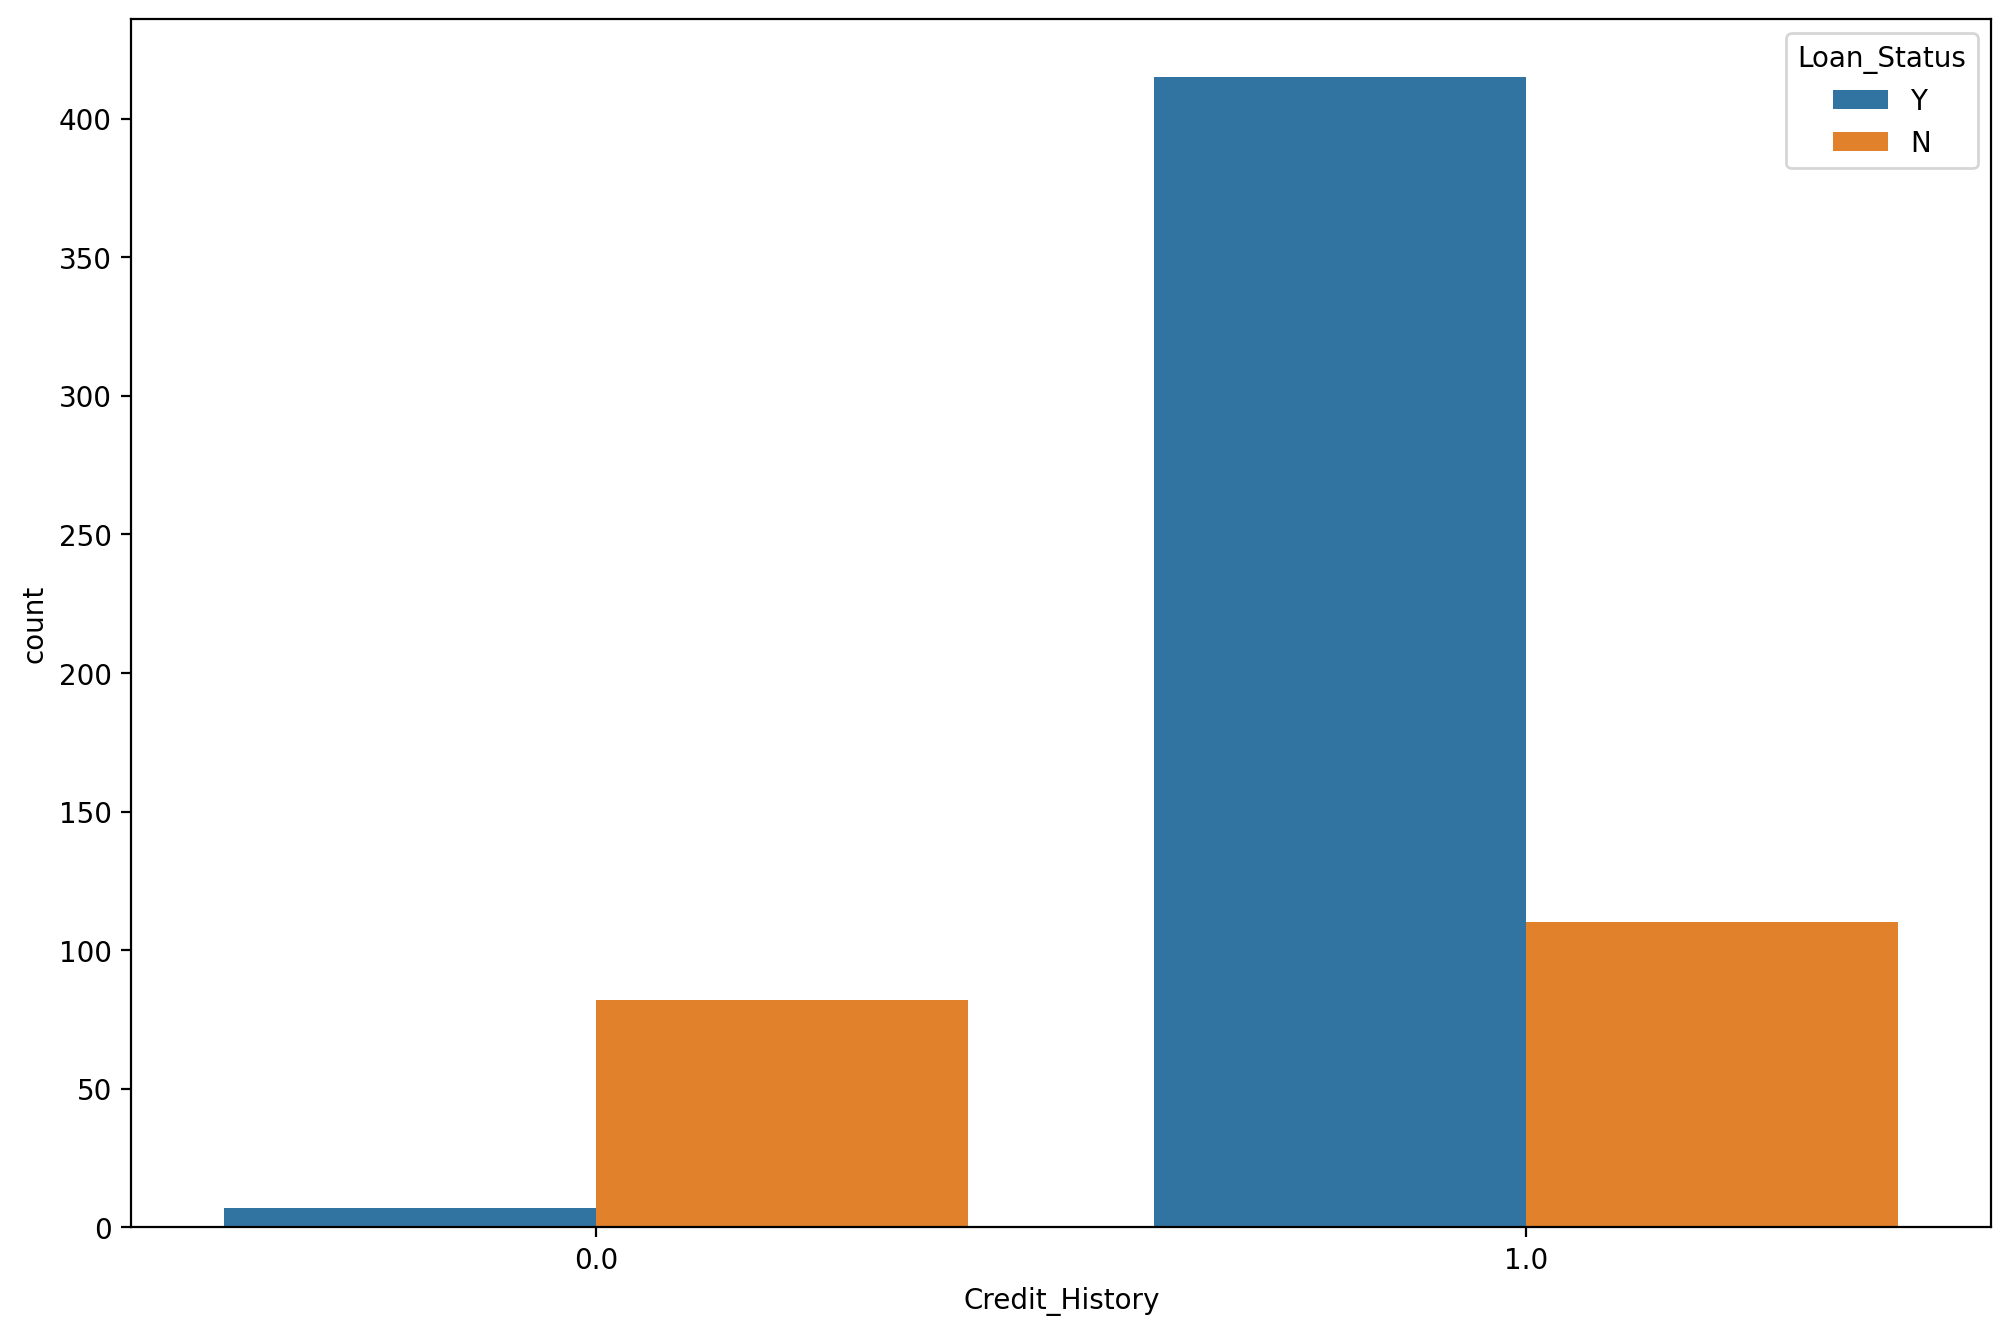

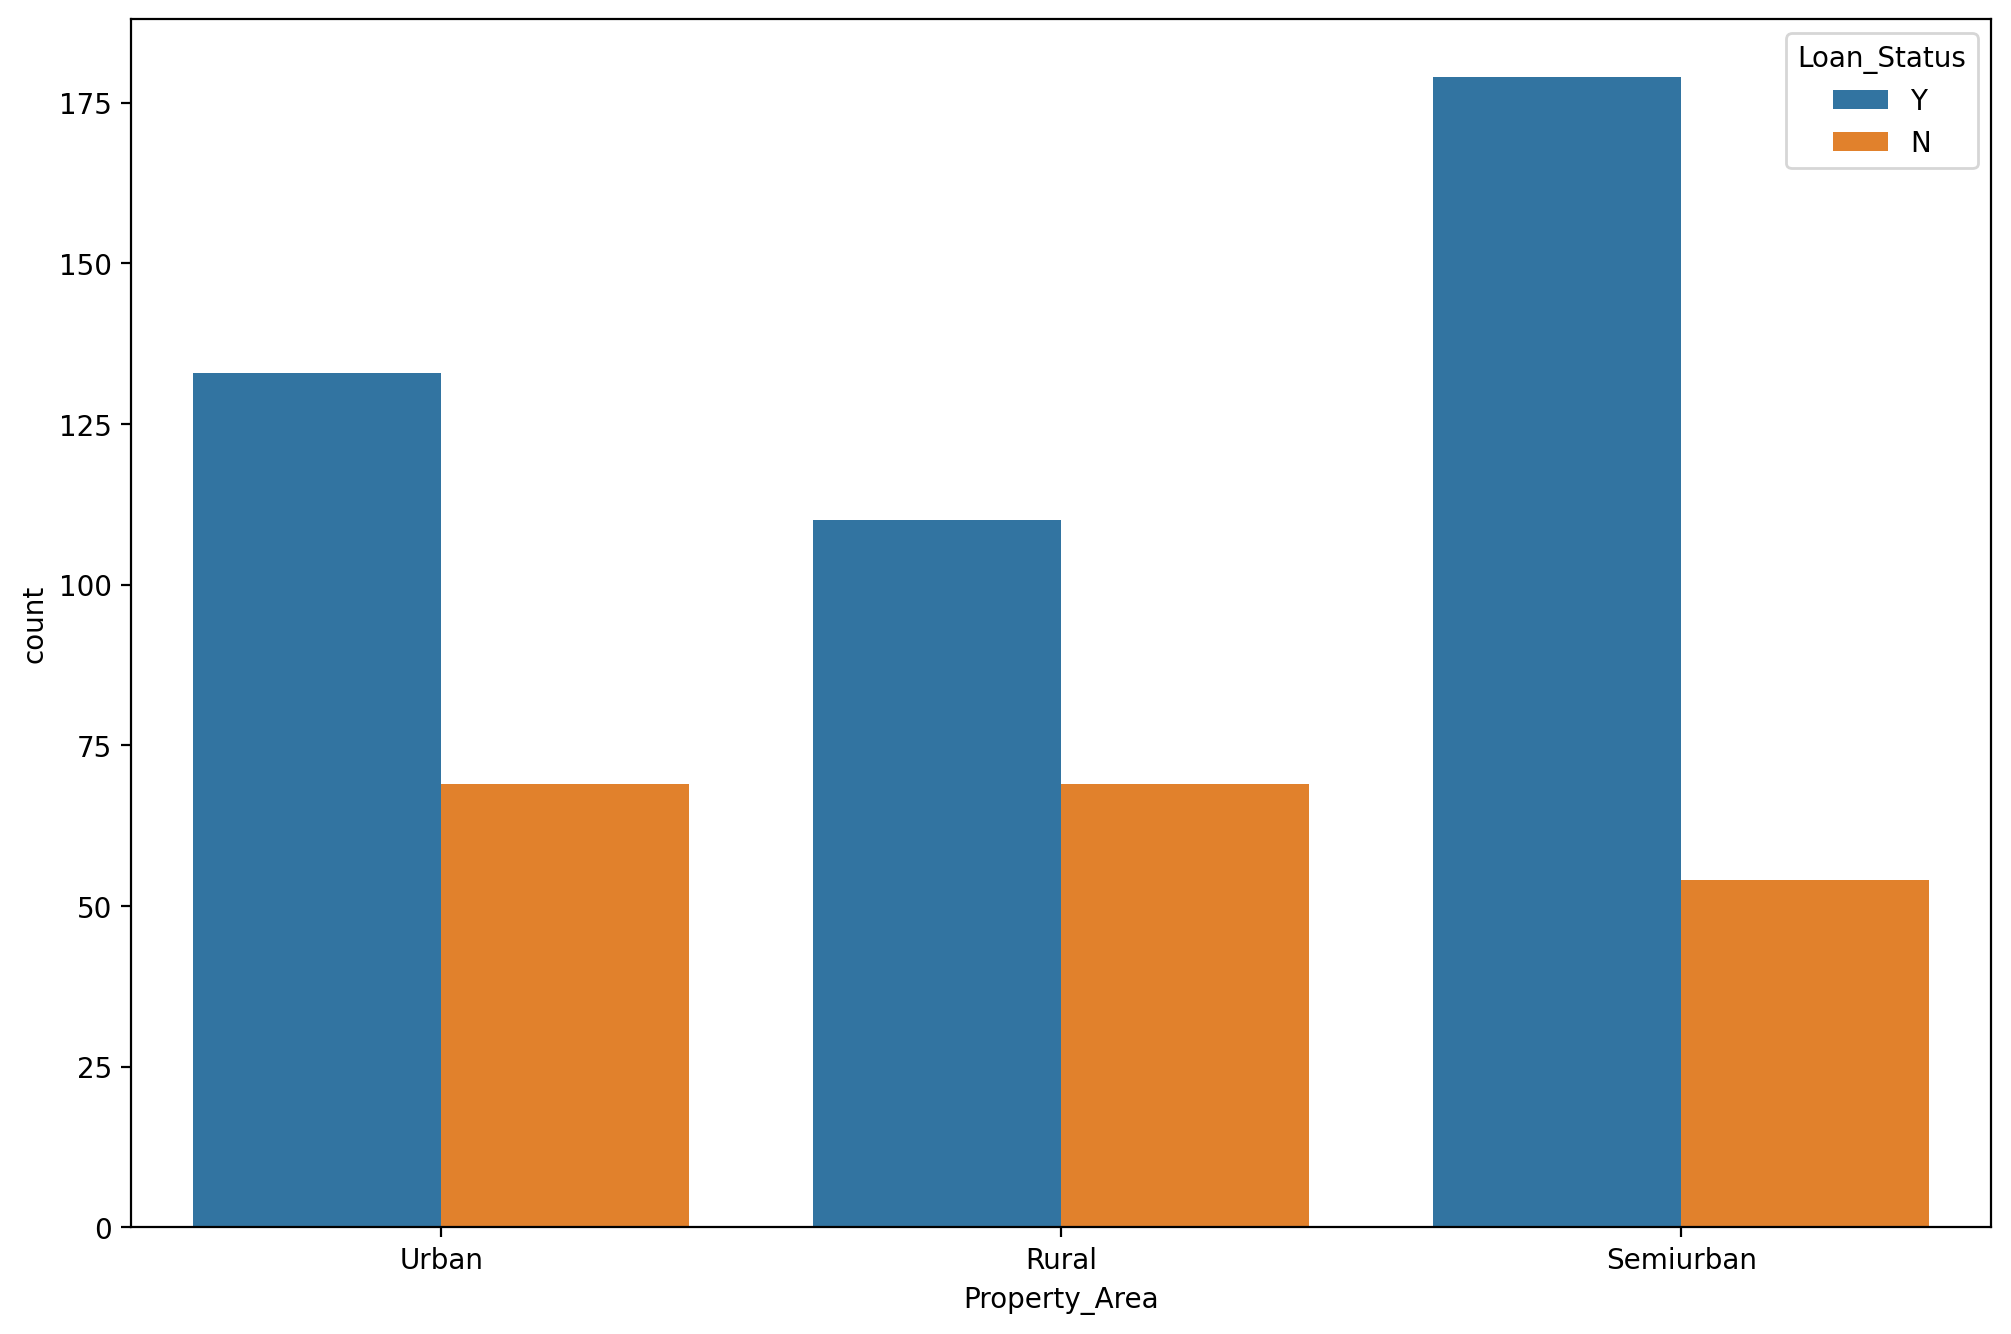

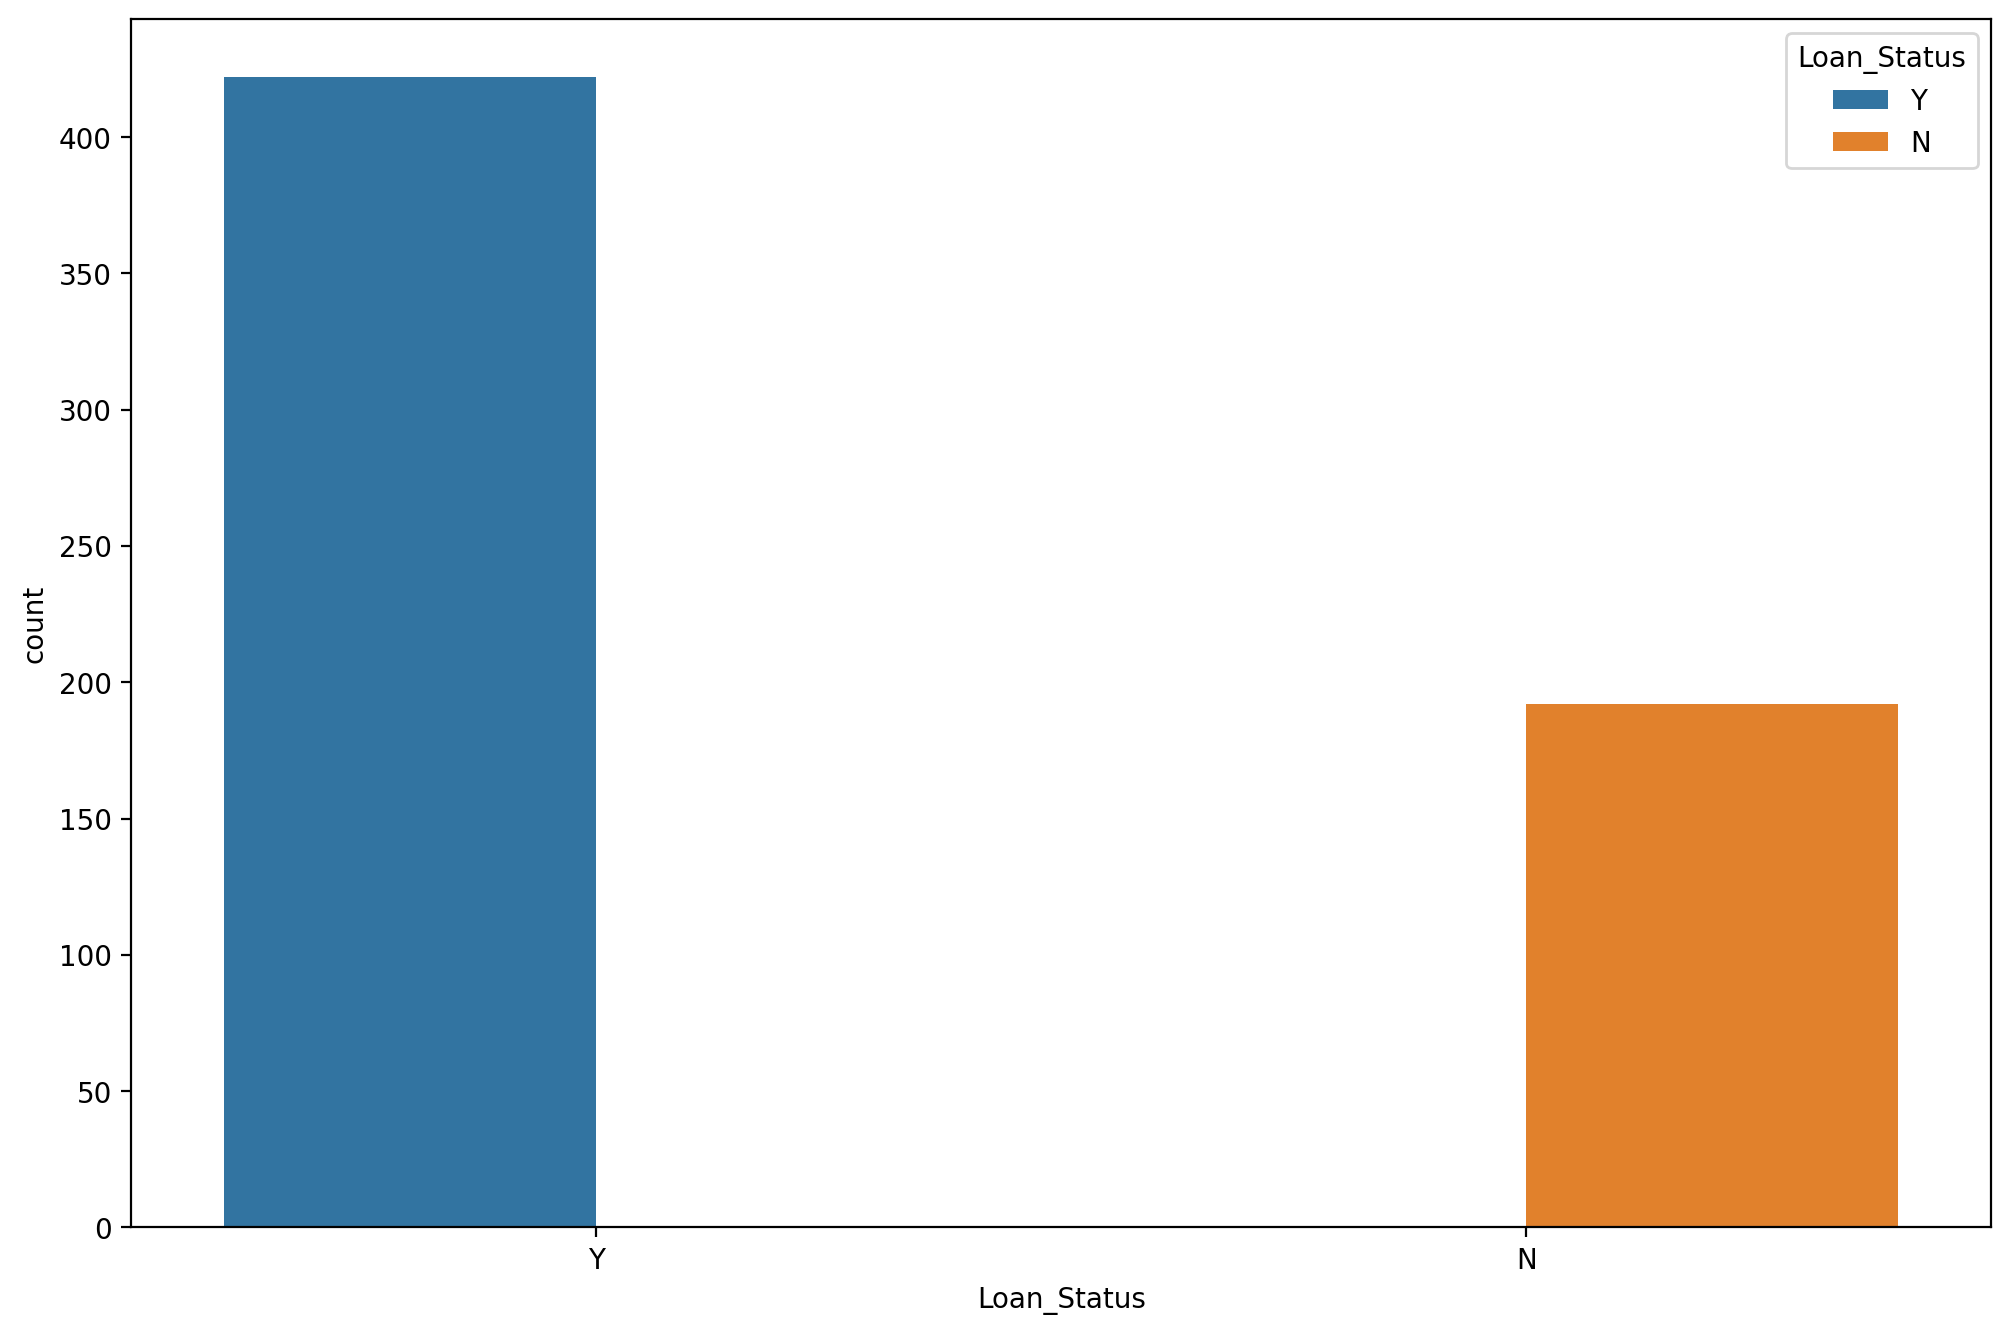

In [67]:
for p in cat_columns:
    plt.figure(figsize=(12,8),dpi=200)
    sns.countplot(data=df,x=p,hue='Loan_Status')

Loan Approval Status: About 2/3rd of applicants have been granted loan.
    
Sex: There are more Men than Women.
    
Martial Status: Majority of the population in the dataset is Married; Married applicants are more likely to be granted loans.
    
Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
    
Education: Majority of the population is Graduate and graduates have higher propotion of loan approval
    
Employment: Majority of population is not self employed.
    
Property Area: More applicants from Semi-urban and also likely to be granted loans.
    
Applicant with credit history=1 are far more likely to be accepted.

Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).
    

In [68]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

checked the skewness of the whole data.

In [69]:
skew_data=df.skew()
skew_data=skew_data.reset_index()
skew_data.rename(columns={'index':'column_names',0:'skewness'},inplace=True)
skew_data

,column_names,skewness
0,ApplicantIncome,6.539513
1,CoapplicantIncome,7.491531
2,LoanAmount,2.745407
3,Loan_Amount_Term,-2.402112
4,Credit_History,-2.021971


Assigned a variable skew_data to the skewness,reset the index for skew_data and renamed the columns for the skew_data.

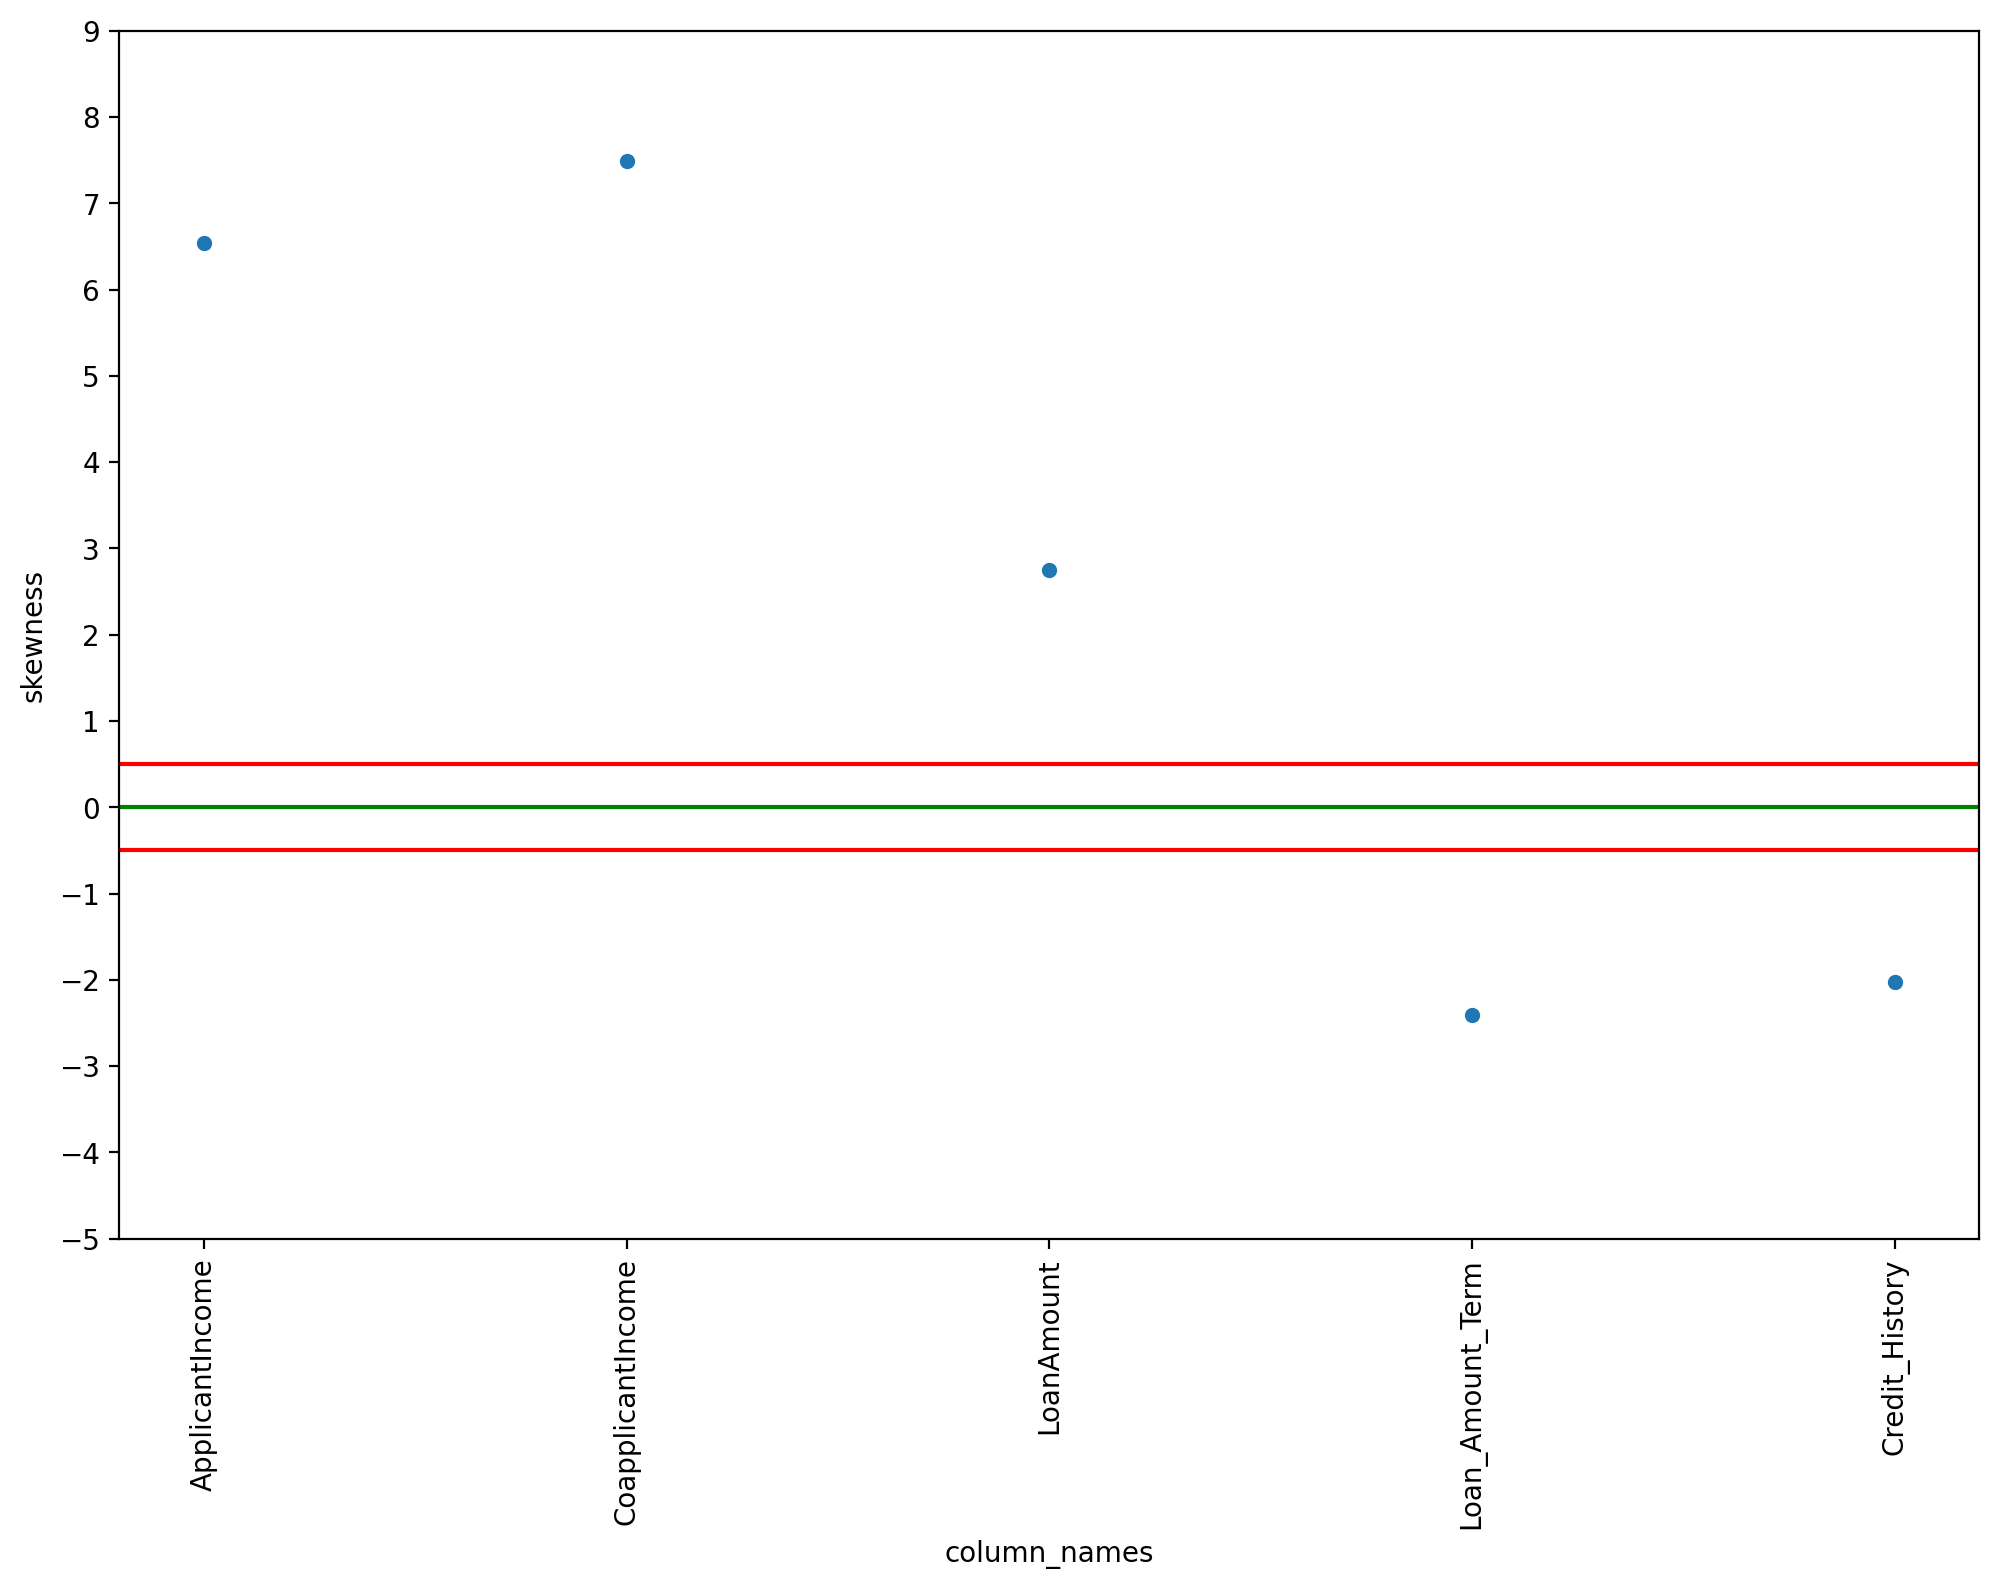

In [70]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=skew_data,x='column_names',y='skewness')
plt.xticks(rotation=90)
plt.yticks(np.arange(-5, 10, step=1))
plt.axhline(y = 0, color = 'g', linestyle = '-')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-');

plotted the skewness for the data.

SKEWNESS CHECK AND OBSERVATIONS:- PLOTTED SKEWNESS FOR ALL DATA DISTRIBUTIONS AGAINST COLUMNS OF THE DATA. PLOTTED GREEN HORIZONTAL LINE FOR A SKEWNESS OF ZERO(NORMAL DISTRIBUTION HAS ASKEWNESS OF 0). PLOTTED RED LINES AROUND THE GREEN LINE DENOTING A RANGE OF(-0.5,0.5). IF DATA POINTS FALL WITHIN THE ABOVE MENTIONED RANGE,THEN THEY ARE APPROXIMATELY NORMALLY DISTRIBUTED .

The rule for skewness seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed), the data are moderately skewed.

Skewness of the normal distribution is zero. All the dataset columns seem to have a skewness of more than 0.5 (except for the label) and even more than 1,so they all are highly skewed.They all have a right-skewed data or a positively-skewed data curve since the right tail is longer and mass of the distribution is concentrated on the left of the figure.

Applicant income,co-applicant income and loan amount are highly skewed.

loan-amount-term and credit history are categories.

Correlation coefficients are indicators of the strength of the linear relationship between two different variables, x and y. A linear correlation coefficient that is greater than zero indicates a positive relationship. A value that is less than zero signifies a negative relationship. Finally, a value of zero indicates no relationship between the two variables x and y.

<AxesSubplot:>

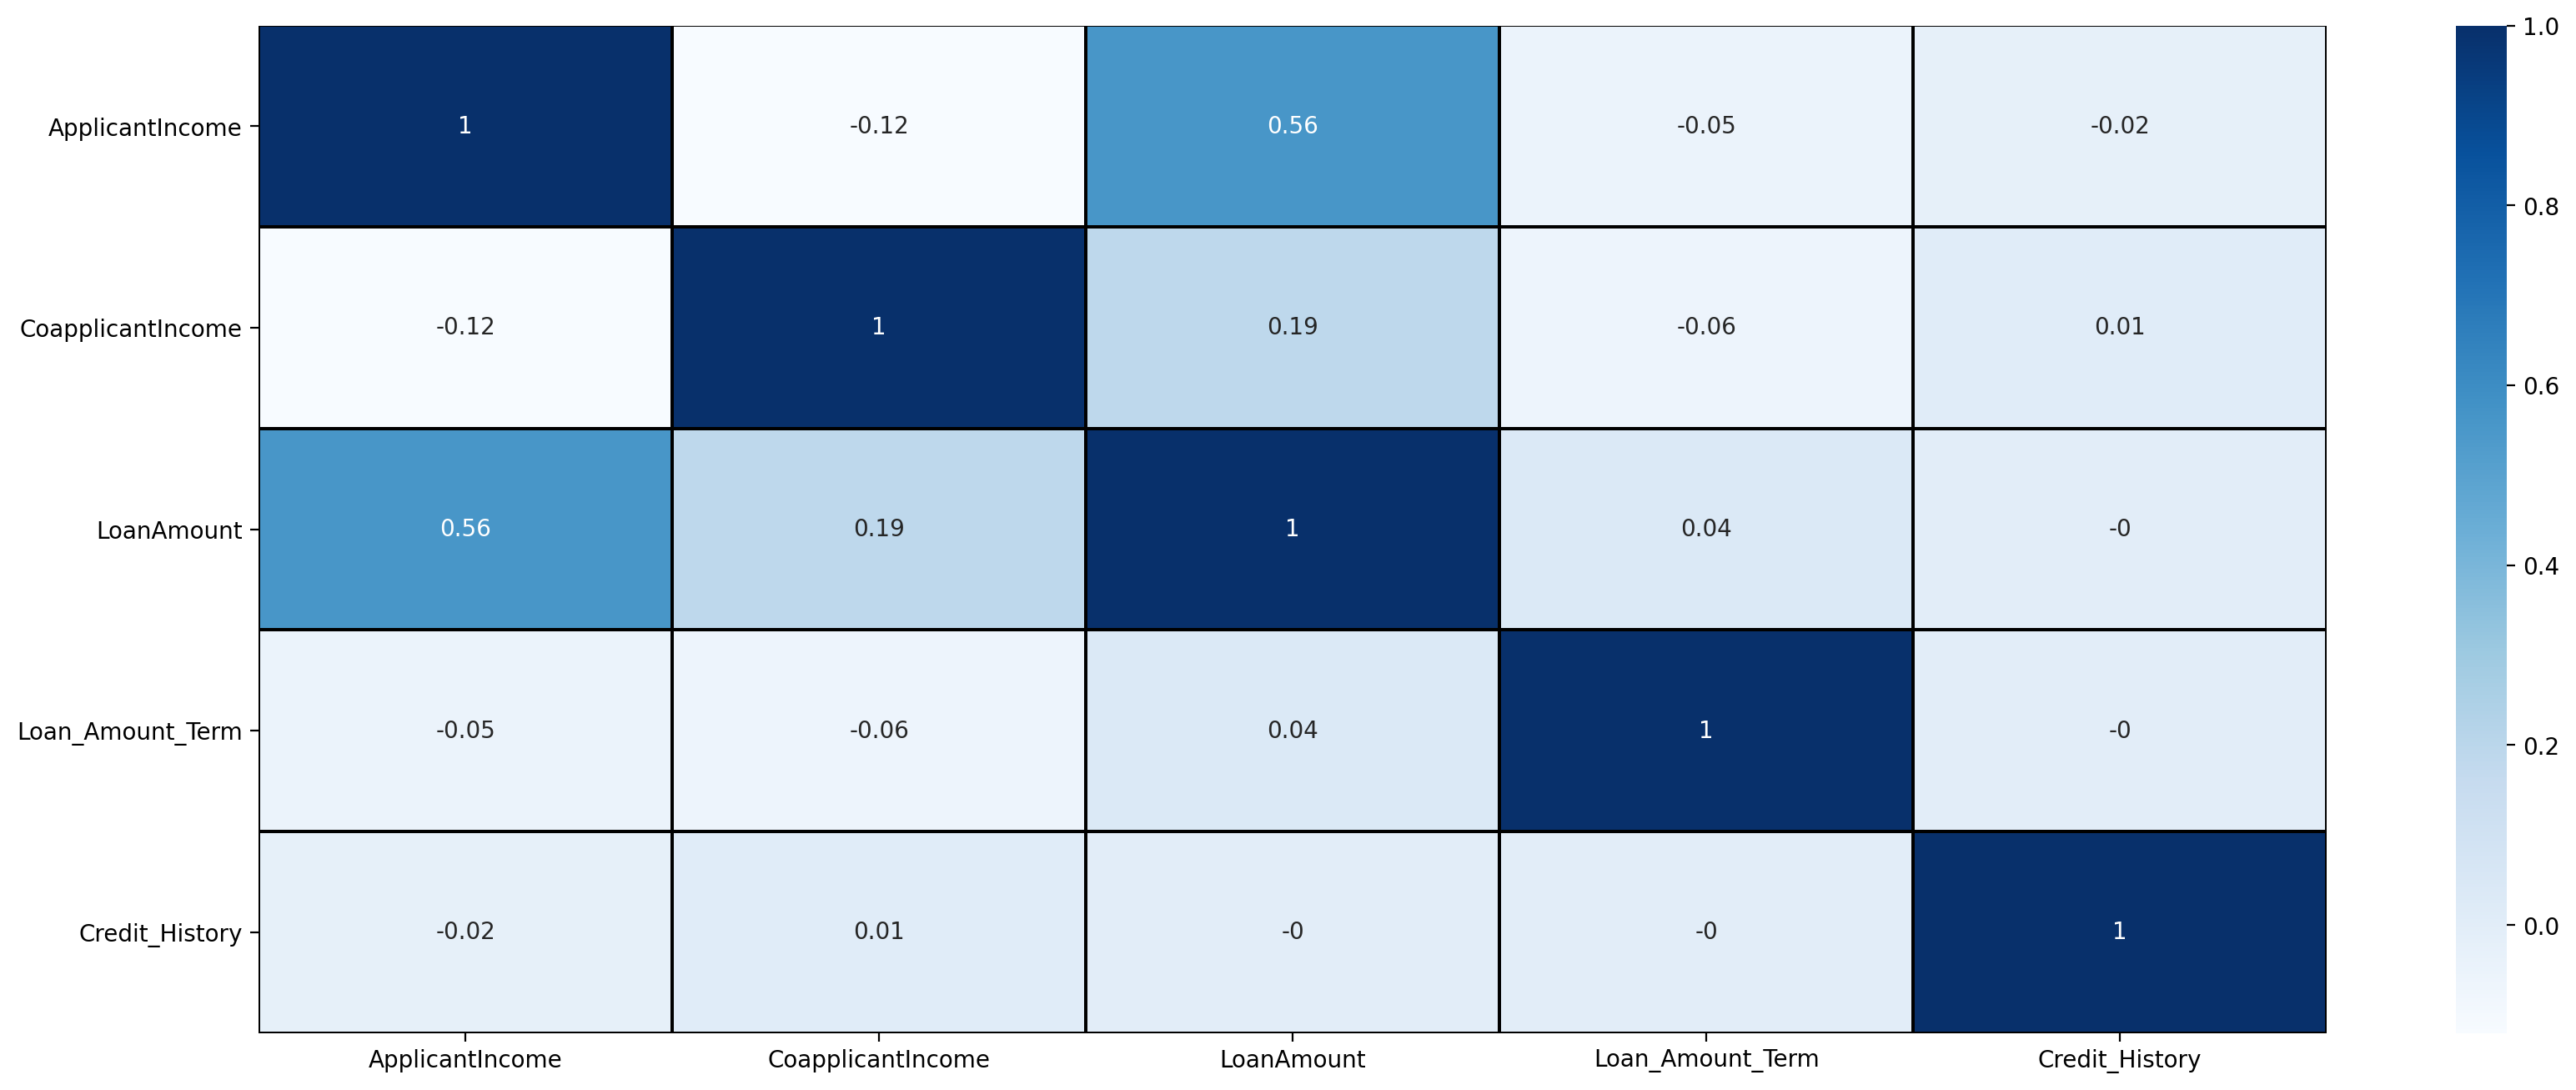

In [71]:
dfc=round(df.corr(),2)
plt.figure(figsize=(20,8),dpi=200)
sns.heatmap(dfc,cmap='Blues',linewidth=1,linecolor='black',annot=True)

correlation tells us the relationship between the numerical variables of the data.

<AxesSubplot:>

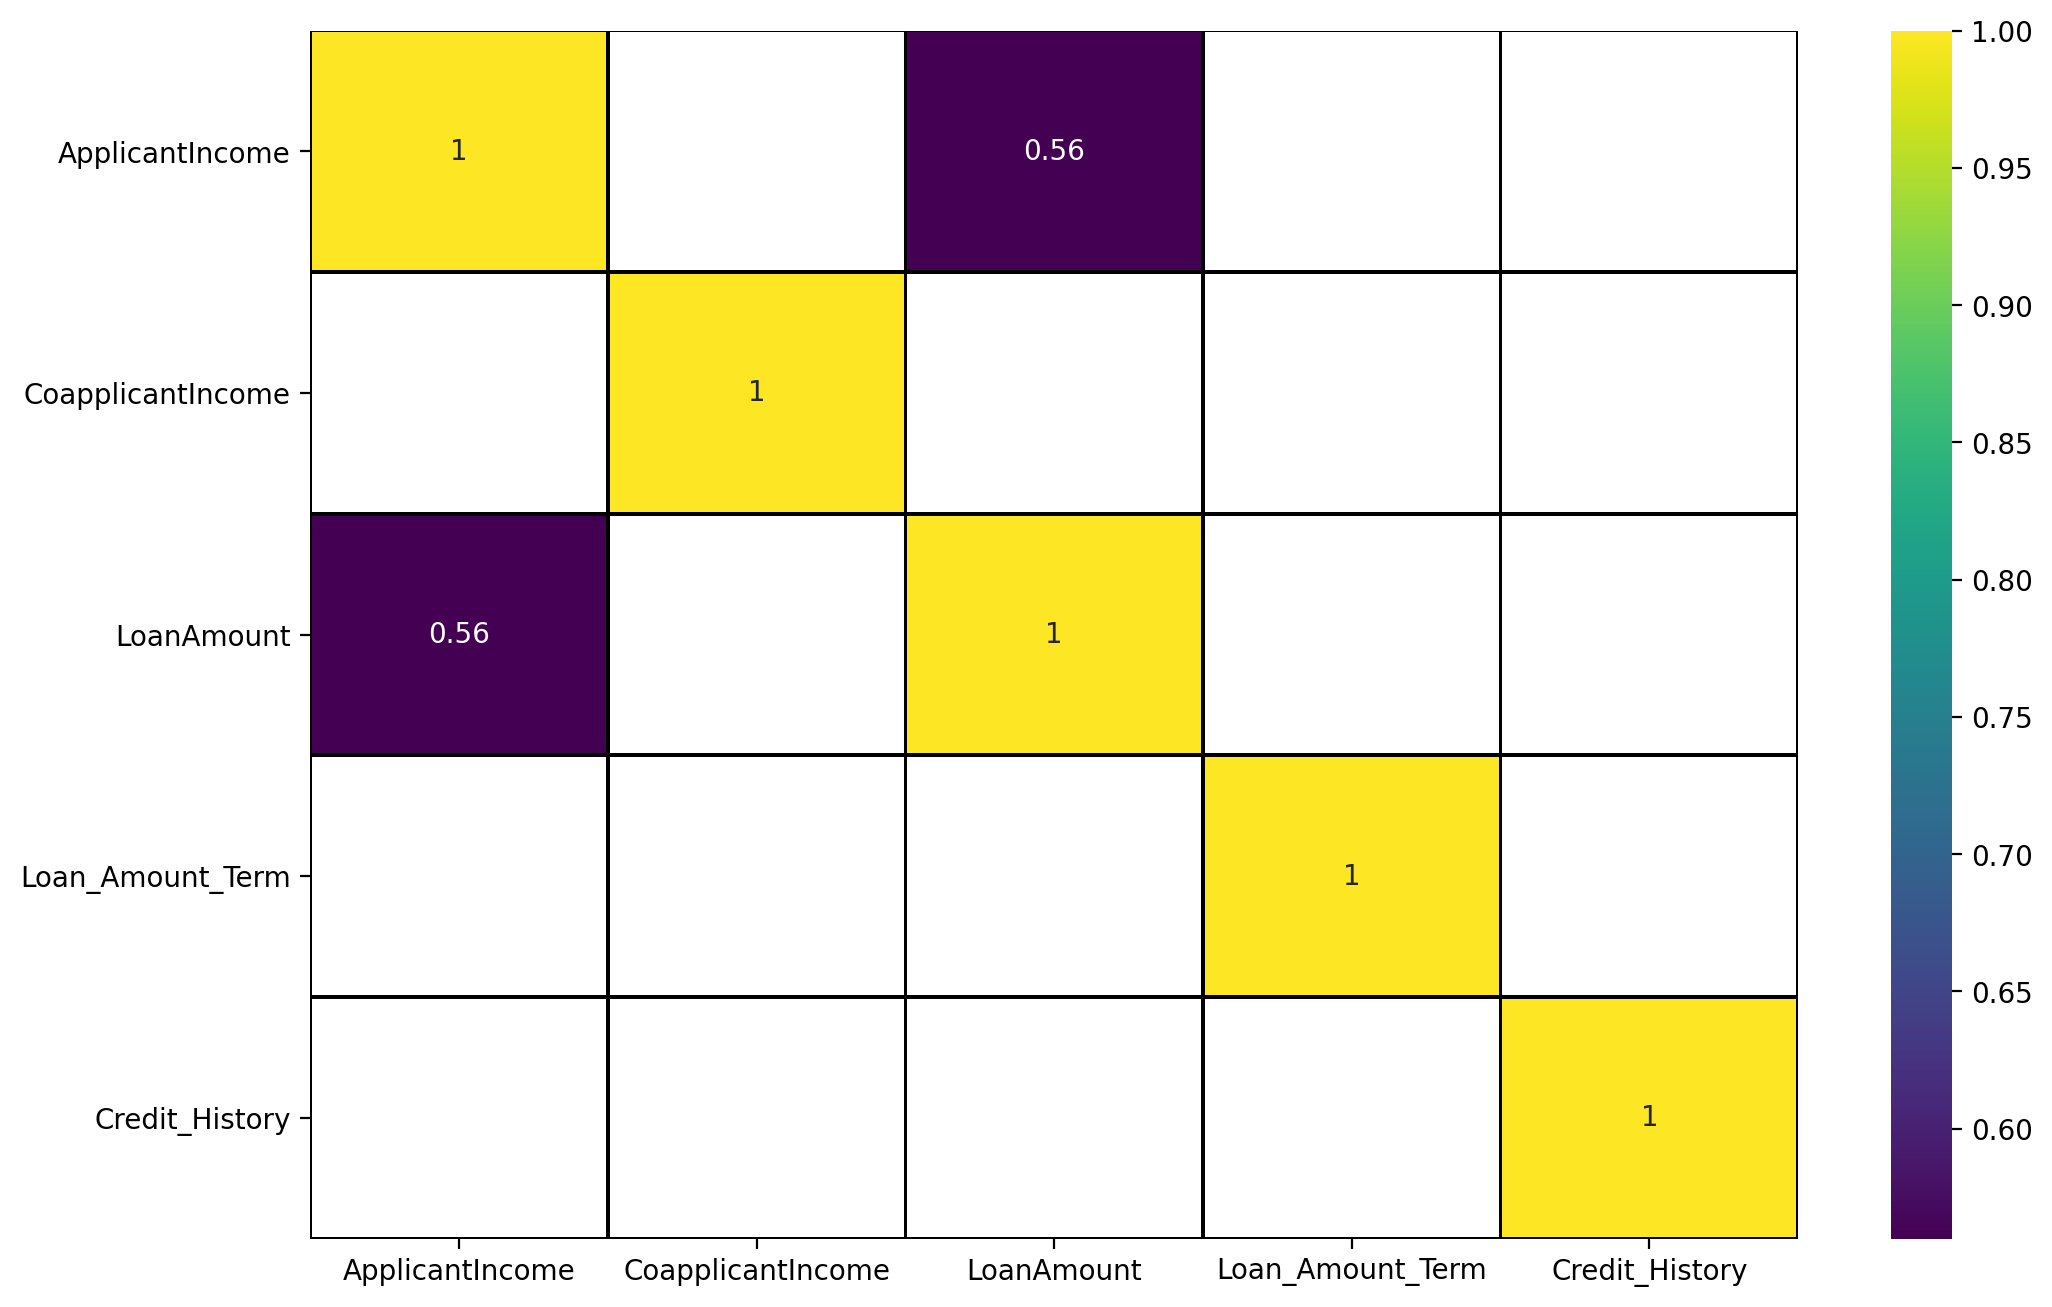

In [72]:
# columns having strong positive correlation is denoted as dfc_strong_positive.:--
dfc_strong_positive=dfc[(dfc>0.5)]
dfc_strong_positive

plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(dfc_strong_positive,cmap='viridis',annot=True,linecolor='black',linewidths=1)

there is strong positive relationship between Applicant income and Loan amount.

Positive correlation is a relationship between two variables in which both variables move in the same direction.

A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases.

<AxesSubplot:>

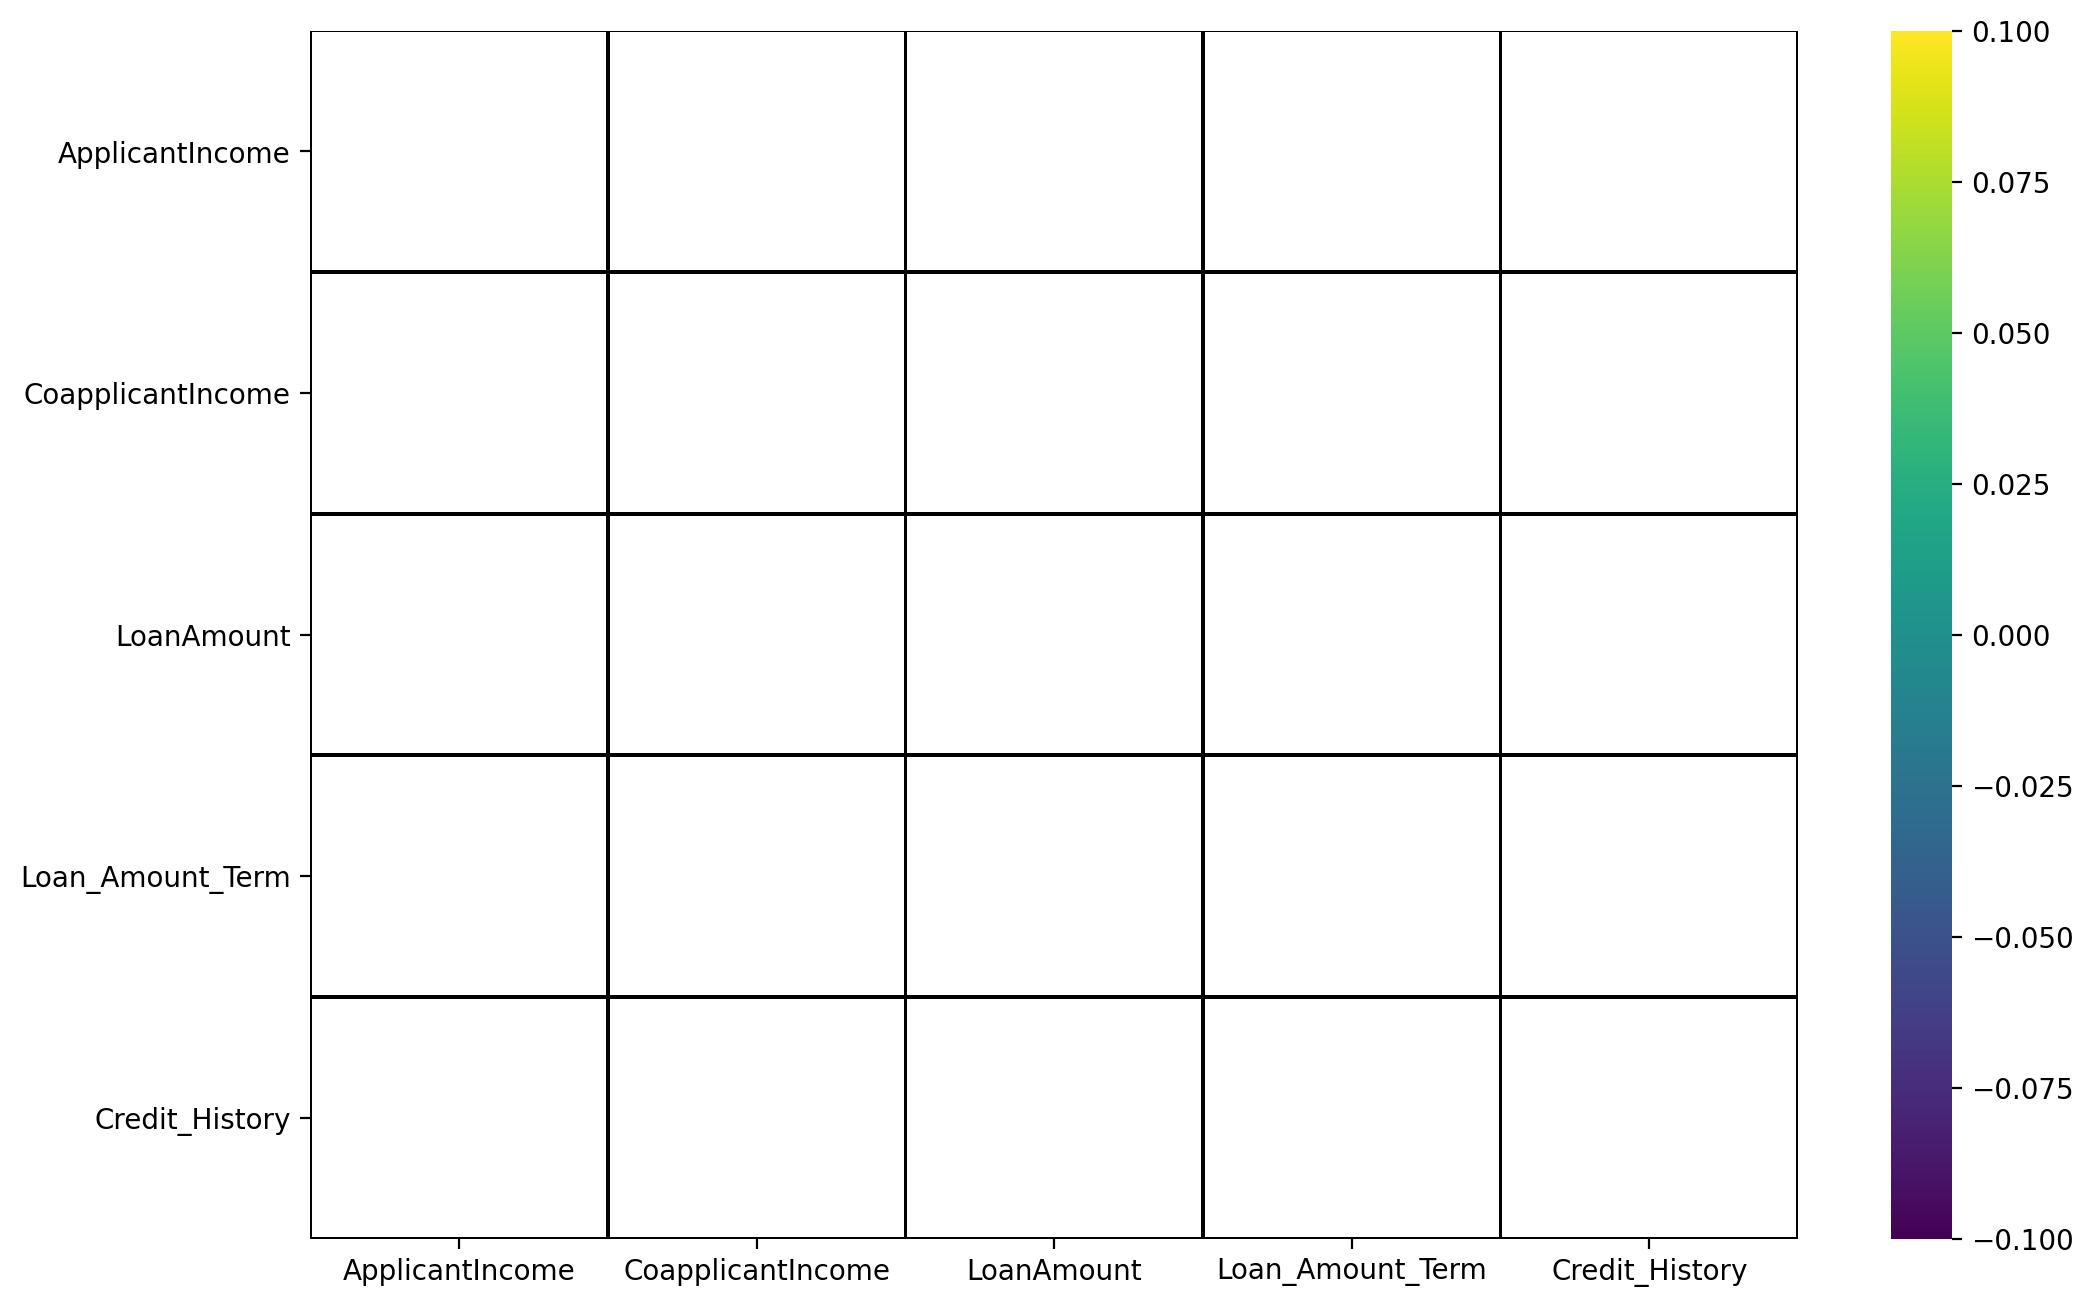

In [73]:
#columns having strong negative correlation is denoted as dfc_strong_negative.
dfc_strong_negative=dfc[(dfc<-0.5)]
dfc_strong_negative

plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(dfc_strong_negative,cmap='viridis',annot=True,linecolor='black',linewidths=1)

there is no strong negative relationship between any columns of the data.

Negative or inverse correlation describes when two variables tend to move in opposite size and direction from one another, such that when one increases the other variable decreases, and vice-versa.

## CORRELATION IS USED TO DETERMINE THE RELATIONSHIP BETWEEN THE NUMERICAL VARIABLES OF THE DATASET.¶

## CHI-SQUARE TEST IS USED TO DETERMINE THE RELATIONSHIP BETWEEN THE CATEGORICAL VARIABLES OF THE DATASET
The Chi-square test of independence tests if there is a significant relationship between two categorical variables. The test is comparing the observed observations to the expected observations.

The null and alternative hyphothesis needs to be assumed. The H0 (Null Hypothesis): There is no relationship between variable one and variable two.

The H1 (Alternative Hypothesis): There is a relationship between variable 1 and variable 2.

If the p-value is significant, you can reject the null hypothesis and claim that the findings support the alternative hypothesis.

In [74]:
from scipy.stats import chi2_contingency
def chi_square_results(x,y):
    nl='\n'
    crosstable=pd.crosstab(x,y,margins=True)
    chi2, p, dof, expected = chi2_contingency(crosstable)
    significant_value = 0.05
    print('chi2 value :',chi2)
    print('p-value :',p)
    print('Degrees of freedom :',dof)
    print('expected :',expected)
    #the significant value is 0.05
    print('significant_value :',significant_value)
    if p>significant_value:
        print('NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS')
    elif p<significant_value:
        print('ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS')
    else:
        pass
    results=[chi2,p,significant_value,dof]
    results_data=pd.DataFrame(list(zip(results)),index=['Chi2_value','P-value','significant_value',
                                                          'Degrees of freedom'],columns=['Analysis'])
    results_data
    results_data = results_data.transpose()
    results_data['Relationship between variables:YES or NO'] = np.where(results_data['P-value']> results_data['significant_value'], 0, 1)
    print(results_data)
    pd.DataFrame(results_data)
    return results_data

## FOR RELATIONSHIP STATUS:'YES', THE VALUE IS 1 AND FOR RELATIONSHIP STATUS: 'NO',THE VALUE IS 0.

In [75]:
categorical_columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

creating a list of only for all categorical columns given in the dataframe -->df.

In [76]:
chi_square_results(df['Gender'],df['Married'])

chi2 value : 81.60689999318386
p-value : 7.952413410423819e-17
Degrees of freedom : 4
expected : [[ 38.8534202  73.1465798 112.       ]
 [174.1465798 327.8534202 502.       ]
 [213.        401.        614.       ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value       P-value  significant_value  Degrees of freedom  \
Analysis     81.6069  7.952413e-17               0.05                 4.0   

          Relationship between variables:YES or NO  
Analysis                                         1  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,81.6069,7.952413e-17,0.05,4.0,1


THERE IS RELATIONSHIP.

In [77]:
chi_square_results(df['Gender'],df['Dependents'])

chi2 value : 19.49201865207906
p-value : 0.012438631475556416
Degrees of freedom : 8
expected : [[ 65.66775244  18.60586319  18.42345277   9.3029316  112.        ]
 [294.33224756  83.39413681  82.57654723  41.6970684  502.        ]
 [360.         102.         101.          51.         614.        ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis   19.492019  0.012439               0.05                 8.0   

          Relationship between variables:YES or NO  
Analysis                                         1  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,19.492019,0.012439,0.05,8.0,1


THERE IS RELATIONSHIP.

In [78]:
chi_square_results(df['Gender'],df['Education'])

chi2 value : 1.2635409676149714
p-value : 0.8675302720132361
Degrees of freedom : 4
expected : [[ 87.55700326  24.44299674 112.        ]
 [392.44299674 109.55700326 502.        ]
 [480.         134.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis    1.263541  0.86753               0.05                 4.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,1.263541,0.86753,0.05,4.0,0


NO RELATIONSHIP.

In [79]:
chi_square_results(df['Gender'],df['Self_Employed'])

chi2 value : 0.00016922629358910092
p-value : 0.9999999964205096
Degrees of freedom : 4
expected : [[ 97.04234528  14.95765472 112.        ]
 [434.95765472  67.04234528 502.        ]
 [532.          82.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis    0.000169      1.0               0.05                 4.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,0.000169,1.0,0.05,4.0,0


NO RELATIONSHIP.

In [80]:
chi_square_results(df['Gender'],df['Property_Area'])

chi2 value : 7.790370458599452
p-value : 0.25386715674807614
Degrees of freedom : 6
expected : [[ 32.6514658   42.50162866  36.84690554 112.        ]
 [146.3485342  190.49837134 165.15309446 502.        ]
 [179.         233.         202.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis     7.79037  0.253867               0.05                 6.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,7.79037,0.253867,0.05,6.0,0


NO RELATIONSHIP.

In [81]:
chi_square_results(df['Gender'],df['Loan_Status'])

chi2 value : 0.19864165509874285
p-value : 0.9953824259938442
Degrees of freedom : 4
expected : [[ 35.0228013  76.9771987 112.       ]
 [156.9771987 345.0228013 502.       ]
 [192.        422.        614.       ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    0.198642  0.995382               0.05                 4.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,0.198642,0.995382,0.05,4.0,0


THERE IS RELATIONSHIP.

In [82]:
chi_square_results(df['Married'],df['Dependents'])

chi2 value : 79.26872279943939
p-value : 6.860344085578134e-14
Degrees of freedom : 8
expected : [[124.88599349  35.38436482  35.03745928  17.69218241 213.        ]
 [235.11400651  66.61563518  65.96254072  33.30781759 401.        ]
 [360.         102.         101.          51.         614.        ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value       P-value  significant_value  Degrees of freedom  \
Analysis   79.268723  6.860344e-14               0.05                 8.0   

          Relationship between variables:YES or NO  
Analysis                                         1  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,79.268723,6.860344e-14,0.05,8.0,1


THERE IS RELATIONSHIP.

In [83]:
chi_square_results(df['Married'],df['Education'])

chi2 value : 0.09295827070960364
p-value : 0.9989527385626216
Degrees of freedom : 4
expected : [[166.51465798  46.48534202 213.        ]
 [313.48534202  87.51465798 401.        ]
 [480.         134.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    0.092958  0.998953               0.05                 4.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,0.092958,0.998953,0.05,4.0,0


NO RELATIONSHIP.

In [84]:
chi_square_results(df['Married'],df['Self_Employed'])

chi2 value : 0.012371433814075516
p-value : 0.9999809471653549
Degrees of freedom : 4
expected : [[184.55374593  28.44625407 213.        ]
 [347.44625407  53.55374593 401.        ]
 [532.          82.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    0.012371  0.999981               0.05                 4.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,0.012371,0.999981,0.05,4.0,0


NO RELATIONSHIP.

In [85]:
chi_square_results(df['Married'],df['Property_Area'])

chi2 value : 0.03328791783110609
p-value : 0.9999992410736565
Degrees of freedom : 6
expected : [[ 62.09609121  80.82899023  70.07491857 213.        ]
 [116.90390879 152.17100977 131.92508143 401.        ]
 [179.         233.         202.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    0.033288  0.999999               0.05                 6.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,0.033288,0.999999,0.05,6.0,0


NO RELATIONSHIP.

In [86]:
chi_square_results(df['Married'],df['Loan_Status'])

chi2 value : 5.1380701449230175
p-value : 0.27342175083638093
Degrees of freedom : 4
expected : [[ 66.60586319 146.39413681 213.        ]
 [125.39413681 275.60586319 401.        ]
 [192.         422.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis     5.13807  0.273422               0.05                 4.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,5.13807,0.273422,0.05,4.0,0


NO RELATIONSHIP.

In [87]:
chi_square_results(df['Dependents'],df['Education'])

chi2 value : 2.3742533538545545
p-value : 0.9673369383182105
Degrees of freedom : 8
expected : [[281.43322476  78.56677524 360.        ]
 [ 79.73941368  22.26058632 102.        ]
 [ 78.95765472  22.04234528 101.        ]
 [ 39.86970684  11.13029316  51.        ]
 [480.         134.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    2.374253  0.967337               0.05                 8.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,2.374253,0.967337,0.05,8.0,0


NO RELATIONSHIP.

In [88]:
chi_square_results(df['Dependents'],df['Self_Employed'])

chi2 value : 5.970425619694362
p-value : 0.6505447972500269
Degrees of freedom : 8
expected : [[311.9218241   48.0781759  360.        ]
 [ 88.37785016  13.62214984 102.        ]
 [ 87.51140065  13.48859935 101.        ]
 [ 44.18892508   6.81107492  51.        ]
 [532.          82.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    5.970426  0.650545               0.05                 8.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,5.970426,0.650545,0.05,8.0,0


NO RELATIONSHIP.

In [89]:
chi_square_results(df['Dependents'],df['Property_Area'])

chi2 value : 6.541003402383584
p-value : 0.8863980002512505
Degrees of freedom : 12
expected : [[104.95114007 136.61237785 118.43648208 360.        ]
 [ 29.73615635  38.70684039  33.55700326 102.        ]
 [ 29.44462541  38.32736156  33.22801303 101.        ]
 [ 14.86807818  19.3534202   16.77850163  51.        ]
 [179.         233.         202.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    6.541003  0.886398               0.05                12.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,6.541003,0.886398,0.05,12.0,0


NO RELATIONSHIP.

In [90]:
chi_square_results(df['Dependents'],df['Loan_Status'])

chi2 value : 3.151399001232423
p-value : 0.9245000626763191
Degrees of freedom : 8
expected : [[112.5732899  247.4267101  360.        ]
 [ 31.89576547  70.10423453 102.        ]
 [ 31.58306189  69.41693811 101.        ]
 [ 15.94788274  35.05211726  51.        ]
 [192.         422.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis    3.151399   0.9245               0.05                 8.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,3.151399,0.9245,0.05,8.0,0


NO RELATIONSHIP.

In [91]:
chi_square_results(df['Education'],df['Self_Employed'])

chi2 value : 0.06619454932836269
p-value : 0.9994642217686042
Degrees of freedom : 4
expected : [[415.89576547  64.10423453 480.        ]
 [116.10423453  17.89576547 134.        ]
 [532.          82.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    0.066195  0.999464               0.05                 4.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,0.066195,0.999464,0.05,4.0,0


NO RELATIONSHIP.

In [92]:
chi_square_results(df['Education'],df['Property_Area'])

chi2 value : 3.689929523749311
p-value : 0.7185525870716589
Degrees of freedom : 6
expected : [[139.93485342 182.14983713 157.91530945 480.        ]
 [ 39.06514658  50.85016287  44.08469055 134.        ]
 [179.         233.         202.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis     3.68993  0.718553               0.05                 6.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,3.68993,0.718553,0.05,6.0,0


NO RELATIONSHIP.

In [93]:
chi_square_results(df['Education'],df['Loan_Status'])

chi2 value : 4.5288927351787684
p-value : 0.3391352834234793
Degrees of freedom : 4
expected : [[150.09771987 329.90228013 480.        ]
 [ 41.90228013  92.09771987 134.        ]
 [192.         422.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    4.528893  0.339135               0.05                 4.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,4.528893,0.339135,0.05,4.0,0


NO RELATIONSHIP.

In [94]:
chi_square_results(df['Self_Employed'],df['Property_Area'])

chi2 value : 0.6198965832559709
p-value : 0.9960594609565282
Degrees of freedom : 6
expected : [[155.09446254 201.88273616 175.0228013  532.        ]
 [ 23.90553746  31.11726384  26.9771987   82.        ]
 [179.         233.         202.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    0.619897  0.996059               0.05                 6.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,0.619897,0.996059,0.05,6.0,0


NO RELATIONSHIP.

In [95]:
chi_square_results(df['Self_Employed'],df['Loan_Status'])

chi2 value : 0.008407648919431859
p-value : 0.9999911886544866
Degrees of freedom : 4
expected : [[166.35830619 365.64169381 532.        ]
 [ 25.64169381  56.35830619  82.        ]
 [192.         422.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis    0.008408  0.999991               0.05                 4.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,0.008408,0.999991,0.05,4.0,0


NO RELATIONSHIP.

In [96]:
chi_square_results(df['Property_Area'],df['Loan_Status'])

chi2 value : 12.297623130485677
p-value : 0.055649170558480544
Degrees of freedom : 6
expected : [[ 55.97394137 123.02605863 179.        ]
 [ 72.85993485 160.14006515 233.        ]
 [ 63.16612378 138.83387622 202.        ]
 [192.         422.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis   12.297623  0.055649               0.05                 6.0   

          Relationship between variables:YES or NO  
Analysis                                         0  


,Chi2_value,P-value,significant_value,Degrees of freedom,Relationship between variables:YES or NO
Analysis,12.297623,0.055649,0.05,6.0,0


NO RELATIONSHIP.

In [97]:
arr = np.arange(49).reshape(7,7)
for i in range(len(categorical_columns)):
    for j in range(len(categorical_columns)):
        arr[i][j] = chi_square_results(df[categorical_columns[i]],df[categorical_columns[j]])['Relationship between variables:YES or NO'][0]
        

chi_square_matrix = pd.DataFrame(data = arr,index = categorical_columns, columns = categorical_columns)

chi2 value : 614.0000000000001
p-value : 1.4459216888673154e-131
Degrees of freedom : 4
expected : [[ 20.42996743  91.57003257 112.        ]
 [ 91.57003257 410.42996743 502.        ]
 [112.         502.         614.        ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value        P-value  significant_value  Degrees of freedom  \
Analysis       614.0  1.445922e-131               0.05                 4.0   

          Relationship between variables:YES or NO  
Analysis                                         1  
chi2 value : 81.60689999318386
p-value : 7.952413410423819e-17
Degrees of freedom : 4
expected : [[ 38.8534202  73.1465798 112.       ]
 [174.1465798 327.8534202 502.       ]
 [213.        401.        614.       ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value       P-value  signif

chi2 value : 79.2687227994394
p-value : 6.86034408557811e-14
Degrees of freedom : 8
expected : [[124.88599349 235.11400651 360.        ]
 [ 35.38436482  66.61563518 102.        ]
 [ 35.03745928  65.96254072 101.        ]
 [ 17.69218241  33.30781759  51.        ]
 [213.         401.         614.        ]]
significant_value : 0.05
ALTERNATIVE HYPOTHESIS IS TRUE MEANING THAT THERE IS RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value       P-value  significant_value  Degrees of freedom  \
Analysis   79.268723  6.860344e-14               0.05                 8.0   

          Relationship between variables:YES or NO  
Analysis                                         1  
chi2 value : 1842.0
p-value : 0.0
Degrees of freedom : 16
expected : [[211.07491857  59.80456026  59.21824104  29.90228013 360.        ]
 [ 59.80456026  16.94462541  16.77850163   8.4723127  102.        ]
 [ 59.21824104  16.77850163  16.61400651   8.38925081 101.        ]
 [ 29.90228013   8.4723127    8.3

chi2 value : 0.00016922629358910092
p-value : 0.9999999964205096
Degrees of freedom : 4
expected : [[ 97.04234528 434.95765472 532.        ]
 [ 14.95765472  67.04234528  82.        ]
 [112.         502.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value  P-value  significant_value  Degrees of freedom  \
Analysis    0.000169      1.0               0.05                 4.0   

          Relationship between variables:YES or NO  
Analysis                                         0  
chi2 value : 0.012371433814075516
p-value : 0.9999809471653549
Degrees of freedom : 4
expected : [[184.55374593 347.44625407 532.        ]
 [ 28.44625407  53.55374593  82.        ]
 [213.         401.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  

chi2 value : 12.297623130485677
p-value : 0.055649170558480544
Degrees of freedom : 6
expected : [[ 55.97394137 123.02605863 179.        ]
 [ 72.85993485 160.14006515 233.        ]
 [ 63.16612378 138.83387622 202.        ]
 [192.         422.         614.        ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_value   P-value  significant_value  Degrees of freedom  \
Analysis   12.297623  0.055649               0.05                 6.0   

          Relationship between variables:YES or NO  
Analysis                                         0  
chi2 value : 0.19864165509874285
p-value : 0.9953824259938442
Degrees of freedom : 4
expected : [[ 35.0228013 156.9771987 192.       ]
 [ 76.9771987 345.0228013 422.       ]
 [112.        502.        614.       ]]
significant_value : 0.05
NULL HYPOTHESIS IS TRUE MEANING THAT THERE IS  NO RELATIONSHIP BETWEEN THE TWO CATEGORICAL COLUMNS
          Chi2_valu

Making a Matrix of chi-square results.

<AxesSubplot:>

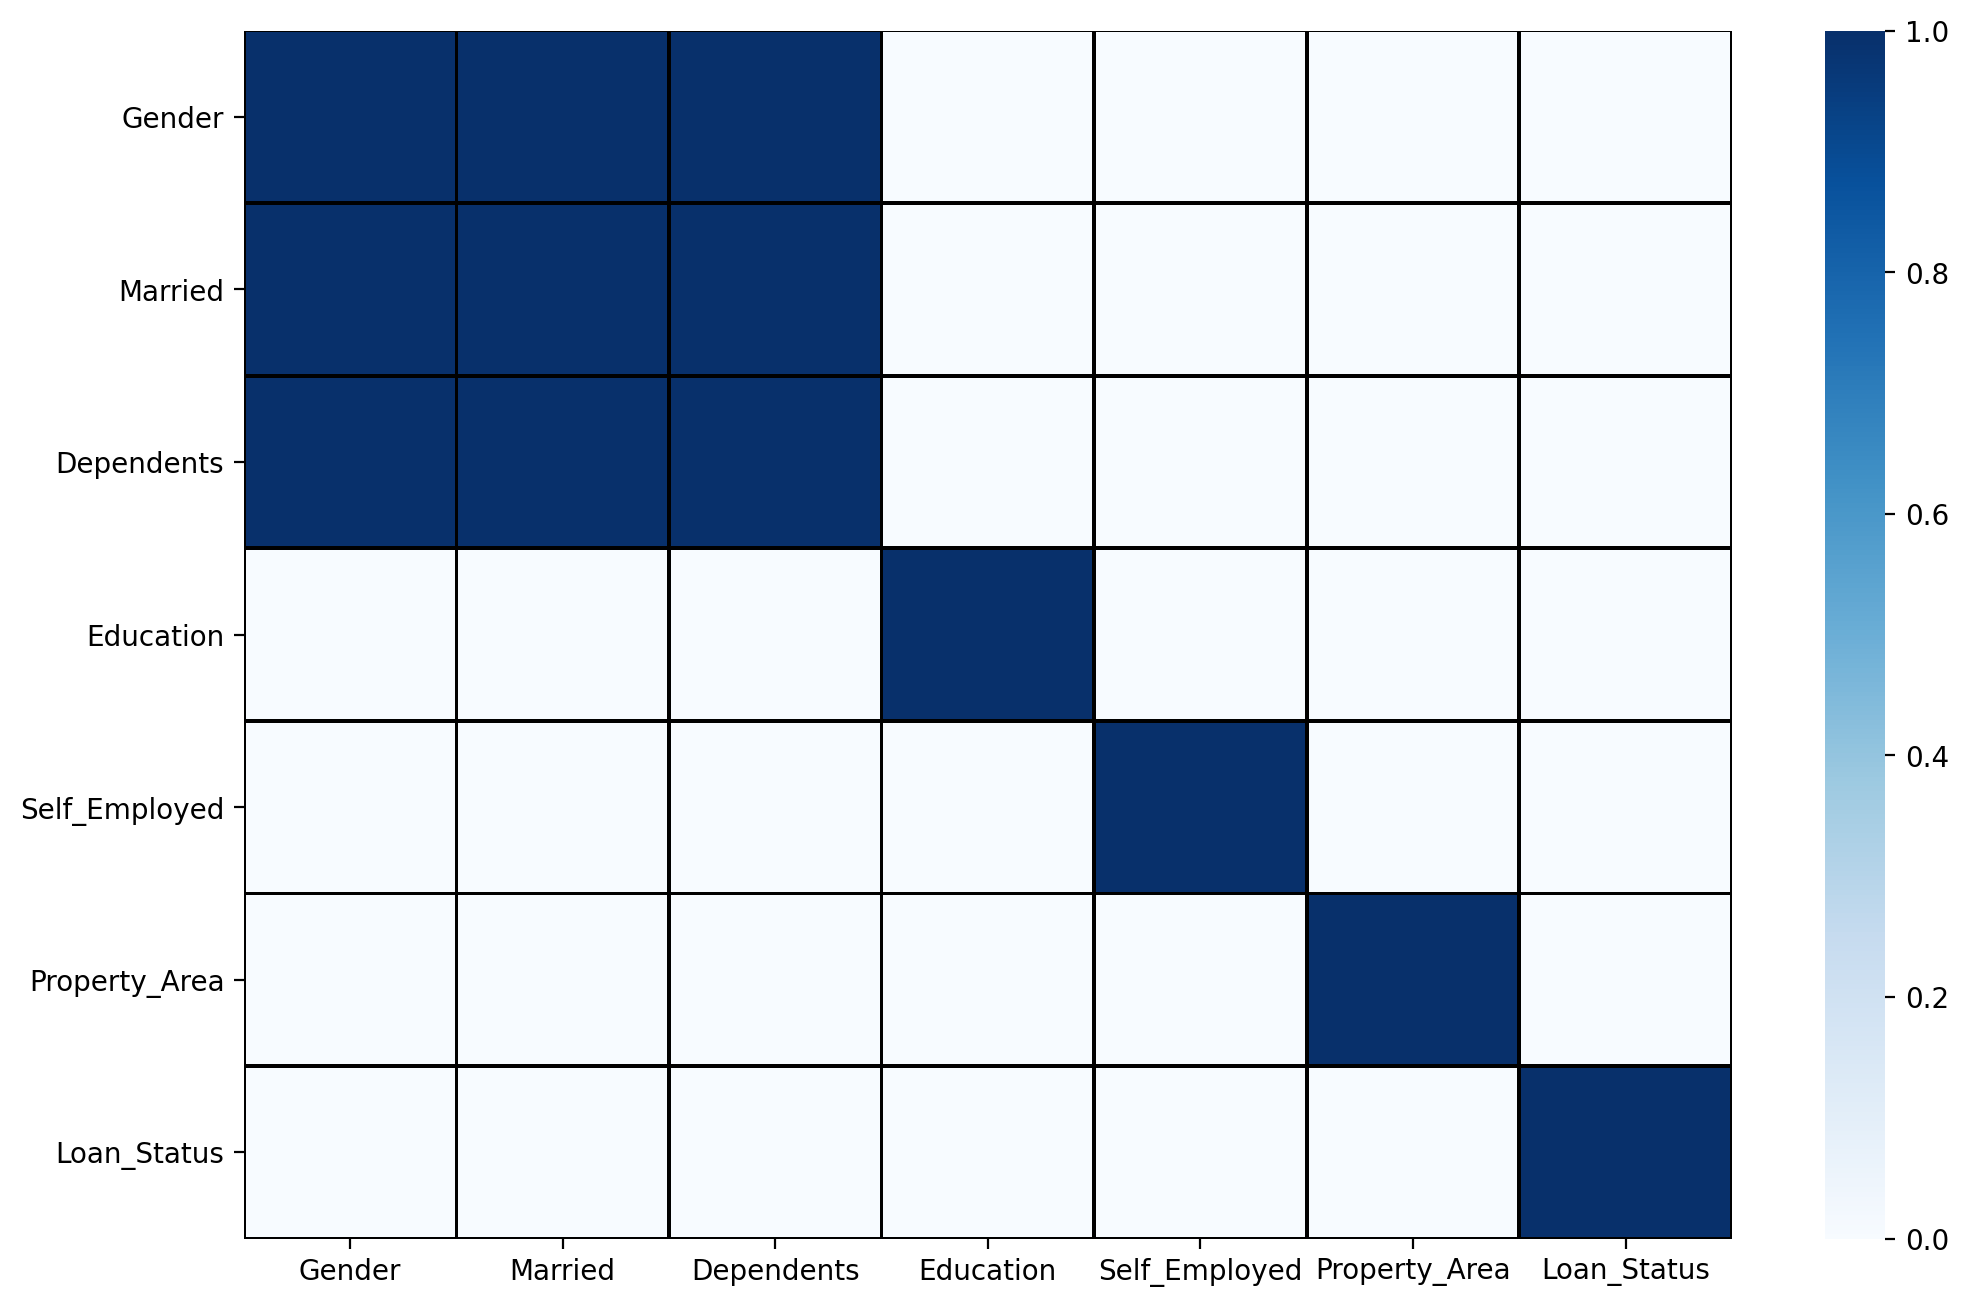

In [98]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(chi_square_matrix,linecolor='black',linewidths=1,cmap='Blues')

## As shown in the above heatmap figure,the 'blue' colour shows the relationship status to be 'yes'or (1),whereas the 'white' colour shows the relationship status to be 'no'or (0) between the variables of the dataset.

## ENCODING:--

In [99]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


displaying the dataframe--> df.

In [101]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


In [102]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


displaying the dataframe--> df after encoding.

## OUTLIERS DETECTION AND REMOVAL:-

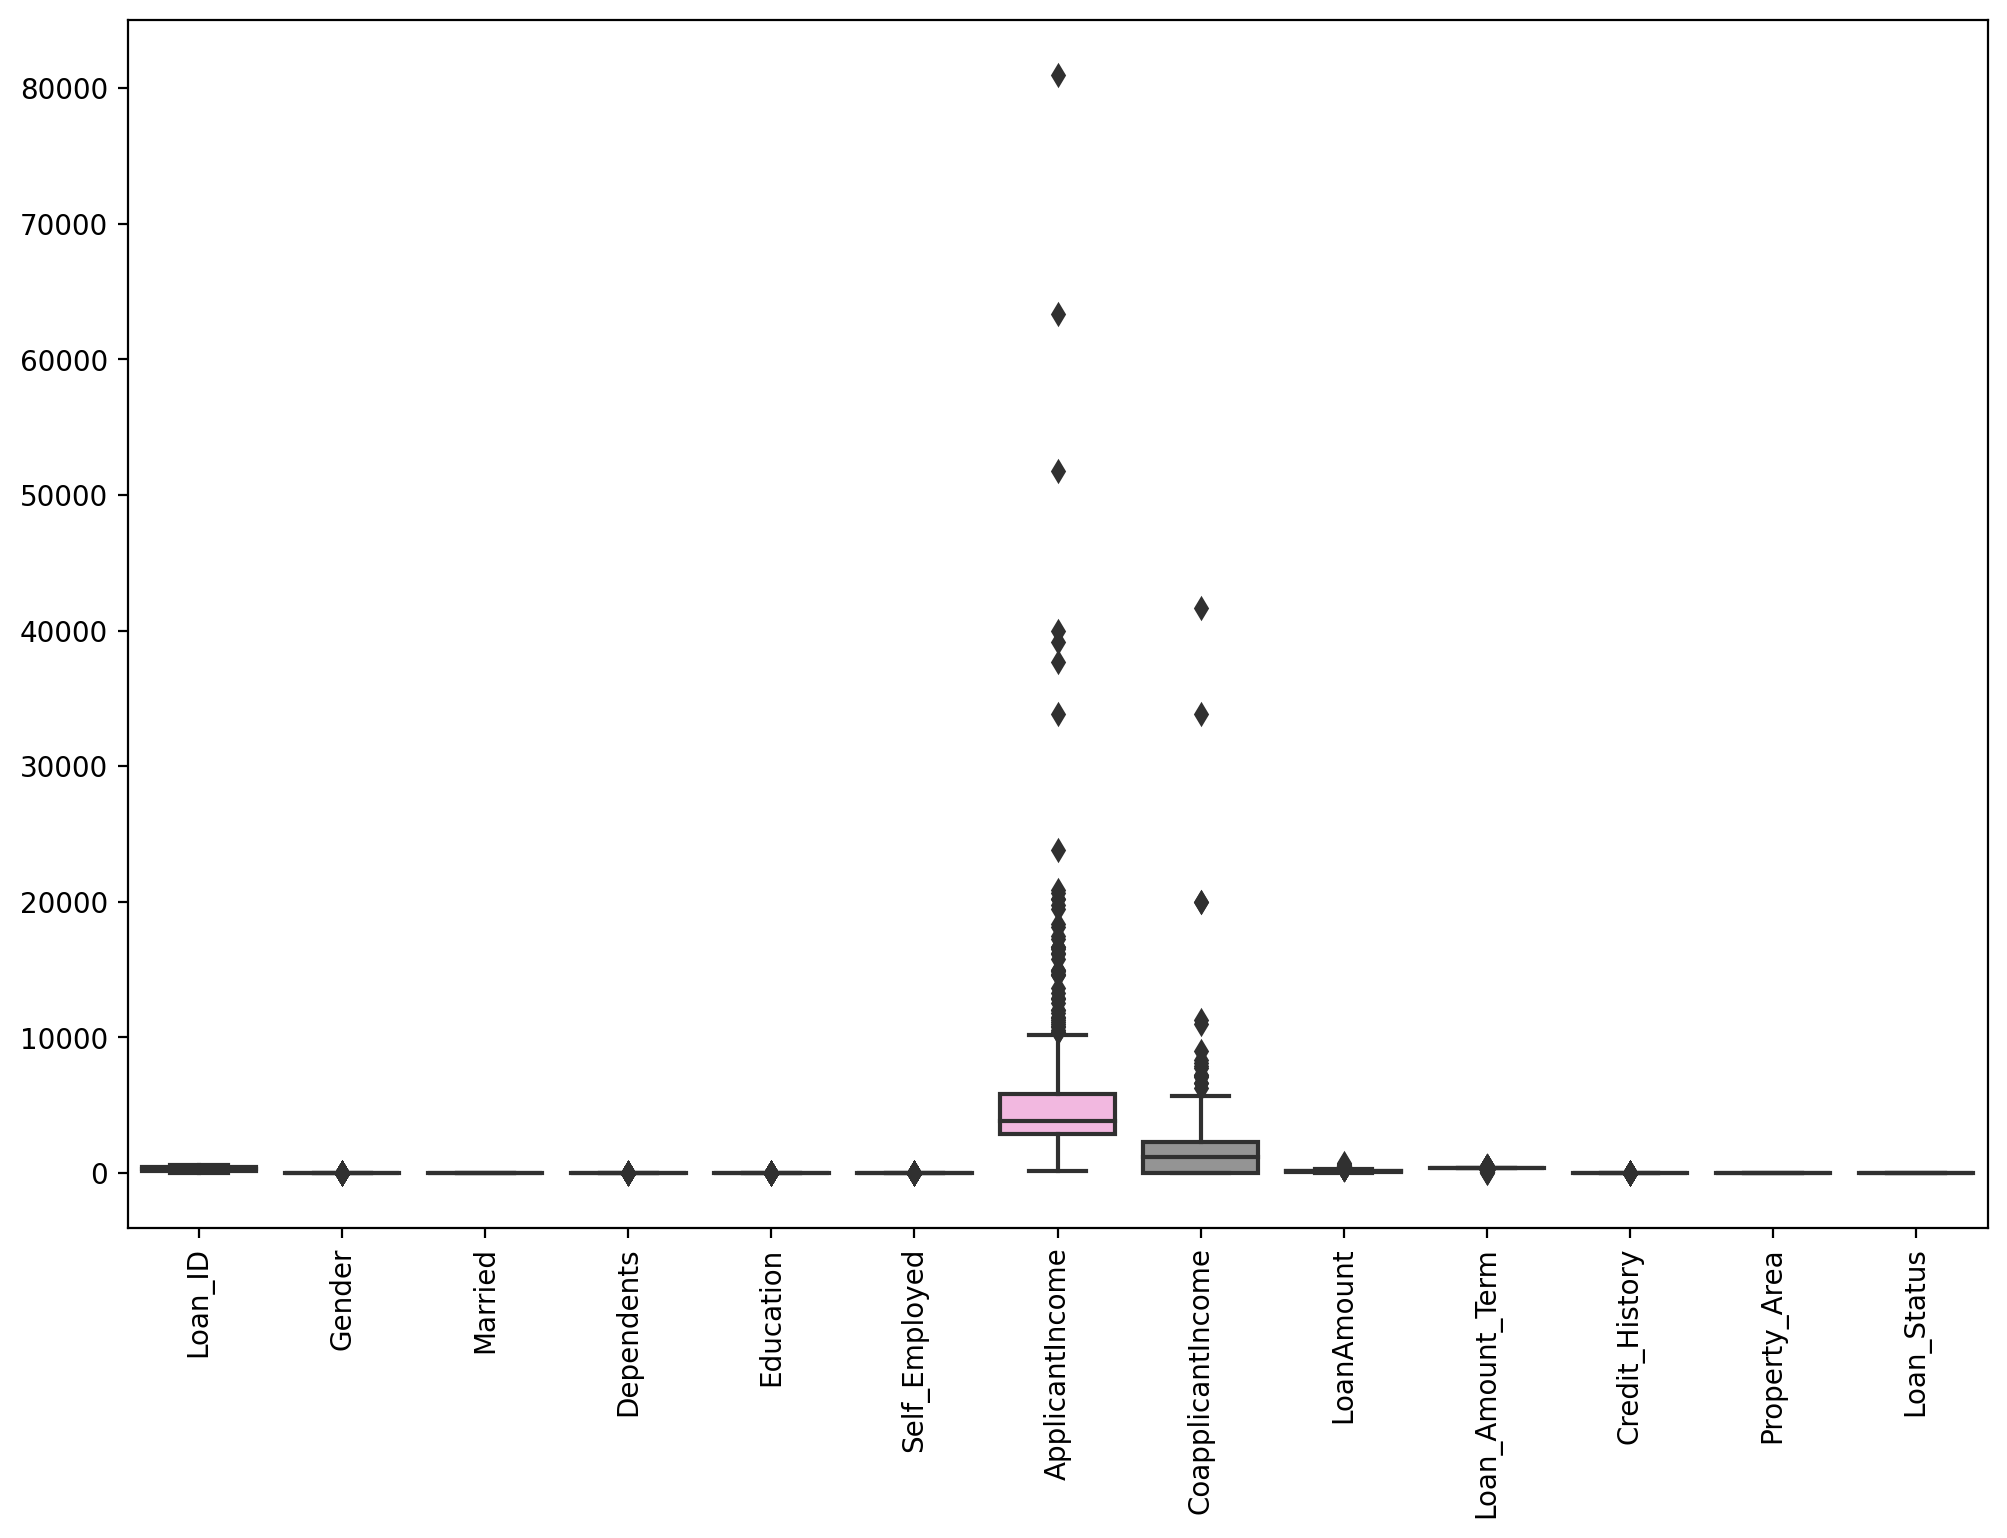

In [103]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(data=df,palette='colorblind')
plt.xticks(rotation=90);

There are many outliers present in the dataset shown by boxplot denoted by 'black diamonds'.

In [104]:
#Outliers Removal:-ZSCORE METHOD
from scipy.stats import zscore
threshold=3
z=np.abs(zscore(df))
dfn=df[(z<3).all(axis=1)]
print(dfn.shape)
print(df.shape)

(577, 13)
(614, 13)


In [105]:
577/614*100

93.97394136807817

with zscore method,I lost around 7% of the data.

In [106]:
X=np.array(df)
from sklearn.covariance import EllipticEnvelope
elpenv = EllipticEnvelope(contamination=0.04, 
                          random_state=1)

# Returns 1 of inliers, -1 for outliers
pred = elpenv.fit_predict(X)

# Extract outliers
outlier_index = np.where(pred==-1)
outlier_values = X[outlier_index]

changing df into numpy array for elliptic envelope curve method of removing outiers.

In [107]:
outlier_index_list=list(outlier_index[0])

I made a list of all outliers' index.

In [108]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


displaying df

In [109]:
df_n = df.copy()

made a copy of df and named it -->df_n.

In [110]:
df.drop(index=outlier_index_list,inplace=True)

dropped the rows having outliers' indexes.

In [111]:
df_n

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


viewing df_n

In [112]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


viewing df after removing outliers.

In [113]:
columns_list_ = df.columns
columns_list_

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

assigned columns of df to a variable 'columns_list_'.

In [114]:
outliers = pd.DataFrame(outlier_values,columns=columns_list_)
outliers['Loan_Status'].sum()

16.0

made a dataframe of outliers and checking my method of removing outliers was correct or not

In [115]:
print(df_n['Loan_Status'].sum())
print(df['Loan_Status'].sum() + outliers['Loan_Status'].sum())
print(df['Loan_Status'].sum())
print((589/614)*100)

422
422.0
406
95.92833876221498


After removing the outliers,the 'df' is the the dataframe ready to be prepared for further machine learning process. Around 5% of the data has been removed because they have been declared outliers.

In [116]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


viewing df.

In [117]:
df_new = df

made of copy of df and named it df_new

In [118]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


viewing df

In [119]:
df_new = df_new.reset_index(drop=True)
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
585,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
586,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
587,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


reset the index for df_new.

## SKEWNESS REMOVAL:-

In [120]:
df_new.skew()

Loan_ID              0.009554
Gender              -1.655480
Married             -0.631755
Dependents           1.035556
Education            1.314930
Self_Employed        2.264787
ApplicantIncome      2.107216
CoapplicantIncome    1.367538
LoanAmount           1.942958
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Property_Area       -0.057164
Loan_Status         -0.820209
dtype: float64

displaying skewness for the df_new dataframe.

In [121]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

displaying a list of categorical columns of the dataframe df_new.

In [122]:
numerical_columns1 = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
numerical_columns1

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

displaying a list of numerical columns of the dataframe df_new.

In [123]:
skew_new =df_new.skew()
skew_new = skew_new.reset_index()
skew_new.rename(columns={'index':'column_names',0:'skewness'},inplace= True)
skew_new

,column_names,skewness
0,Loan_ID,0.009554
1,Gender,-1.655480
2,Married,-0.631755
3,Dependents,1.035556
4,Education,1.314930
5,Self_Employed,2.264787
6,ApplicantIncome,2.107216
7,CoapplicantIncome,1.367538
8,LoanAmount,1.942958
9,Loan_Amount_Term,-2.446026


creating a new dataframe showing skewness of the data.

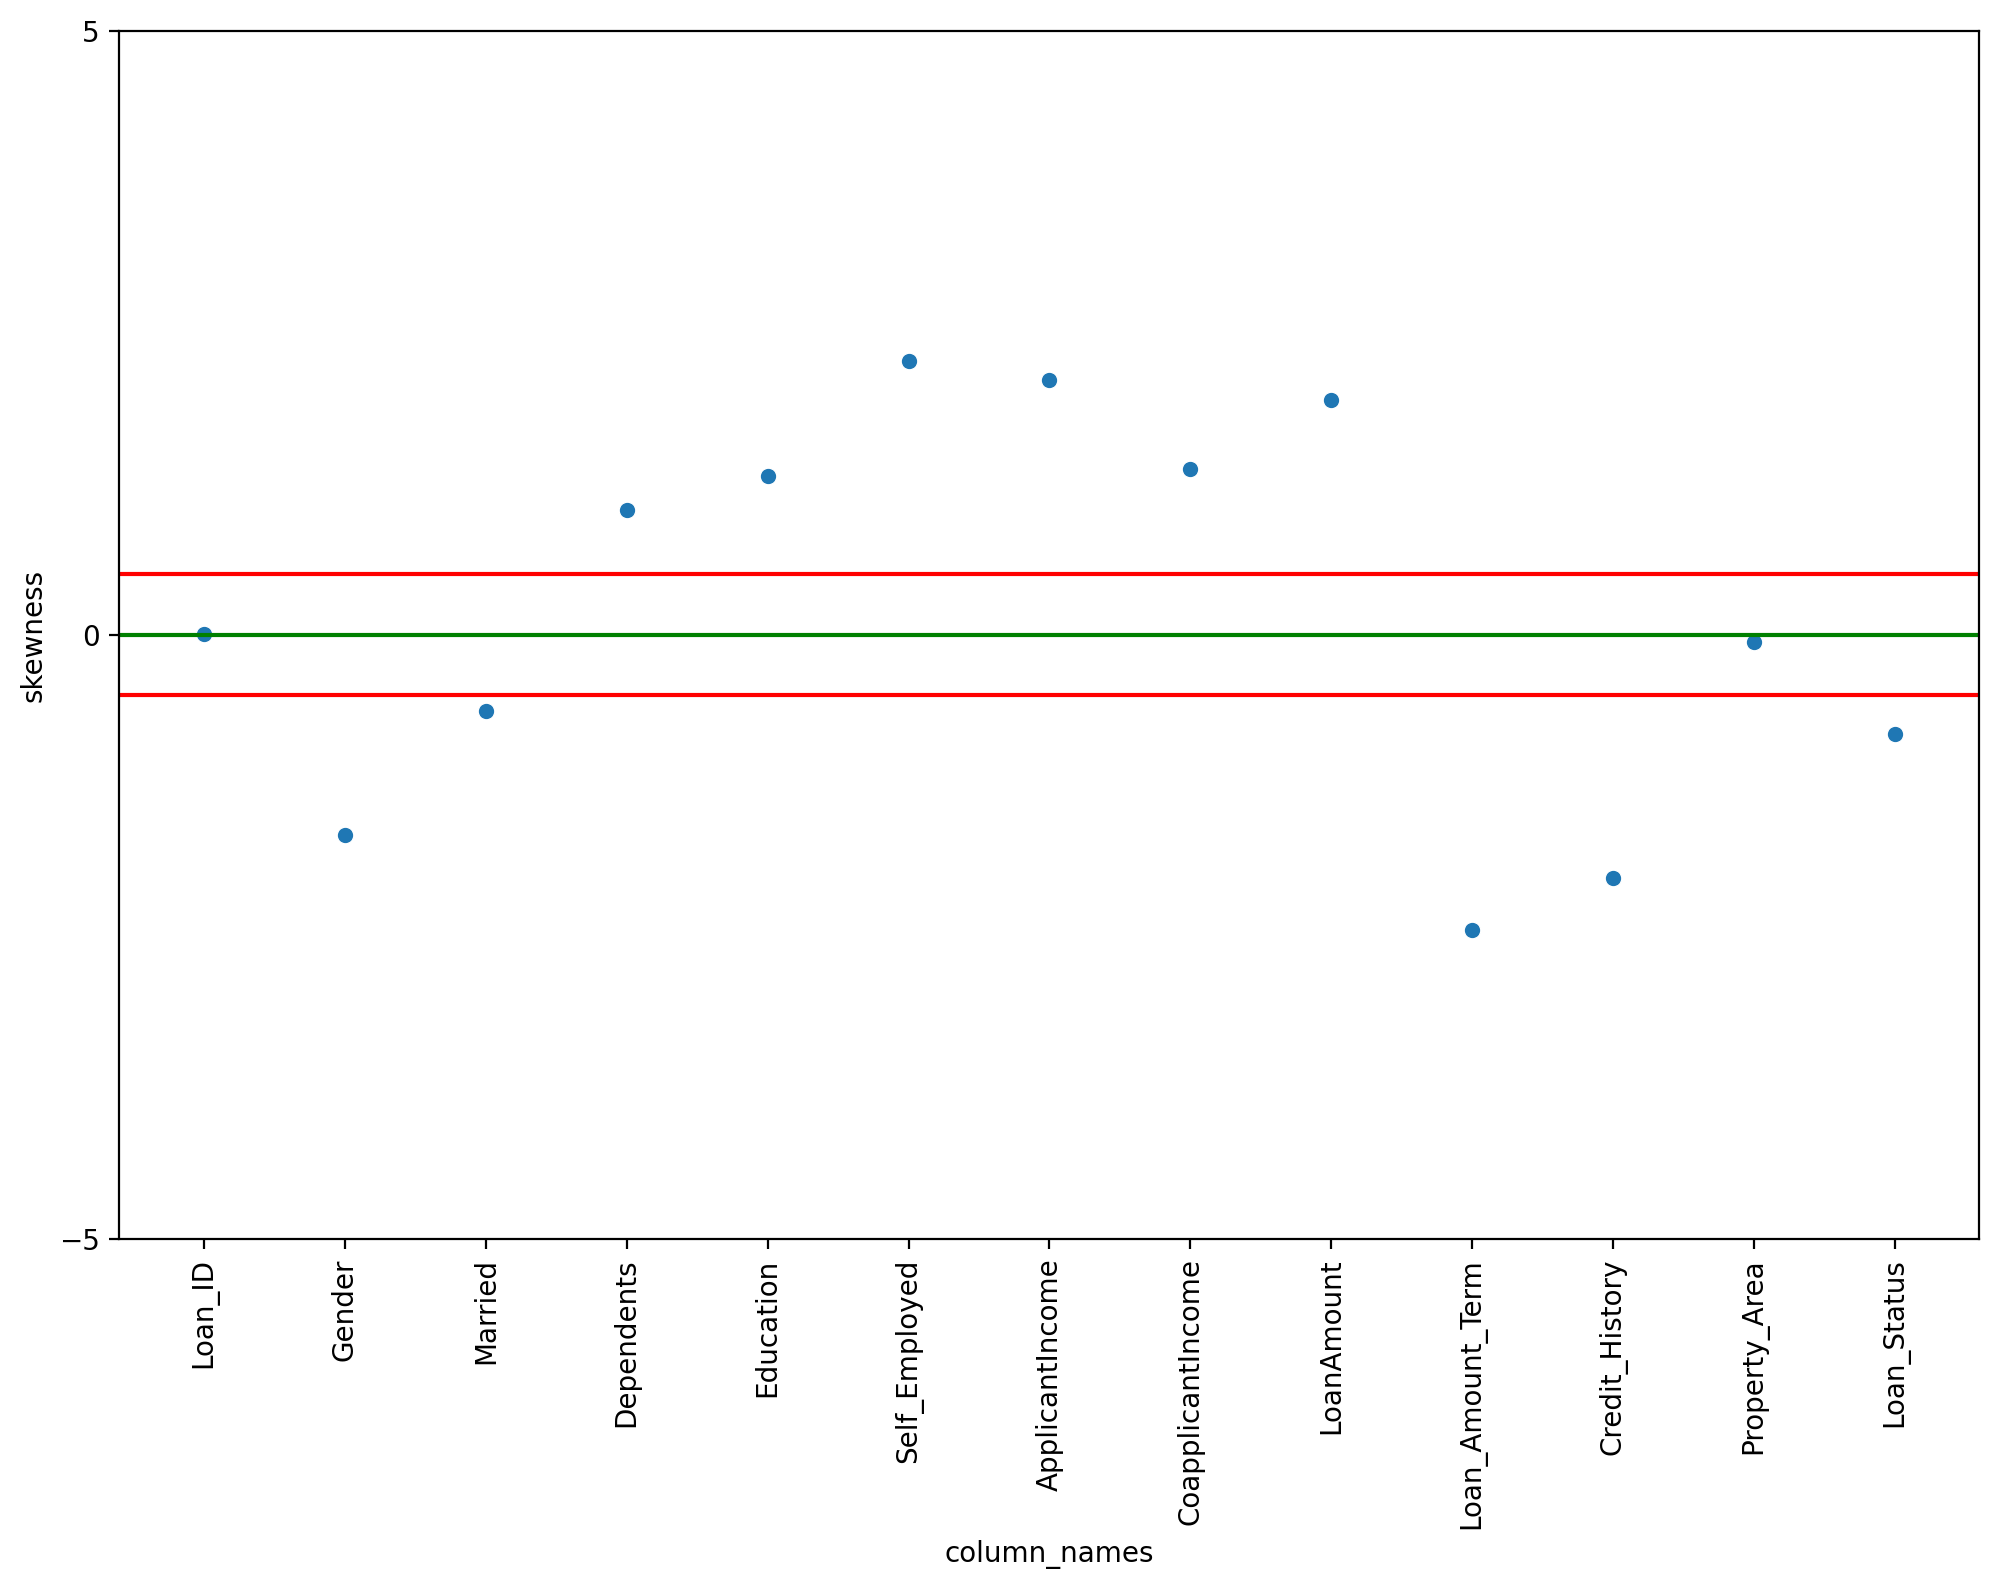

In [124]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=skew_new,x='column_names',y='skewness')
plt.xticks(rotation=90)
plt.yticks(np.arange(-5, 10, step=5))
plt.axhline(y = 0, color = 'g', linestyle = '-')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-');

SKEWNESS CHECK AND OBSERVATIONS:- PLOTTED SKEWNESS FOR ALL DATA DISTRIBUTIONS AGAINST COLUMNS OF THE DATA. PLOTTED GREEN HORIZONTAL LINE FOR A SKEWNESS OF ZERO(NORMAL DISTRIBUTION HAS ASKEWNESS OF 0). PLOTTED RED LINES AROUND THE GREEN LINE DENOTING A RANGE OF(-0.5,0.5). IF DATA POINTS FALL WITHIN THE ABOVE MENTIONED RANGE,THEN THEY ARE APPROXIMATELY NORMALLY DISTRIBUTED .

The rule for skewness seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and -0.5 (negatively skewed) or between 0.5 and 1 (positively skewed), the data are moderately skewed.

Skewness of the normal distribution is zero. All the dataset columns seem to have a skewness of more than 0.5 (except for the label) and even more than 1,so they all are highly skewed.They all have a right-skewed data or a positively-skewed data curve since the right tail is longer and mass of the distribution is concentrated on the left of the figure.

Applicant-Income,co-applicant income and loan amount  are highly skewed.

I am not considering skewness for the categorical columns which are encoded and also not credit history,loan_status and loan amount term.

loan amount term and credit history are categorical columns in the terms that credit history has 2 unique values whereas loan amount term has 10 unique values and they are all discrete values.

In [125]:
for i in df_new.columns:
    if df_new[i].skew()>0.5:
        df_new[i]=np.cbrt(df_new[i])
    elif df_new[i].skew()<0.5:
        df_new[i]=np.cbrt(df_new[i])
    else:
        pass
    

df_new.skew()

Loan_ID             -0.879574
Gender              -1.655480
Married             -0.631755
Dependents           0.477399
Education            1.314930
Self_Employed        2.264787
ApplicantIncome      0.796641
CoapplicantIncome   -0.021430
LoanAmount           0.351690
Loan_Amount_Term    -3.624772
Credit_History      -2.010069
Property_Area       -0.757315
Loan_Status         -0.820209
dtype: float64

removing excess skewness.

In [126]:
df_new['ApplicantIncome']=np.cbrt(df_new['ApplicantIncome'])

In [127]:
df_new.skew()

Loan_ID             -0.879574
Gender              -1.655480
Married             -0.631755
Dependents           0.477399
Education            1.314930
Self_Employed        2.264787
ApplicantIncome      0.176639
CoapplicantIncome   -0.021430
LoanAmount           0.351690
Loan_Amount_Term    -3.624772
Credit_History      -2.010069
Property_Area       -0.757315
Loan_Status         -0.820209
dtype: float64

In [128]:
df_new.skew()
skewness_after_adjustment = df_new.skew()
skewness_after_adjustment=skewness_after_adjustment.reset_index()
skewness_after_adjustment.rename(columns={'index':'column_names',0:'skewness'},inplace= True)
skewness_after_adjustment

,column_names,skewness
0,Loan_ID,-0.879574
1,Gender,-1.655480
2,Married,-0.631755
3,Dependents,0.477399
4,Education,1.314930
5,Self_Employed,2.264787
6,ApplicantIncome,0.176639
7,CoapplicantIncome,-0.021430
8,LoanAmount,0.351690
9,Loan_Amount_Term,-3.624772


creating a new dataframe showing skewness of the data after reducing excess skewness.

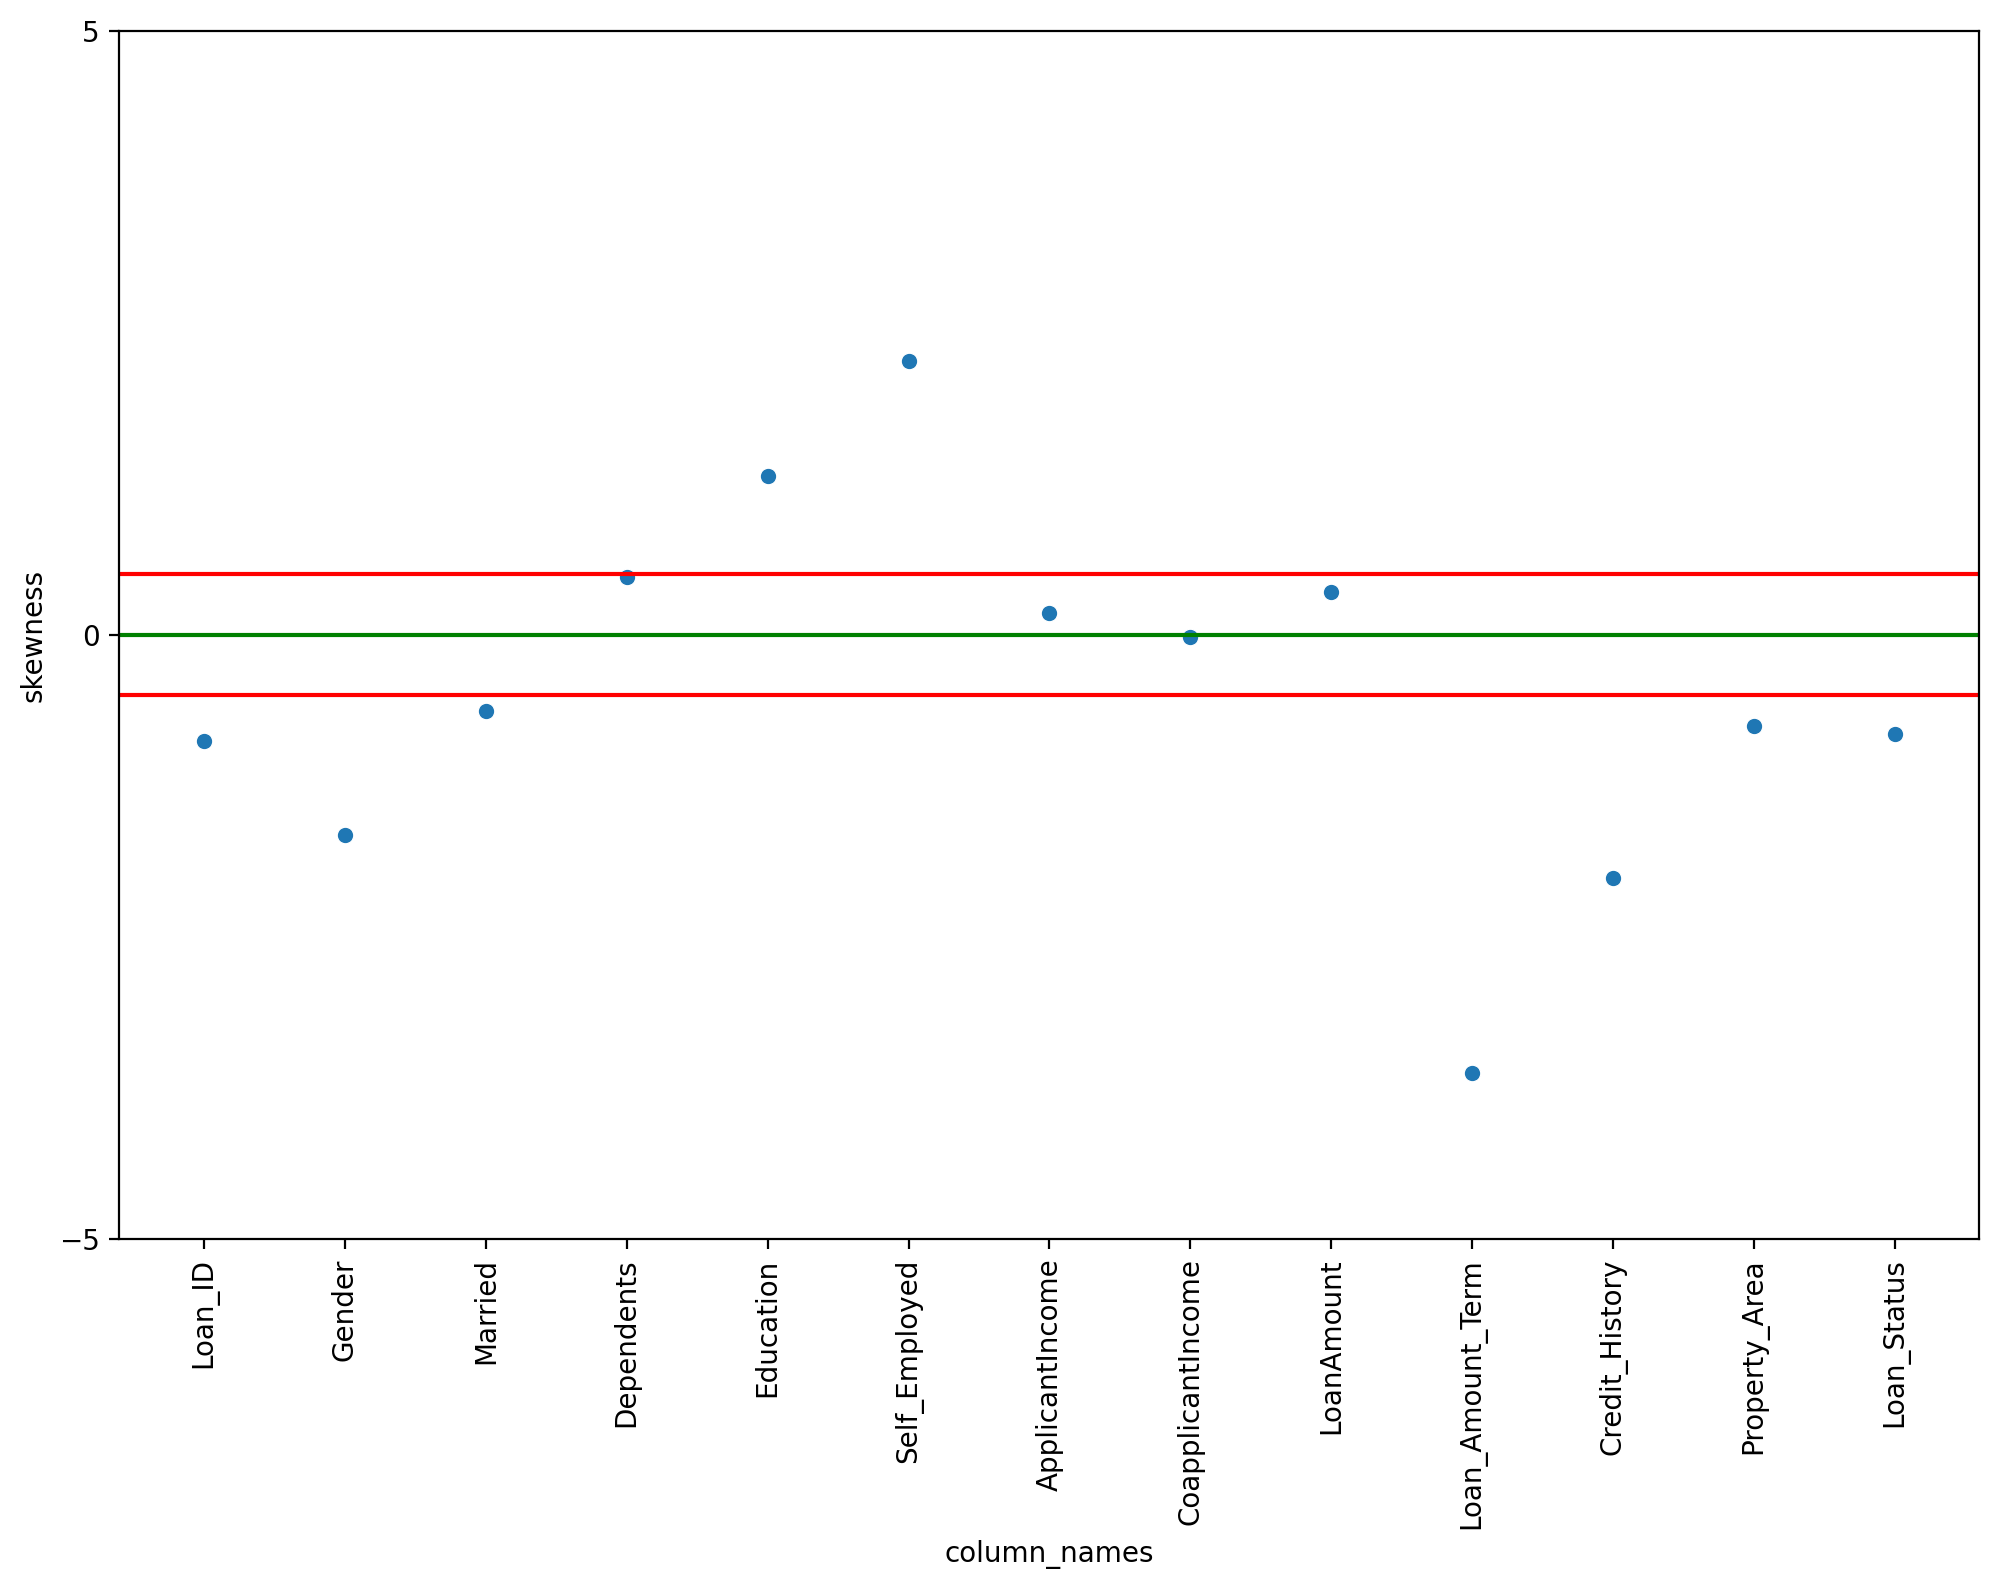

In [129]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(data=skewness_after_adjustment,x='column_names',y='skewness')
plt.xticks(rotation=90)
plt.yticks(np.arange(-5, 10, step=5))
plt.axhline(y = 0, color = 'g', linestyle = '-')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-');

REMOVAL OF SKEWNESS IS NECESSARY FOR MACHINE LEARNING MODEL TO PERFORM WELL.



In [130]:
df_new.shape

(589, 13)

viewing the shape of the data frame after removing skewness.

THIS IS A CLASSIFICATION TASK AND I HAVE TO PREDICT THE 'Loan_Status'.

1.0    406
0.0    183
Name: Loan_Status, dtype: int64


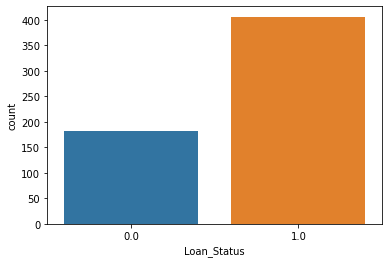

In [131]:
sns.countplot(df_new['Loan_Status'],data=df)

print(df_new['Loan_Status'].value_counts())

the dataset is highly imbalanced with the target lable 'LOAN STATUS' distributed more towards 'Yes'(406) and lesser towards 'NO'(183).

In [132]:
#seperating the target lable and features:-
X=df_new.drop(['Loan_Status','Loan_ID'],axis=1) 
y=df_new['Loan_Status']

SEPERATED THE TRAINING DATA INTO X(features) AND y(target label).

I did not consider loan_id column beacuse it is a unique for every loan applicant and it is a serial number for every loan applicant.

## HANDLING IMBALANCED DATASET USING OVERSAMPLING TECHNIQUE--

In [133]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_over,y_over = sm.fit_resample(X,y)

used the SMOTE method to oversample the minority class.

In [134]:
y_over = pd.Series(y_over)
y_over.value_counts()

0.0    406
1.0    406
Name: Loan_Status, dtype: int64

AFTER CHECKING THE TARGET VARIABLE Y,I FOUND OUT THAT THE DATA IS BALANCED EQUALLY.

In [135]:
X_over = pd.DataFrame(X_over,columns=X.columns)
X_over.info()
X_over

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             812 non-null    float64
 1   Married            812 non-null    float64
 2   Dependents         812 non-null    float64
 3   Education          812 non-null    float64
 4   Self_Employed      812 non-null    float64
 5   ApplicantIncome    812 non-null    float64
 6   CoapplicantIncome  812 non-null    float64
 7   LoanAmount         812 non-null    float64
 8   Loan_Amount_Term   812 non-null    float64
 9   Credit_History     812 non-null    float64
 10  Property_Area      812 non-null    float64
dtypes: float64(11)
memory usage: 69.9 KB


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.000000,0.0,0.000000,0.0,2.621589,0.000000,4.932424,7.113787,1.0,1.259921
1,1.0,1.000000,1.0,0.000000,0.0,2.551493,11.467457,5.039684,7.113787,1.0,0.000000
2,1.0,1.000000,0.0,0.000000,1.0,2.434147,0.000000,4.041240,7.113787,1.0,1.259921
3,1.0,1.000000,0.0,1.000000,0.0,2.394004,13.310098,4.932424,7.113787,1.0,1.259921
4,1.0,0.000000,0.0,0.000000,0.0,2.629024,0.000000,5.204828,7.113787,1.0,1.259921
...,...,...,...,...,...,...,...,...,...,...,...
807,1.0,0.000000,0.0,0.000000,0.0,2.601756,0.000000,4.809722,7.113787,1.0,1.259921
808,1.0,1.000000,0.0,1.000000,0.0,2.289961,15.681670,5.832700,7.113787,0.0,0.951885
809,0.0,0.592091,0.0,0.000000,0.0,2.518122,0.000000,4.946591,7.113787,1.0,0.000000
810,0.0,0.000000,0.0,0.211527,0.0,2.462347,0.000000,4.251275,7.113787,0.0,1.259921


CREATED A X_over DATAFRAME FOR THE FEATURES AFTER OVERSAMPLING.

## MACHINE LEARNING PROCESS--

In [136]:
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import KFold

I imported the necessary models and metrics for classification task from sklearn library.

## choosing the best random state:-

In [203]:
max_accuracy = 0
max_random_state = 0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=i)
    model=DecisionTreeClassifier()
    model.fit(X_train,y_train)
    pred= model.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        max_random_state=i
        
print('best accuracy is: ',max_accuracy,' on random_state ',max_random_state) 

best accuracy is:  0.8565573770491803  on random_state  24


I chose the best random state 24 to split the data into training data and test data.

In [137]:
#Assigning the variables to each models-
lgbc = LGBMClassifier(random_state=24)
rf = RandomForestClassifier(random_state=24)
ad = AdaBoostClassifier(random_state=24)
gb=GradientBoostingClassifier(random_state=24)
nbg=GaussianNB()
lg=LogisticRegression()
svc=SVC(probability=True)
knc=KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=24)

l50=[lgbc,rf,ad,gb,nbg,lg,svc,knc,dtc]

#seperating the training data and test data:-
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=24)

DONE THE TRAIN TEST SPLIT AND ASSIGNED EACH MODEL TO EACH VARIABLE.

## SCALING AND STANDARDIZATION:-

In [138]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
sX_train = st.fit_transform(X_train)
sX_test = st.transform(X_test)

Only training data has been both fit and transformed but the test data has only been transformed. '.fit' means calculating necessary statistics from the data and '.transform' only scales the data. test data should not be fit because that would lead to assumption of the prior knowledge of the test data and test data is the data, machine learning model need to predict fairly without having any knowledge of the test data.

In [139]:
from sklearn.metrics import SCORERS
s=SCORERS
s.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

THIS IS THE NUMBER OF METRICS I IMPORTED FROM SKLEARN.

model_name : LGBMClassifier(random_state=24)
[[ 95  25]
 [ 17 107]]
accuracy:  0.8278688524590164
precision:  0.8106060606060606
recall:  0.8629032258064516
AUC_score 0.827284946236559
cross val score for accuracy:  0.7775894538606403
cross val score for precision:  0.800762055775416
cross val score for recall:  0.9039144835892803
difference between model scores and model_cross validation scores below:--   LGBMClassifier(random_state=24)
difference in accuracy:  0.05027939859837616
difference in precision:  0.009844004830644515
difference in recall:  -0.04101125778282866




model_name : RandomForestClassifier(random_state=24)
[[ 97  23]
 [ 15 109]]
accuracy:  0.8442622950819673
precision:  0.8257575757575758
recall:  0.8790322580645161
AUC_score 0.8436827956989247
cross val score for accuracy:  0.791163262349703
cross val score for precision:  0.7954560235875954
cross val score for recall:  0.9408310749774165
difference between model scores and model_cross validation scores below:--  

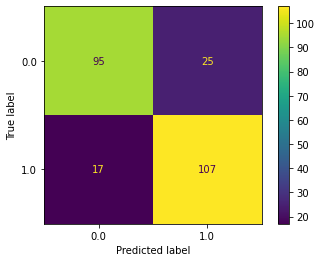

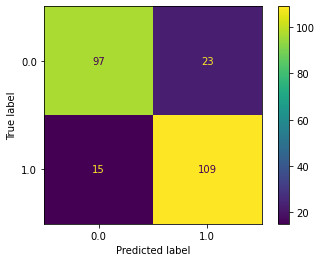

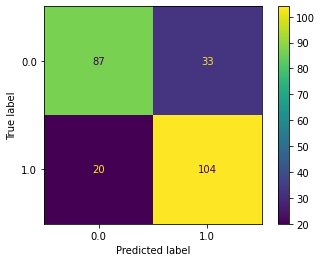

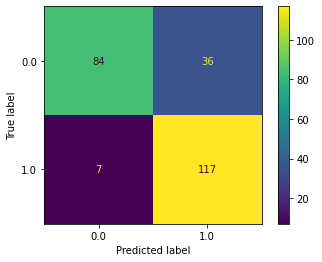

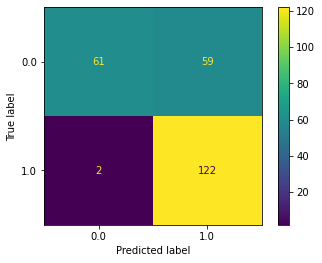

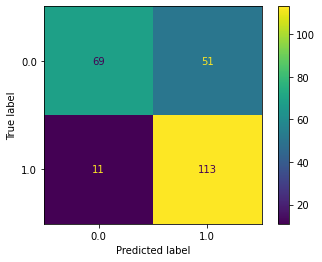

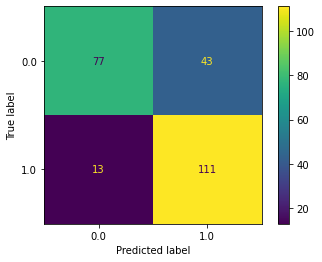

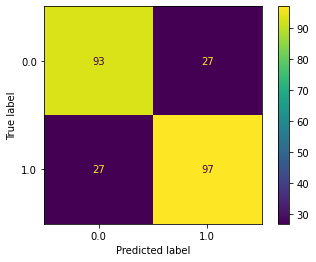

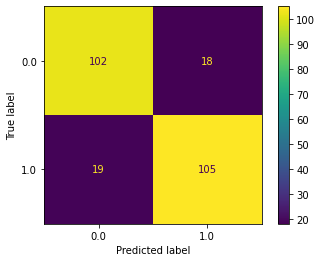

In [211]:
for m in l50:
    m.fit(sX_train,y_train)
    preds = m.predict(sX_test)
    accu= accuracy_score(y_test,preds)
    precision=precision_score(y_test,preds)
    recall=recall_score(y_test,preds)
    print('model_name :',m)
    print(confusion_matrix(y_test,preds))
    print('accuracy: ',accu)
    print('precision: ',precision)
    print('recall: ',recall)
    plot_confusion_matrix(m,sX_test,y_test)
    auc_score =roc_auc_score(y_test,preds)
    print('AUC_score',auc_score)
    print('cross val score for accuracy: ',cross_val_score(m,X,y,cv=5,scoring='accuracy').mean())
    print('cross val score for precision: ',cross_val_score(m,X,y,cv=5,scoring='precision').mean())
    print('cross val score for recall: ',cross_val_score(m,X,y,cv=5,scoring='recall').mean())
    print('difference between model scores and model_cross validation scores below:--  ',m)
    print('difference in accuracy: ',(accu-cross_val_score(m,X,y,cv=5,scoring='accuracy').mean()))
    print('difference in precision: ',(precision-cross_val_score(m,X,y,cv=5,scoring='precision').mean()))
    print('difference in recall: ',(recall-cross_val_score(m,X,y,cv=5,scoring='recall').mean()))
    print('\n')
    print('\n')

## AUC-ROC CURVE AND SCORE--

0.827284946236559


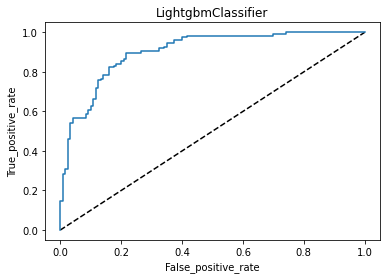

In [212]:
lgbc.fit(sX_train,y_train)
y_pred_prob = lgbc.predict_proba(sX_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LightgbmClassifier')
plt.xlabel('False_positive_rate')
plt.ylabel('True_positive_rate')
plt.title('LightgbmClassifier');
auc_score = roc_auc_score(y_test,lgbc.predict(sX_test))
print(auc_score)

0.7818548387096775


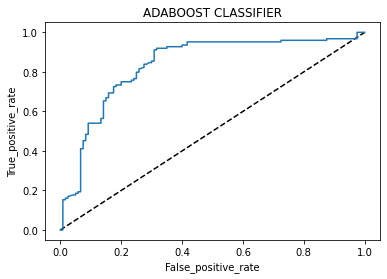

In [213]:
ad.fit(sX_train,y_train)
y_pred_prob = ad.predict_proba(sX_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ADABOOST CLASSIFIER')
plt.xlabel('False_positive_rate')
plt.ylabel('True_positive_rate')
plt.title('ADABOOST CLASSIFIER');
auc_score = roc_auc_score(y_test,ad.predict(sX_test))
print(auc_score)

0.8217741935483871


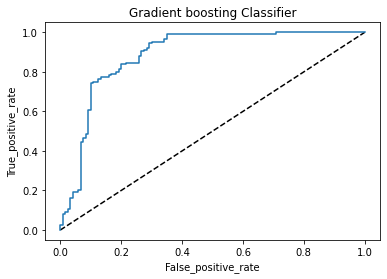

In [214]:
gb.fit(sX_train,y_train)
y_pred_prob = gb.predict_proba(sX_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient boosting Classifier')
plt.xlabel('False_positive_rate')
plt.ylabel('True_positive_rate')
plt.title('Gradient boosting Classifier');
auc_score = roc_auc_score(y_test,gb.predict(sX_test))
print(auc_score)

0.8436827956989247


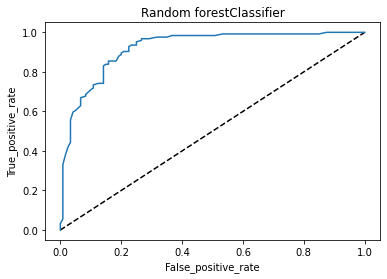

In [215]:
rf.fit(sX_train,y_train)
y_pred_prob = rf.predict_proba(sX_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random forest Classifier')
plt.xlabel('False_positive_rate')
plt.ylabel('True_positive_rate')
plt.title('Random forestClassifier');
auc_score = roc_auc_score(y_test,rf.predict(sX_test))
print(auc_score)

0.7431451612903225


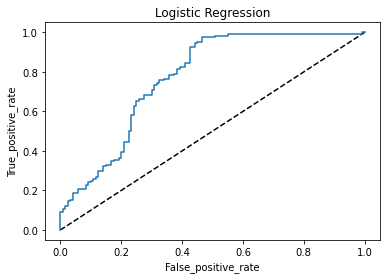

In [216]:
lg.fit(sX_train,y_train)
y_pred_prob = lg.predict_proba(sX_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False_positive_rate')
plt.ylabel('True_positive_rate')
plt.title('Logistic Regression');
auc_score = roc_auc_score(y_test,lg.predict(sX_test))
print(auc_score)

0.7461021505376343


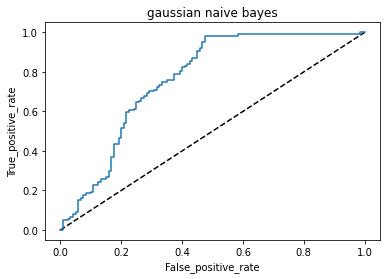

In [217]:
nbg.fit(sX_train,y_train)
y_pred_prob = nbg.predict_proba(sX_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian naive bayes')
plt.xlabel('False_positive_rate')
plt.ylabel('True_positive_rate')
plt.title('gaussian naive bayes');
auc_score = roc_auc_score(y_test,nbg.predict(sX_test))
print(auc_score)

0.7684139784946236


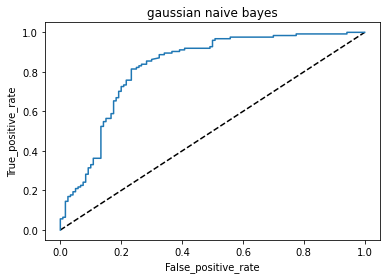

In [218]:
svc.fit(sX_train,y_train)
y_pred_prob = svc.predict_proba(sX_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian naive bayes')
plt.xlabel('False_positive_rate')
plt.ylabel('True_positive_rate')
plt.title('gaussian naive bayes');
auc_score = roc_auc_score(y_test,svc.predict(sX_test))
print(auc_score)

0.7786290322580646


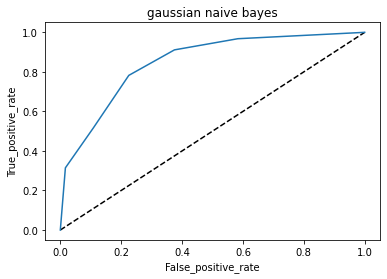

In [219]:
knc.fit(sX_train,y_train)
y_pred_prob = knc.predict_proba(sX_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian naive bayes')
plt.xlabel('False_positive_rate')
plt.ylabel('True_positive_rate')
plt.title('gaussian naive bayes');
auc_score = roc_auc_score(y_test,knc.predict(sX_test))
print(auc_score)

0.8483870967741934


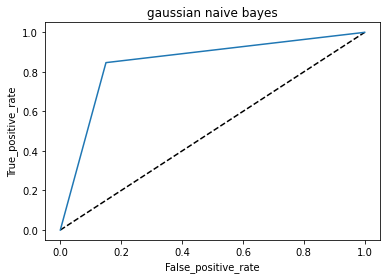

In [220]:
dtc.fit(sX_train,y_train)
y_pred_prob = dtc.predict_proba(sX_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian naive bayes')
plt.xlabel('False_positive_rate')
plt.ylabel('True_positive_rate')
plt.title('gaussian naive bayes');
auc_score = roc_auc_score(y_test,dtc.predict(sX_test))
print(auc_score)

RANDOM FOREST CLASSIFIER ,GRADIENT BOOSTING CLASSIFIER,LIGHT GBM CLASSIFIER AND DECISION TREE CLASSIFIER PERFORMED THE BEST AMONG ALL THE MODELS BASED ON THE METRICS AND SCORES.

THEY WILL BE CHOSEN FOR HYPERPARAMETER TUNING WITH GRID SEARCH CV TO FIND THE BEST PARAMETERS FOR BEST CLASSIFICATION. 

## GRID SEARCH CV--

In [140]:
from sklearn.model_selection import GridSearchCV

imported grid search cv for hyperparameter tuning.

In [222]:
rfp = {'n_estimators':[100,50,500,200,400,300,700],'max_features':['auto','log2','sqrt'],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3],'max_depth':[8,10,12,None]}
dtp = {'criterion':['gini','entropy'],'max_features':["auto", "sqrt", "log2"],'min_samples_leaf':[1,2,3],'max_depth':[8,10,12,None]}
gbp = {'n_estimators':[400,300,600,500],'learning_rate':[0.1,0.3,0.5,0.2,0.0001,1.0],'max_features':['auto','log2','sqrt'],'max_depth':[3,4,5]}
lgbmp = {'n_estimators': [400,200,100],
         'reg_alpha': [0,1,0.5,1.1, 1.2],'reg_lambda': [0,0.5,1,1.1, 1.2],
        'learning_rate':[0.1,0.2,1,0.001,0.0002],'n_jobs':[1],'max_depth':[6,7,8,9,10,12,14]}

SETTING PARAMETERS FOR MULTIPLE MODLES FOR GRID SEARCH CV.

In [223]:
g1 = GridSearchCV(estimator=rf,param_grid=rfp)
g2 = GridSearchCV(dtc,param_grid=dtp)
g3 = GridSearchCV(gb,param_grid=gbp)
g4 = GridSearchCV(lgbc,param_grid=lgbmp)


setting grid search models for all the required models as selected above.

In [224]:
print(g1)
g1.fit(sX_train,y_train)
y_pred=g1.predict(sX_test)
print('ACCURACY_SCORE')
print(accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test,y_pred))
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print(g1)
auc_score =roc_auc_score(y_test,y_pred)
print('AUC_score',auc_score)
print(g1.best_params_)
print('\n')
print('\n')

GridSearchCV(estimator=RandomForestClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12, None],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 50, 500, 200, 400, 300, 700]})
ACCURACY_SCORE
0.8524590163934426
classification_report
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       120
         1.0       0.83      0.90      0.86       124

    accuracy                           0.85       244
   macro avg       0.86      0.85      0.85       244
weighted avg       0.85      0.85      0.85       244

confusion_matrix
[[ 97  23]
 [ 13 111]]
precision_score: 0.8283582089552238
recall_score: 0.8951612903225806
GridSearchCV(estimator=RandomForestClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy'],
    

In [225]:
print(g2)
g2.fit(sX_train,y_train)
y_pred=g2.predict(sX_test)
print('ACCURACY_SCORE')
print(accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test,y_pred))
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print(g2)
auc_score =roc_auc_score(y_test,y_pred)
print('AUC_score',auc_score)
print(g2.best_params_)
print('\n')
print('\n')

GridSearchCV(estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3]})
ACCURACY_SCORE
0.8483606557377049
classification_report
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       120
         1.0       0.84      0.87      0.85       124

    accuracy                           0.85       244
   macro avg       0.85      0.85      0.85       244
weighted avg       0.85      0.85      0.85       244

confusion_matrix
[[ 99  21]
 [ 16 108]]
precision_score: 0.8372093023255814
recall_score: 0.8709677419354839
GridSearchCV(estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12, None],
                        

In [226]:
print(g3)
g3.fit(sX_train,y_train)
y_pred=g3.predict(sX_test)
print('ACCURACY_SCORE')
print(accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test,y_pred))
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print(g3)
auc_score =roc_auc_score(y_test,y_pred)
print('AUC_score',auc_score)
print(g3.best_params_)
print('\n')
print('\n')

GridSearchCV(estimator=GradientBoostingClassifier(random_state=24),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.2, 0.0001, 1.0],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'n_estimators': [400, 300, 600, 500]})
ACCURACY_SCORE
0.8319672131147541
classification_report
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82       120
         1.0       0.81      0.87      0.84       124

    accuracy                           0.83       244
   macro avg       0.83      0.83      0.83       244
weighted avg       0.83      0.83      0.83       244

confusion_matrix
[[ 95  25]
 [ 16 108]]
precision_score: 0.8120300751879699
recall_score: 0.8709677419354839
GridSearchCV(estimator=GradientBoostingClassifier(random_state=24),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.2, 0.0001, 1.0],
                         'max_depth': 

In [227]:
print(g4)
g4.fit(sX_train,y_train)
y_pred=g4.predict(sX_test)
print('ACCURACY_SCORE')
print(accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test,y_pred))
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print(g4)
auc_score =roc_auc_score(y_test,y_pred)
print('AUC_score',auc_score)
print(g4.best_params_)
print('\n')
print('\n')

GridSearchCV(estimator=LGBMClassifier(random_state=24),
             param_grid={'learning_rate': [0.1, 0.2, 1, 0.001, 0.0002],
                         'max_depth': [6, 7, 8, 9, 10, 12, 14],
                         'n_estimators': [400, 200, 100], 'n_jobs': [1],
                         'reg_alpha': [0, 1, 0.5, 1.1, 1.2],
                         'reg_lambda': [0, 0.5, 1, 1.1, 1.2]})
ACCURACY_SCORE
0.8237704918032787
classification_report
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82       120
         1.0       0.81      0.85      0.83       124

    accuracy                           0.82       244
   macro avg       0.82      0.82      0.82       244
weighted avg       0.82      0.82      0.82       244

confusion_matrix
[[ 95  25]
 [ 18 106]]
precision_score: 0.8091603053435115
recall_score: 0.8548387096774194
GridSearchCV(estimator=LGBMClassifier(random_state=24),
             param_grid={'learning_rate': [0.1, 0.2, 1, 0.001, 

AFTER PERFORMING GRID SEARCH CV,I FOUND THE BEST PARAMETERS FROM ALL THE ABOVE 4 MODELS BUT RANDOM FOREST CLASSIFIER WAS THE BEST OF ALL BASED ON THE METRICS.

In [141]:
random_forest_classifier = RandomForestClassifier(criterion='entropy',max_depth=None, max_features='auto', min_samples_leaf=1, n_estimators=200)

I created the random forest classifier model for the best parameters found from Grid search cv.

RandomForestClassifier(criterion='entropy', n_estimators=200)
ACCURACY_SCORE
0.8401639344262295
classification_report
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83       120
         1.0       0.81      0.90      0.85       124

    accuracy                           0.84       244
   macro avg       0.84      0.84      0.84       244
weighted avg       0.84      0.84      0.84       244

confusion_matrix
[[ 94  26]
 [ 13 111]]
precision_score: 0.8102189781021898
recall_score: 0.8951612903225806
RandomForestClassifier(criterion='entropy', n_estimators=200)
AUC_score 0.8392473118279569


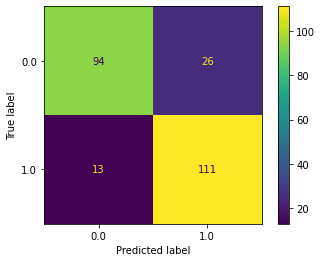

In [142]:
print(random_forest_classifier)
random_forest_classifier.fit(sX_train,y_train)
y_pred=random_forest_classifier.predict(sX_test)
print('ACCURACY_SCORE')
print(accuracy_score(y_test,y_pred))
print('classification_report')
print(classification_report(y_test,y_pred))
print('confusion_matrix')
print(confusion_matrix(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print(random_forest_classifier)
plot_confusion_matrix(random_forest_classifier,sX_test,y_test)
auc_score =roc_auc_score(y_test,y_pred)
print('AUC_score',auc_score)


checked the model performance with the best parameters found from grid search cv for random forest classifier.

## SAVING THE MODEL:-

In [143]:
import joblib
joblib.dump(random_forest_classifier,'random_forest_classifier_model.obj')

['random_forest_classifier_model.obj']

I IMPORTED JOBLIB LIBRARY TO SAVE THE MODEL AND DUMP IT.

In [144]:
loaded_model = joblib.load('random_forest_classifier_model.obj')
loaded_model

RandomForestClassifier(criterion='entropy', n_estimators=200)

I LOADED THE MODEL TO CHECK THE PARAMETERS.

